In [1]:
!pip install h2o


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install graphviz


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install shap


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install tpot


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install chardet


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML
import numpy as np
import pandas as pd
import seaborn as sns
import chardet
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor
pd.options.display.max_columns = None
import requests
import io
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.20+9-LTS-256, mixed mode)
  Starting server from C:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\jaswa\AppData\Local\Temp\tmpw5xdik3y
  JVM stdout: C:\Users\jaswa\AppData\Local\Temp\tmpw5xdik3y\h2o_jaswa_started_from_python.out
  JVM stderr: C:\Users\jaswa\AppData\Local\Temp\tmpw5xdik3y\h2o_jaswa_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    3 days
H2O_cluster_name:           H2O_from_python_jaswa_zygwnv
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.842 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.2 final
--------------------------  -----------------------------

In [7]:
data = h2o.import_file('https://raw.githubusercontent.com/ADUSUMILLIJ/Data-Sci-Engineering-Methods/main/Movieratings.csv')
col_types = data.types
numerical_cols = [col for col, type in col_types.items() if type in ['int', 'real']]
data_numerical = data[numerical_cols]
print(data_numerical)
data_onlynumbers=h2o.as_list(data_numerical)
datainpandas=h2o.as_list(data)
# print(datainpandas)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
  title_year    budget        Gross    IMDb_rating    MetaCritic    Runtime
        2016  3e+07     1.51102e+08            8.2            93        128
        2016  1.5e+08   3.41268e+08            8.1            78        108
        2016  1.2e+07   5.17389e+07            8.1            69        118
        2016  4.7e+07   1.00546e+08            8              81        116
        2016  9e+06     4.76954e+07            7.9            96        137
        2016  1.2e+07   2.70078e+07            7.7            88        102
        2016  1.65e+08  2.32642e+08            7.6            72        115
        2010  2.6e+08   2.00807e+08            7.8            71        124
        2012  2.5e+08   4.48131e+08            8.4            78        164
        2016  2.5e+08   4.07197e+08            7.9            75        147
[100 rows x 6 columns]



c:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pan

In [8]:
col_types = data.types
categoric_cols = [col for col, type in col_types.items() if type not in ['int', 'real']]
data_categoric = data[categoric_cols]
print(data_categoric)
cdatainpandas =h2o.as_list(data_categoric)
ndatainpandas=h2o.as_list(data_numerical)

Title                       actor_1_name          actor_2_name        actor_3_name          genre_1    genre_2    genre_3    content_rating    Country
La La Land                  Ryan Gosling          Emma Stone          Amie Conn             Comedy     Drama      Music      PG-13             USA
Zootopia                    Ginnifer Goodwin      Jason Bateman       Idris Elba            Animation  Adventure  Comedy     PG                USA
Lion                        Dev Patel             Nicole Kidman       Rooney Mara           Biography  Drama      Suspense   PG-13             Australia
Arrival                     Amy Adams             Jeremy Renner       Forest Whitaker       Drama      Mystery    Sci-Fi     PG-13             USA
Manchester by the Sea       Casey Affleck         Michelle Williams   Kyle Chandler         Drama      Drama      Suspense   R                 USA
Hell or High Water          Chris Pine            Jeff Bridges        Ben Foster            Crime      Drama

c:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pan

In [9]:
data.head()

Title                         title_year    budget        Gross  actor_1_name          actor_2_name        actor_3_name            IMDb_rating  genre_1    genre_2    genre_3      MetaCritic    Runtime  content_rating    Country
--------------------------  ------------  --------  -----------  --------------------  ------------------  --------------------  -------------  ---------  ---------  ---------  ------------  ---------  ----------------  ---------
La La Land                          2016  3e+07     1.51102e+08  Ryan Gosling          Emma Stone          Amie Conn                       8.2  Comedy     Drama      Music                93        128  PG-13             USA
Zootopia                            2016  1.5e+08   3.41268e+08  Ginnifer Goodwin      Jason Bateman       Idris Elba                      8.1  Animation  Adventure  Comedy               78        108  PG                USA
Lion                                2016  1.2e+07   5.17389e+07  Dev Patel             Nicole Kidman       Rooney Mara                     8.1  Biography  Drama      Suspense             69        118  PG-13             Australia
Arrival                             2016  4.7e+07   1.00546e+08  Amy Adams             Jeremy Renner       Forest Whitaker                 8    Drama      Mystery    Sci-Fi               81        116  PG-13             USA
Manchester by the Sea               2016  9e+06     4.76954e+07  Casey Affleck         Michelle Williams   Kyle Chandler                   7.9  Drama      Drama      Suspense             96        137  R                 USA
Hell or High Water                  2016  1.2e+07   2.70078e+07  Chris Pine            Jeff Bridges        Ben Foster                      7.7  Crime      Drama      Thriller             88        102  R                 USA
Doctor Strange                      2016  1.65e+08  2.32642e+08  Benedict Cumberbatch  Chiwetel Ejiofor    Rachel McAdams                  7.6  Action     Adventure  Fantasy              72        115  PG-13             USA
Tangled                             2010  2.6e+08   2.00807e+08  Brad Garrett          Donna Murphy        M.C. Gainey                     7.8  Animation  Adventure  Comedy               71        124  PG                USA
The Dark Knight Rises               2012  2.5e+08   4.48131e+08  Tom Hardy             Christian Bale      Joseph Gordon-Levitt            8.4  Action     Thriller   Suspense             78        164  PG-13             USA
Captain America: Civil War          2016  2.5e+08   4.07197e+08  Robert Downey Jr.     Scarlett Johansson  Chris Evans                     7.9  Action     Adventure  Sci-Fi               75        147  PG-13             USA
[10 rows x 15 columns]

# Logistic Regression ( Linear model )

In [12]:
numerical_features=['title_year', 'budget', 'Gross', 'IMDb_rating', 'MetaCritic', 'Runtime']

In [9]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator
from sklearn.model_selection import train_test_split
import pandas as pd


# Split data into features and target
X = datainpandas.drop('Gross', axis=1)
y = datainpandas['Gross'] #y is target

# Convert Pandas Series to Pandas DataFrame
y = pd.DataFrame(y)

# Convert Pandas DataFrames back to H2OFrame objects
X_h2o = h2o.H2OFrame(X)
y_h2o = h2o.H2OFrame(y)

# Concatenate X and y to create the complete dataset
data_h2o = X_h2o.concat(y_h2o)

# Split the data into training and test sets using H2O split_frame function
train, test = data_h2o.split_frame(ratios=[0.8], seed=42)

# Train the logistic regression model
logistic_model = H2OGeneralizedLinearEstimator(family="gaussian")
logistic_model.train(x=list(X.columns), y="Gross", training_frame=train)

# Print a summary of the model
print(logistic_model)

# Make predictions on the test set
predictions = logistic_model.predict(test)

# Evaluate the model
performance = logistic_model.model_performance(test)
print(performance)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |

c:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [Title, actor_3_name]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1710692637050_1


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 2.2977E7 )  227                           12                             2                       py_5_sid_a864

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 2.2322605751902984e+16
RMSE: 149407515.71424708
MAE: 105597755.5182952
RMSLE: 1.4462763118144495
Mean Residual Deviance: 2.2322605751902984e+16
R^2: 1.3160361289621392e-07
Null degrees of freedom: 81
Residual de

To obtain Regression Cofficients

In [10]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator
import pandas as pd

# Initialize and start the H2O cluster
h2o.init()

# Assuming you have loaded your data into a DataFrame called datainpandas
# Split data into features and target
X = datainpandas.drop('Gross', axis=1)
y = datainpandas['Gross']

# Convert Pandas Series to Pandas DataFrame
y = pd.DataFrame(y)

# Convert Pandas DataFrames back to H2OFrame objects
X_h2o = h2o.H2OFrame(X)
y_h2o = h2o.H2OFrame(y)

# Concatenate X and y to create the complete dataset
data_h2o = X_h2o.concat(y_h2o)

# Split the data into training and test sets using H2O split_frame function
train, test = data_h2o.split_frame(ratios=[0.8], seed=42)

# Train the linear regression model
linear_model = H2OGeneralizedLinearEstimator(family="gaussian")
linear_model.train(x=X.columns.tolist(), y="Gross", training_frame=train)

# Print a summary of the model
print(linear_model)

# Retrieve the regression coefficients
coefficients = linear_model.coef()

# Provide an explanation of the coefficients
print("\nExplanation of Regression Coefficients:")
print("Intercept: ", coefficients['Intercept'])  # Intercept
for name, coef in coefficients.items():
    if name != 'Intercept':
        print(f"{name}: {coef}")


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         47 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    3 days
H2O_cluster_name:           H2O_from_python_jaswa_zygwnv
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.842 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.2 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


c:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [Title, actor_3_name]
  warnings.warn(mesg["message"], RuntimeWarning)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1710692637050_2


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 2.2977E7 )  227                           12                             2                       py_9_sid_b06c

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 2.2322605751902984e+16
RMSE: 149407515.71424708
MAE: 105597755.5182952
RMSLE: 1.4462763118144495
Mean Residual Deviance: 2.2322605751902984e+16
R^2: 1.3160361289621392e-07
Null degrees

The provided regression coefficients represent the weights assigned to each predictor variable in linear regression model. These coefficients indicate the impact of each predictor on the target variable (Gross), holding other predictors constant.

Here's an explanation of the coefficients and their importance:

Intercept: This represents the baseline prediction when all other predictors are zero.

Actor Names: The coefficients for actor names are all zero, indicating that these features do not have any predictive power in determining the gross revenue of a movie according to this model.

Genre: The coefficients for genre variables indicate the impact of each genre on the gross revenue. For example, a positive coefficient for 'genre_2.Adventure' suggests that having Adventure as one of the genres is associated with higher gross revenue, while a negative coefficient for 'genre_2.Drama' suggests the opposite.

Country: The coefficients for country variables are all zero, indicating that the country where the movie was produced does not have a significant impact on the gross revenue according to this model.

Content Rating: The coefficients for content rating variables indicate the impact of each content rating category on the gross revenue. For example, a positive coefficient for 'content_rating.PG-13' suggests that movies with this content rating tend to have higher gross revenue, while a negative coefficient for 'content_rating.R' suggests the opposite.

Title Year, Budget, IMDb Rating, MetaCritic, Runtime: These coefficients represent the impact of these numeric features on the gross revenue. For example, a positive coefficient for 'title_year' suggests that more recent movies tend to have higher gross revenue, while a positive coefficient for 'IMDb_rating' suggests that movies with higher IMDb ratings tend to have higher gross revenue. Similarly, positive coefficients for 'budget' and 'Runtime' suggest that higher budgets and longer runtimes are associated with higher gross revenue, while a negative coefficient for 'MetaCritic' suggests the opposite.

These coefficients provide insights into the factors that influence the gross revenue of movies according to the model. Positive coefficients indicate a positive association with gross revenue, while negative coefficients indicate a negative association. The magnitude of the coefficients indicates the strength of the association.

Regression evaluation metrics to assess the performance of the linear regression model

In [13]:
# Evaluate the model
performance = linear_model.model_performance(test)

# Print Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", performance.mae())

# Print Mean Squared Error (MSE)
print("Mean Squared Error (MSE):", performance.mse())

# Print Root Mean Squared Error (RMSE)
print("Root Mean Squared Error (RMSE):", performance.rmse())

# Print R-squared (R²)
print("R-squared (R²):", performance.r2())


Mean Absolute Error (MAE): 109832050.4916867
Mean Squared Error (MSE): 1.4824591808083108e+16
Root Mean Squared Error (RMSE): 121756280.3640252
R-squared (R²): -0.09860598804416276


## Interpretting the Regression Coefficients

Interpreting the regression coefficients involves understanding how each predictor variable influences the target variable (Gross revenue) in the linear regression model. Here's how to interpret the coefficients based on the provided output:

Intercept: The intercept represents the predicted gross revenue when all predictor variables are zero. In this case, it may not have a practical interpretation since many predictors, such as budget and ratings, cannot be zero for a movie.

Coefficients for Numeric Predictors (Title Year, Budget, IMDb Rating, MetaCritic, Runtime): These coefficients indicate the change in the predicted gross revenue for a one-unit change in the corresponding predictor, holding all other predictors constant. For example, a positive coefficient for "budget" suggests that an increase in the movie's budget is associated with a higher predicted gross revenue, while a negative coefficient for "MetaCritic" suggests that a higher MetaCritic rating is associated with a lower predicted gross revenue.

Coefficients for Categorical Predictors (Genre, Content Rating, Country): Each level of a categorical predictor has its coefficient, representing the change in the predicted gross revenue when that level is compared to the reference level (typically the first level). For example, a positive coefficient for "genre_Adventure" suggests that movies categorized as Adventure tend to have higher predicted gross revenue compared to the reference genre. Similarly, a positive coefficient for "content_rating_PG-13" suggests that movies with a PG-13 rating tend to have higher predicted gross revenue compared to the reference content rating.

Coefficients for Actor Names: The coefficients for actor names are all zero, indicating that these features do not have any predictive power in determining the gross revenue of a movie according to this model.



# Decision Tree (Tree based model)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error

# Split data into features and target
X = datainpandas.drop('Gross', axis=1)
y = datainpandas['Gross']

# Define categorical and numerical features
categorical_features = ['genre_1']
numerical_features = [c for c in X.columns if c not in categorical_features]

# Define preprocessing steps for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Using median instead of mean
    ('scaler', StandardScaler())
])

# Create column transformer to apply different preprocessing steps to different feature types
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define the Random Forest Regressor model
regressor = RandomForestRegressor()

# Create a pipeline combining preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Filter out non-numeric values in numerical features
X_numeric = X[numerical_features].apply(pd.to_numeric, errors='coerce')
X_categorical = X[categorical_features]

# Combine the filtered numerical features and categorical features
X_filtered = pd.concat([X_numeric, X_categorical], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.1, shuffle=False)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
train_mae = mean_absolute_error(y_train, pipeline.predict(X_train))
test_mae = mean_absolute_error(y_test, pipeline.predict(X_test))
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

Train MAE: 26303066.07088889, Test MAE: 81204870.87900001


c:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Title' 'actor_1_name' 'actor_2_name' 'actor_3_name' 'genre_2' 'genre_3'
 'content_rating' 'Country']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Title' 'actor_1_name' 'actor_2_name' 'actor_3_name' 'genre_2' 'genre_3'
 'content_rating' 'Country']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Title' 'actor_1_name' 'actor_2_name' 'actor_3_name' 'genre_2' 'genre_3'
 'content_rating' 'Country']. At least

<BarContainer object of 6 artists>

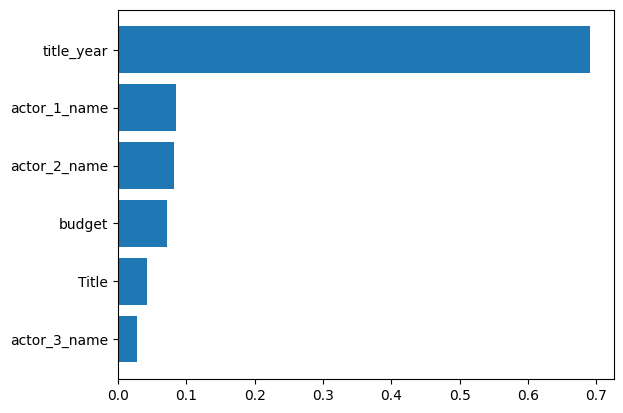

In [15]:
sorted_idx = pipeline.named_steps['regressor'].feature_importances_.argsort()
features = numerical_features + categorical_features
result = sorted(zip(features, pipeline.named_steps['regressor'].feature_importances_), key=lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])


## Interpretting the tree

The Gini value, also referred to as the Gini index or Gini impurity, serves as a crucial metric in decision tree algorithms, particularly in the context of binary classification problems. Its primary function is to quantify the impurity or randomness within a dataset, aiding decision trees in determining the most effective splits during their construction.

The scale of the Gini value spans from 0 to 1, where 0 signifies absolute purity, indicating that all data within a subset belongs to the same class. On the other end, a Gini value of 1 implies perfect impurity, suggesting an even distribution of data across all classes within the subset. In the decision tree framework, the Gini value is computed for each potential split at every node, and the split that results in the lowest Gini value is deemed the optimal choice.

Given a binary classification problem, the decision tree model evaluates the Gini value for different parameter values and makes split decisions at each node based on this assessment. Consequently, the chosen splits aim to maximize the purity of the resulting subsets. It's worth noting that, in practical applications, the Gini value is often employed alongside other impurity measures like entropy. This combination enhances the decision tree's ability to construct more accurate and robust models by considering various aspects of impurity in the data.





# Auto ML

In [16]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         1 min 22 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    3 days
H2O_cluster_name:           H2O_from_python_jaswa_51ia1a
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.841 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.2 final
--------------------------  -----------------------------

In [17]:
df = h2o.H2OFrame(data)


In [18]:
train, test, valid = df.split_frame(ratios=[0.7, 0.20], seed=1)

In [19]:
aml = H2OAutoML(max_models=10, balance_classes=True, seed=1)
aml.train(training_frame = train, y = 'Gross')

AutoML progress: |█
11:32:48.889: AutoML: XGBoost is not available; skipping it.
11:32:48.924: _train param, Dropping bad and constant columns: [Title, actor_3_name]
11:32:49.193: _train param, Dropping bad and constant columns: [Title, actor_3_name]
11:32:49.194: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 75.0.
11:32:49.197: _train param, Dropping bad and constant columns: [Title, actor_3_name]
11:32:49.754: _train param, Dropping bad and constant columns: [Title, actor_3_name]
11:32:49.977: _train param, Dropping bad and constant columns: [Title, actor_3_name]
11:32:50.178: _train param, Dropping bad and constant columns: [Title, actor_3_name]
11:32:50.341: _train param, Dropping bad and constant columns: [Title, actor_3_name]
11:32:50.998: _train param, Dropping bad and constant columns: [Title, actor_3_name]
11:32:51.297: _train param, Dropping bad and constant columns: [Title, actor_3_name]
11

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: XRT_1_AutoML_1_20240317_113248


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    27                 27                          33428                  15           20           19.4815       47            81            67.1852

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 1.4149448039284798e+16
RMSE: 118951452.44714248
MAE: 78311258.42955296
RMSLE: 1.3224152904457933
Mean Residual Deviance: 1.4149448039284798e+16

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 1.4000312813771612e+16
RMSE: 118322917.53405851
MAE: 75834676.44579366
RMSLE: 1.304666483121921
Mean Residual Deviance: 1.4000312813771612e+16

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan          0            nan           nan           nan           nan           nan
loglikelihood           nan          0            nan           nan           nan           nan           nan
mae                     7.80907e+07  1.83021e+07  7.73206e+07   9.03208e+07   1.01526e+08   6.46197e+07   5.66663e+07
mean_residual_deviance  1.43864e+16  1.10099e+16  9.27474e+15   1.49369e+16   3.32208e+16   6.29184e+15   8.20752e+15
mse                     1.43864e+16  1.10099e+16  9.27474e+15   1.49369e+16   3.32208e+16   6.29184e+15   8.20752e+15
r2                      0.261763     0.406395     0.514178      0.406374      0.305652      0.529607      -0.446994
residual_deviance       1.43864e+16  1.10099e+16  9.27474e+15   1.49369e+16   3.32208e+16   6.29184e+15   8.20752e+15
rmse                    1.14141e+08  4.12042e+07  9.63055e+07   1.22217e+08   1.82266e+08   7.93211e+07   9.05954e+07
rmsle                   1.19914      0.584545     0.880531      1.93333       0.676186      0.780067      1.72557

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-03-17 11:32:50  0.421 sec   0                  nan              nan             nan
    2024-03-17 11:32:50  0.489 sec   5                  1.24933e+08      7.81391e+07     1.56082e+16
    2024-03-17 11:32:50  0.511 sec   10                 1.19702e+08      7.48399e+07     1.43286e+16
    2024-03-17 11:32:50  0.547 sec   15                 1.25595e+08      7.93174e+07     1.5774e+16
    2024-03-17 11:32:50  0.588 sec   20                 1.31843e+08      8.35867e+07     1.73825e+16
    2024-03-17 11:32:50  0.629 sec   25                 1.21164e+08      7.95658e+07     1.46807e+16
    2024-03-17 11:32:50  0.647 sec   27                 1.18951e+08      7.83113e+07     1.41494e+16

Variable Importances: 
variable        relative_importance    scaled_importance    percentage
--------------  ---------------------  -------------------  ------------
actor_2_name    1.91296e+19            1                    0.254113
actor_1_name    1.82151e+19            0.952197             0.241965
budget          1.26125e+19            0.659318             0.167541
genre_2         8.01217e+18            0.418837             0.106432
genre_3         5.18522e+18            0.271058             0.0688794
genre_1         3.73492e+18            0.195244             0.0496139
Runtime         2.2377e+18             0.116976             0.0297252
IMDb_rating     1.98667e+18            0.103854             0.0263905
ti

In [20]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                        rmse          mse          mae    rmsle    mean_residual_deviance
-------------------------------------------------------  -----------  -----------  -----------  -------  ------------------------
XRT_1_AutoML_1_20240317_113248                           1.18323e+08  1.40003e+16  7.58347e+07  1.30467               1.40003e+16
StackedEnsemble_AllModels_1_AutoML_1_20240317_113248     1.22913e+08  1.51076e+16  7.88194e+07  1.29924               1.51076e+16
StackedEnsemble_BestOfFamily_1_AutoML_1_20240317_113248  1.29908e+08  1.6876e+16   8.23284e+07  1.30652               1.6876e+16
GBM_grid_1_AutoML_1_20240317_113248_model_5              1.30401e+08  1.70044e+16  8.02873e+07  1.24451               1.70044e+16
GBM_grid_1_AutoML_1_20240317_113248_model_1              1.32177e+08  1.74708e+16  8.14573e+07  1.20017               1.74708e+16
DRF_1_AutoML_1_20240317_113248                           1.39783e+08  1.95392e+16  8.20391e+07  1.18043               1.95392e+16
GLM_1_AutoML_1_20240317_113248                           1.53898e+08  2.36847e+16  1.08616e+08  1.58499               2.36847e+16
GBM_2_AutoML_1_20240317_113248                           1.54441e+08  2.38519e+16  9.50235e+07  1.29568               2.38519e+16
GBM_3_AutoML_1_20240317_113248                           1.57324e+08  2.47507e+16  9.65296e+07  1.30393               2.47507e+16
GBM_4_AutoML_1_20240317_113248                           1.59551e+08  2.54565e+16  9.84416e+07  1.32342               2.54565e+16
GBM_5_AutoML_1_20240317_113248                           1.66537e+08  2.77344e+16  1.04408e+08  1.33658               2.77344e+16
GBM_grid_1_AutoML_1_20240317_113248_model_2              1.70391e+08  2.90331e+16  1.05272e+08  1.36668               2.90331e+16
[12 rows x 6 columns]

In [21]:
#Getting the best model
best_model = h2o.get_model(lb[0,"model_id"])
best_model.model_performance(test)

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 4914506869781640.0
RMSE: 70103543.91742004
MAE: 52646468.10416668
RMSLE: 0.7410490920006223
Mean Residual Deviance: 4914506869781640.0

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

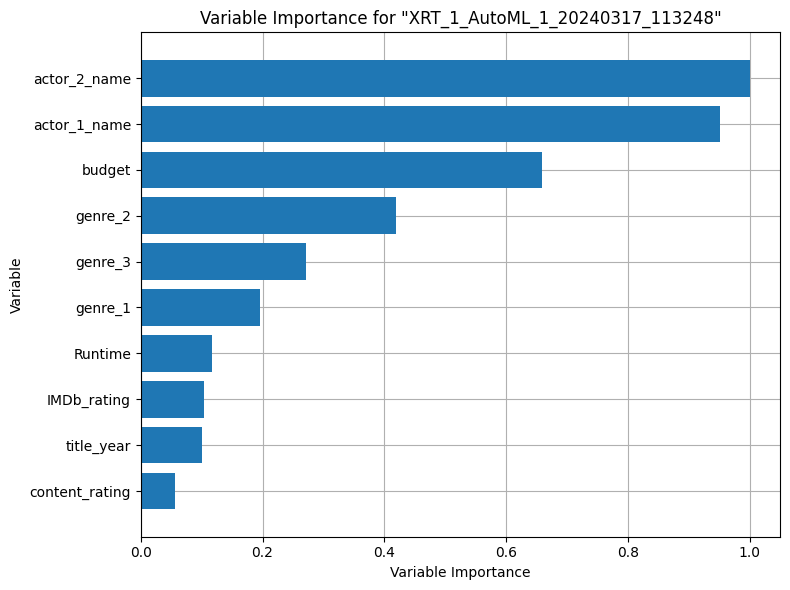

In [22]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])


## Interpreting Variable Importance

The variable importance graph for the top-performing AutoML model reveals that "Prev_campaign" is the most critical feature, indicating that past campaign interactions significantly impact the model's predictions. Following closely in importance are "Amount spent" and "Dt_customer," emphasizing the substantial influence of customer spending behavior and the duration of their relationship with the company. Additionally, "Recency" is highlighted as another noteworthy feature, underscoring the importance of recent customer interactions in shaping the model's predictive outcomes. This prioritization of features provides valuable insights into the factors driving the model's performance and aids in understanding the key determinants of successful predictions.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

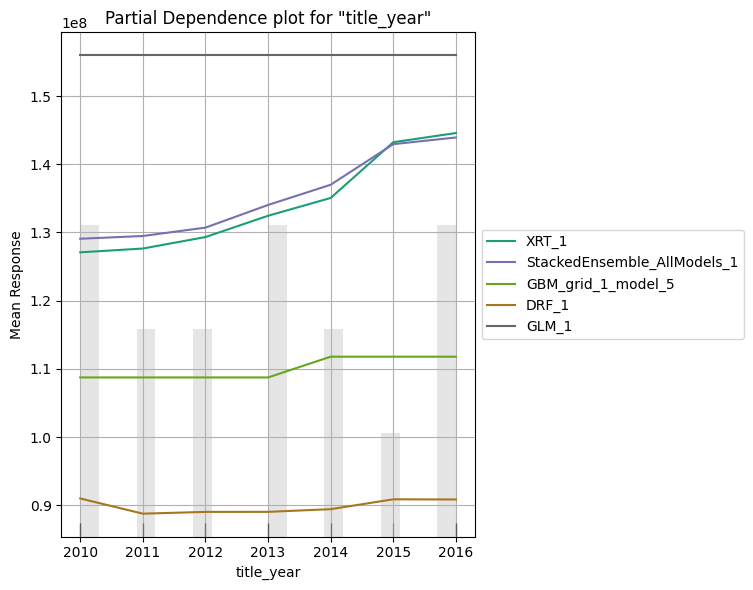

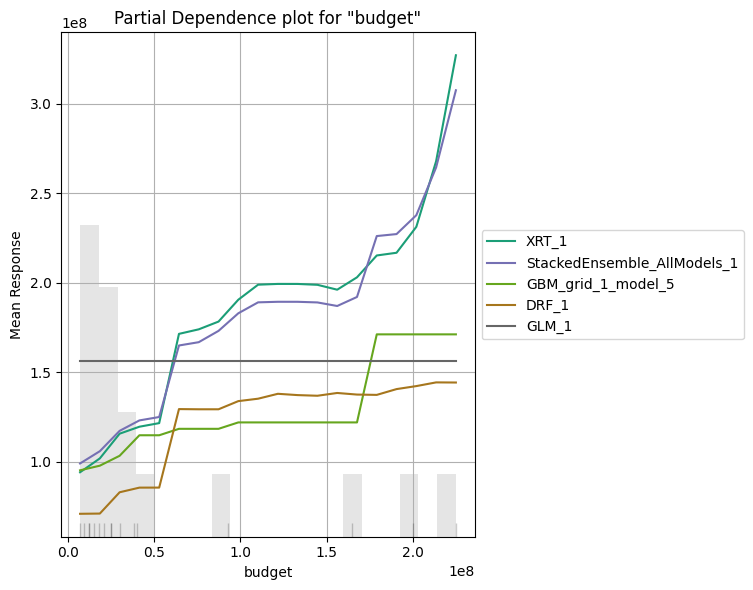

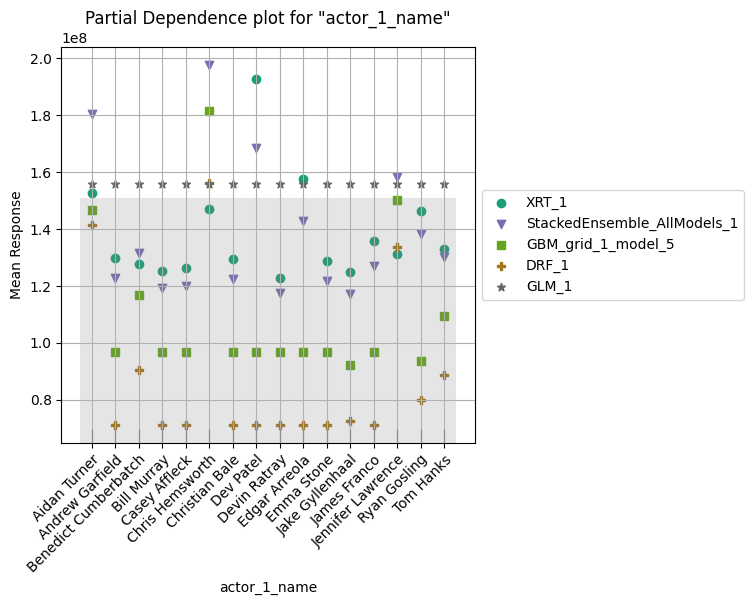

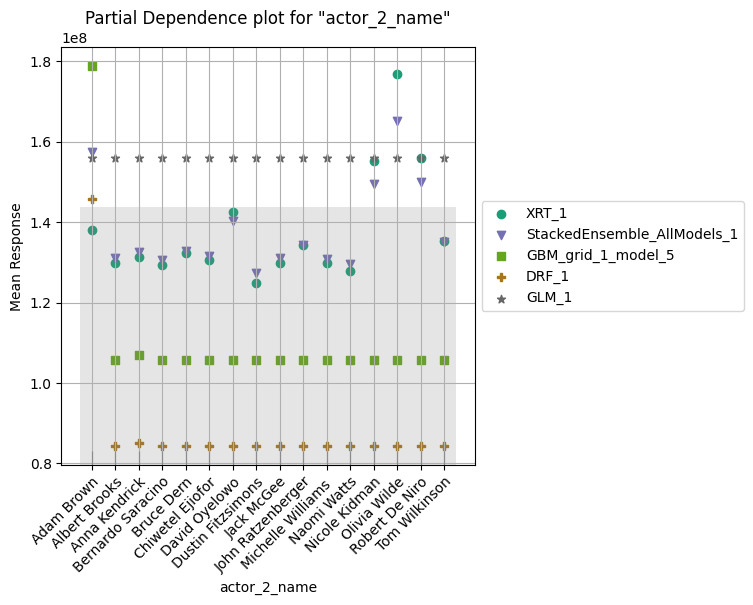

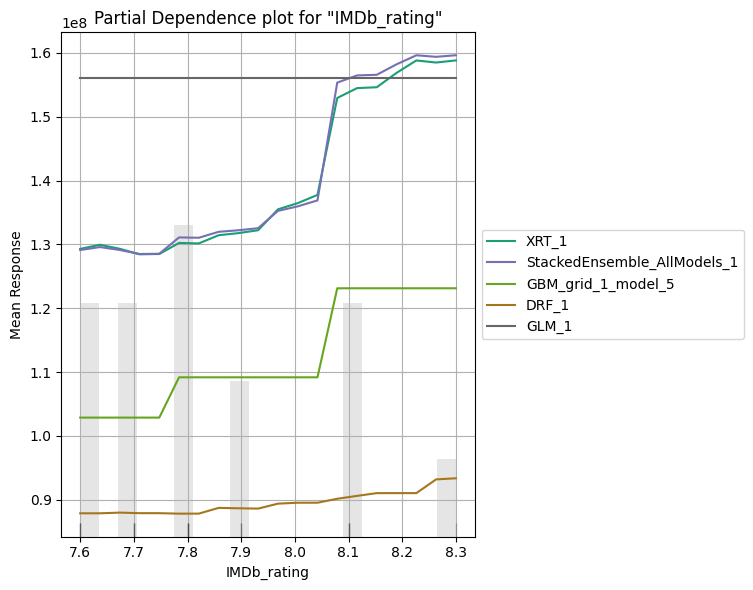

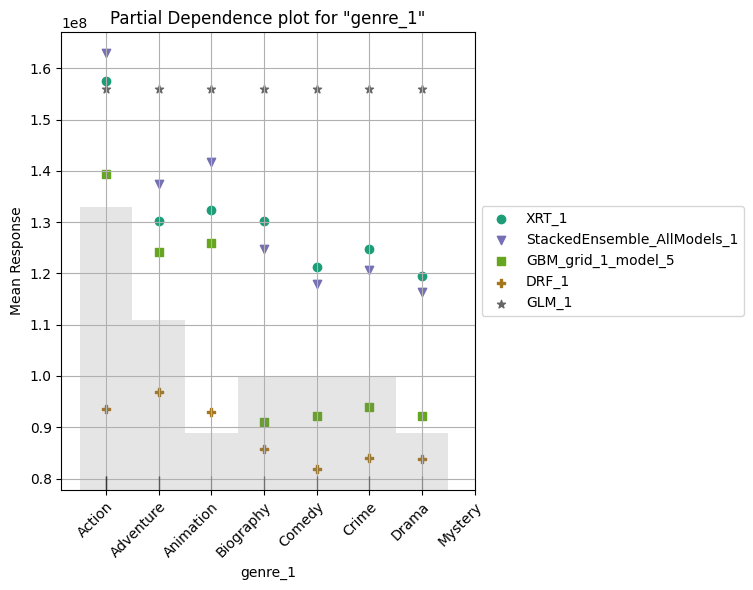

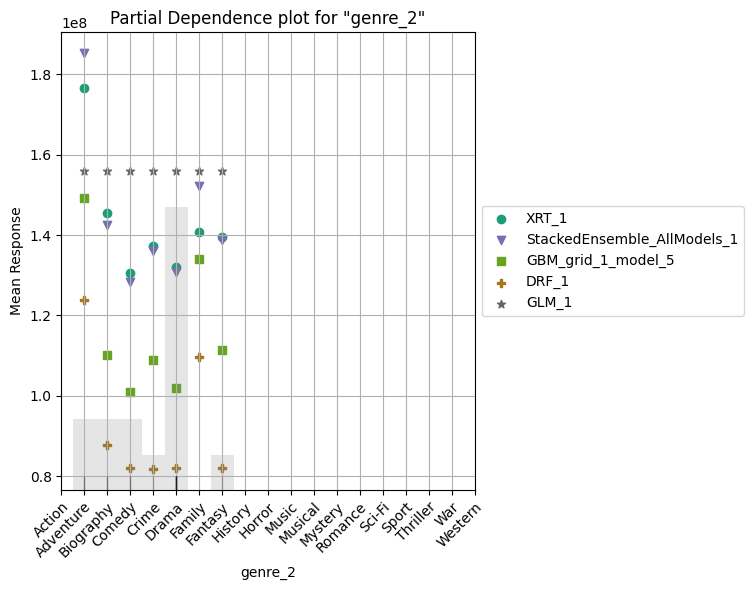

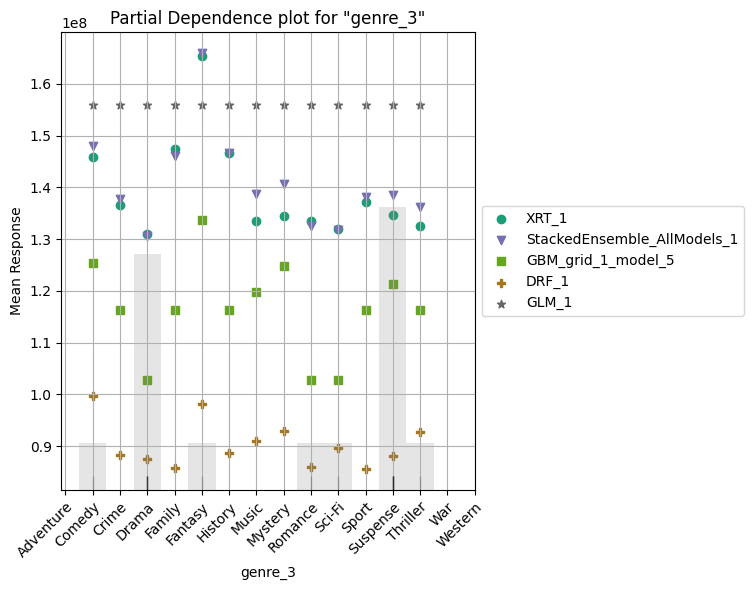

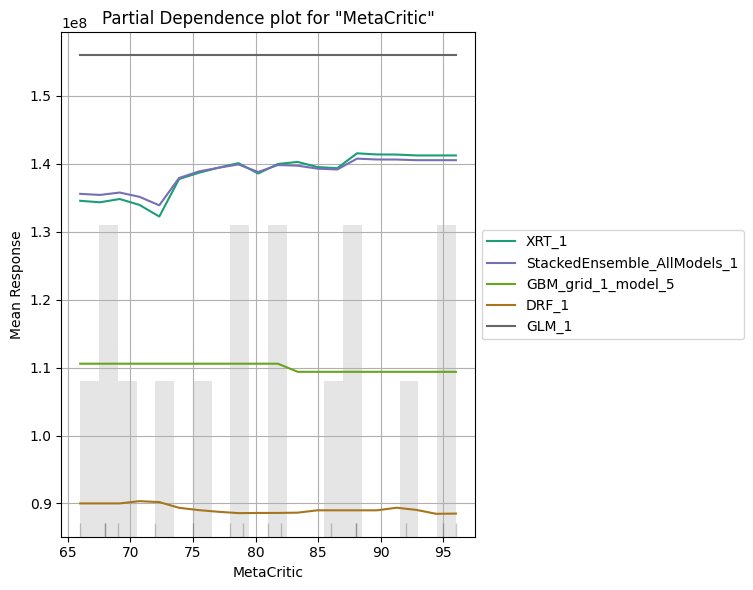

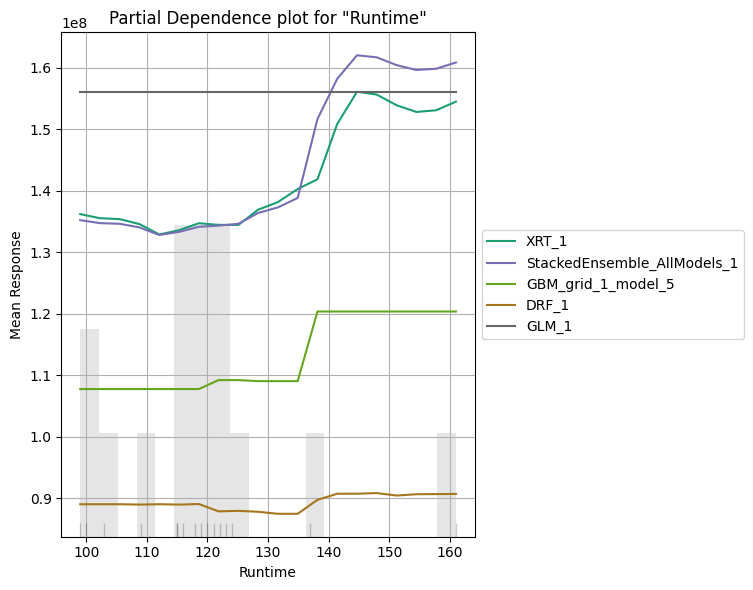

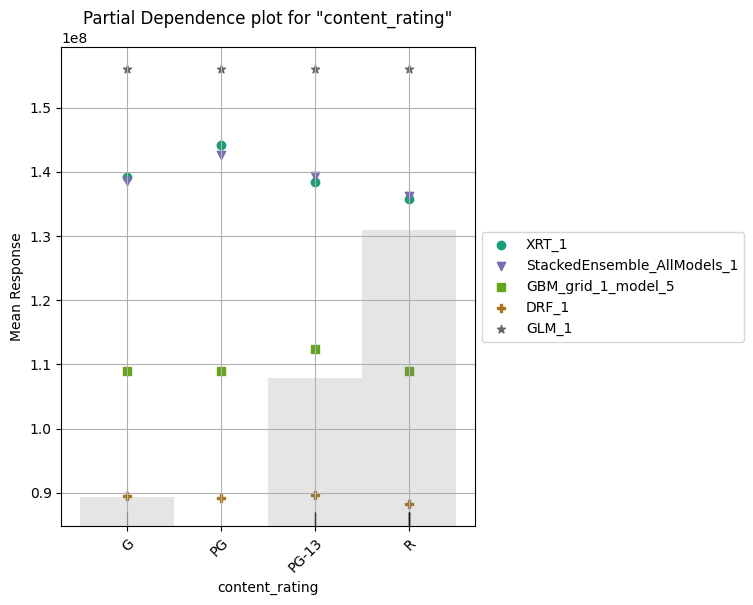

Exception ignored in: <function ExprNode.__del__ at 0x000001D2B4B5AA20>
Traceback (most recent call last):
  File "c:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\expr.py", line 204, in __del__
    ExprNode.rapids("(rm {})".format(self._cache._id))
  File "c:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\expr.py", line 258, in rapids
    return h2o.api("POST /99/Rapids", data={"ast": expr, "session_id": h2o.connection().session_id})
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\h2o.py", line 123, in api
    return h2oconn.request(endpoint, data=data, json=json, filename=filename, save_to=save_to)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\backend\connection.

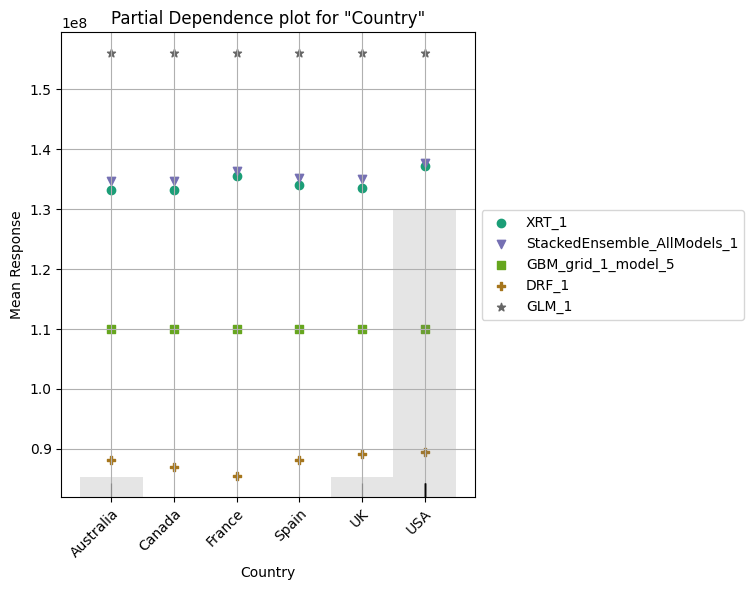

In [23]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])


## Interpreting Partial Dependency Plots

The pdp shows us the effect of each feature on prediction.

Prev_campaign has a high linear dependency while compain has no effect on prediction

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                        rmse          mse          mae       rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  -----------  -----------  -----------  ----------  ------------------------  ------------------  -------------------------  ---------------
XGBoost_1_AutoML_1_20240317_144950                       6.48976e+07  4.2117e+15   5.30309e+07  nan                      4.2117e+15                 4012                   0.06809   XGBoost
XRT_1_AutoML_1_20240317_144950                           6.57609e+07  4.3245e+15   4.79567e+07    0.723026               4.3245e+15                  672                   0.203762  DRF
DRF_1_AutoML_1_20240317_144950                           7.36086e+07  5.41823e+15  4.40155e+07    0.634971               5.41823e+15                 336                   0.21438   DRF
GBM_3_AutoML_1_20240317_144950                           7.87194e+07  6.19674e+15  4.82003e+07    0.629282               6.19674e+15                 159                   0.208953  GBM
StackedEnsemble_AllModels_1_AutoML_1_20240317_144950     8.02974e+07  6.44767e+15  6.30468e+07    0.808187               6.44767e+15                2196                   1.90588   StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240317_144950  8.13981e+07  6.62565e+15  6.18576e+07    0.795344               6.62565e+15                2794                   0.534448  StackedEnsemble
XGBoost_2_AutoML_1_20240317_144950                       8.58677e+07  7.37325e+15  6.59718e+07  nan                      7.37325e+15                2146                   0.879094  XGBoost
GBM_2_AutoML_1_20240317_144950                           8.8344e+07   7.80466e+15  5.41946e+07    0.658353               7.80466e+15                 132                   0.050765  GBM
GBM_4_AutoML_1_20240317_144950                           9.48348e+07  8.99364e+15  5.82427e+07    0.747112               8.99364e+15                 111                   0.05641   GBM
XGBoost_3_AutoML_1_20240317_144950                       9.91535e+07  9.83141e+15  7.43361e+07    1.13799                9.83141e+15                1901                   0.368931  XGBoost
GBM_5_AutoML_1_20240317_144950                           1.01436e+08  1.02892e+16  6.79291e+07    0.85999                1.02892e+16                 173                   0.118632  GBM
GLM_1_AutoML_1_20240317_144950                           1.15188e+08  1.32682e+16  1.02485e+08    1.13123                1.32682e+16                 135                   0.648373  GLM
[12 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

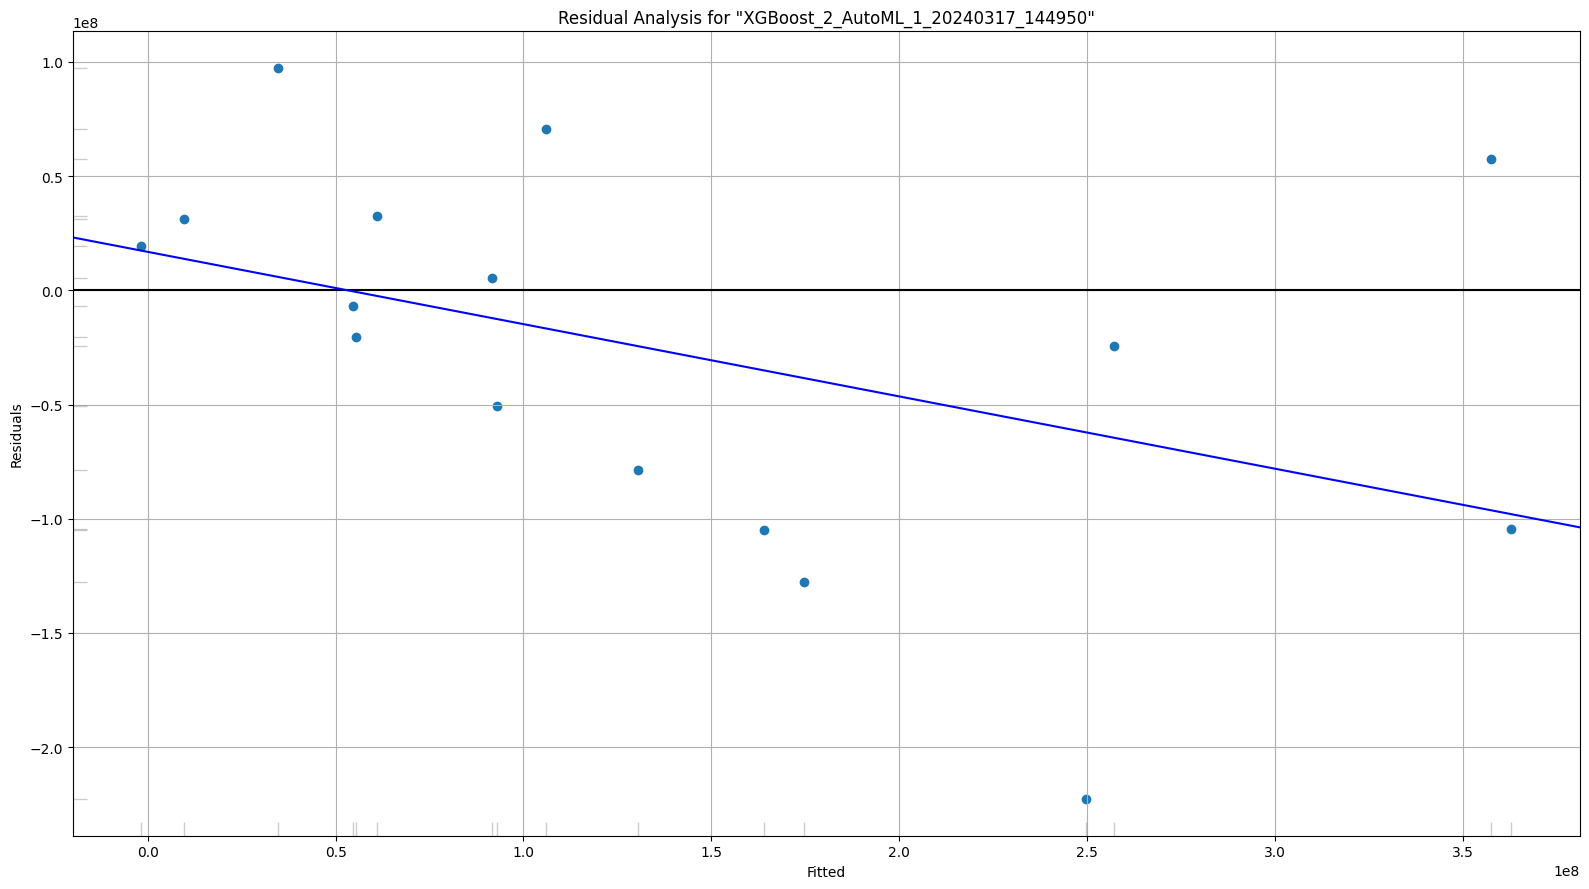

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

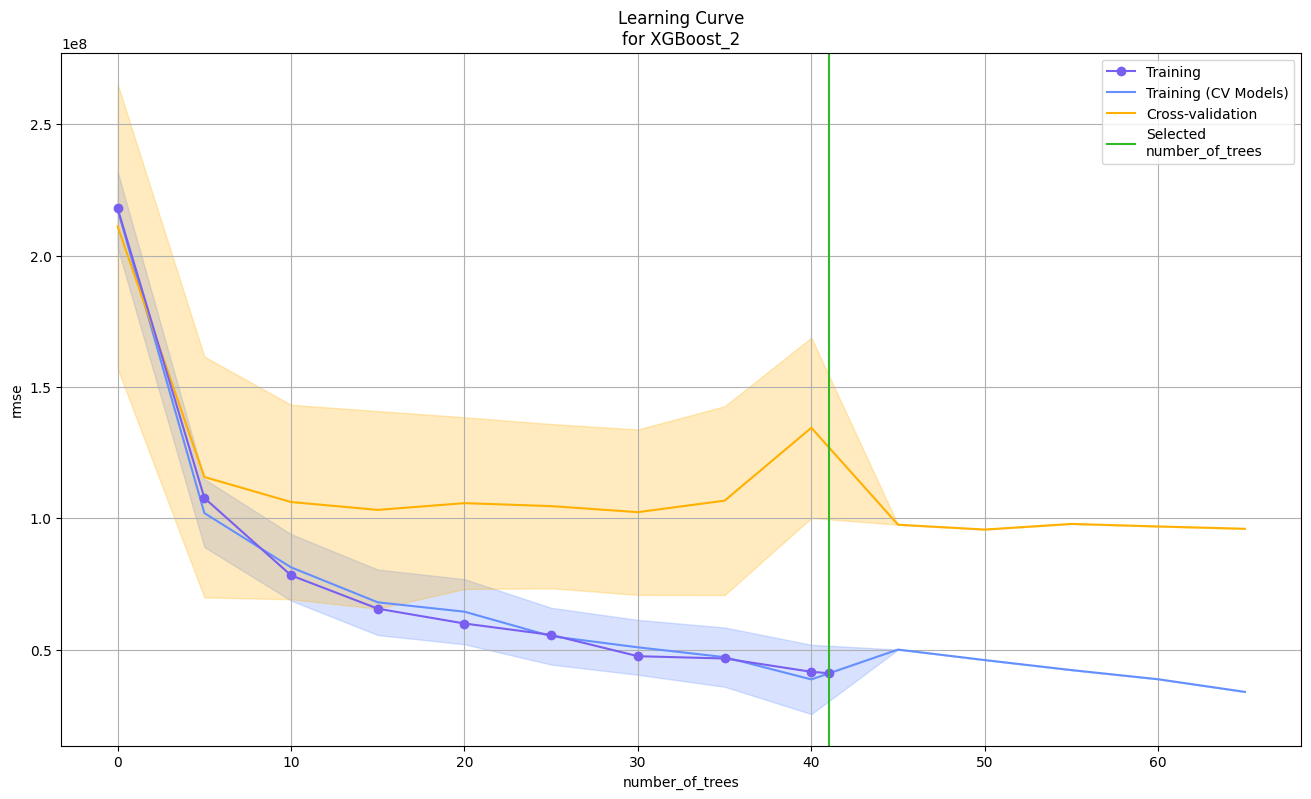

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

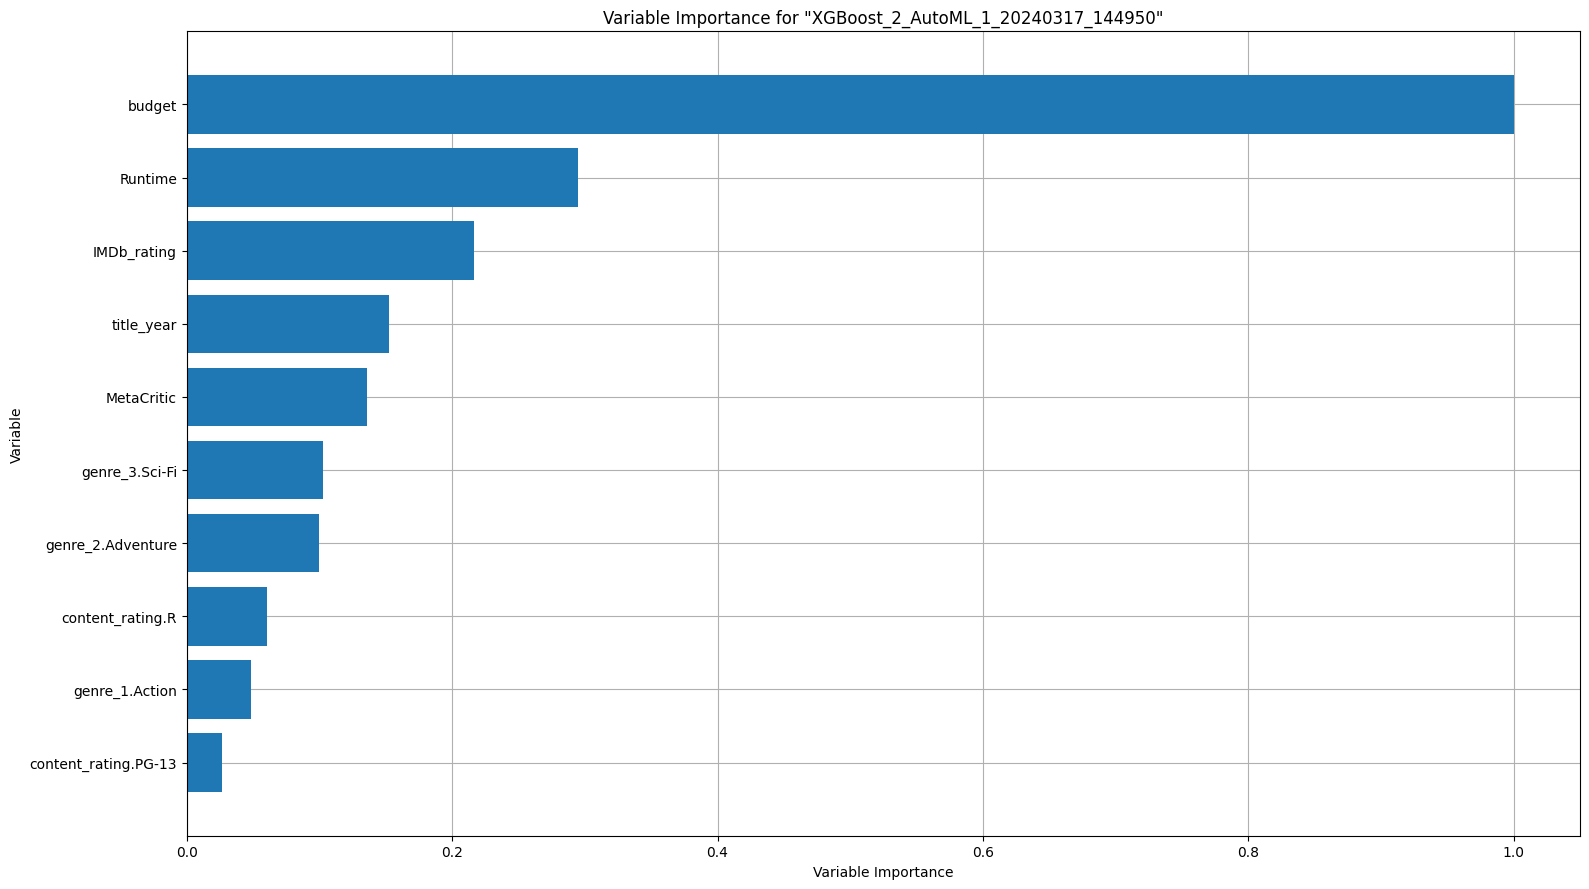

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

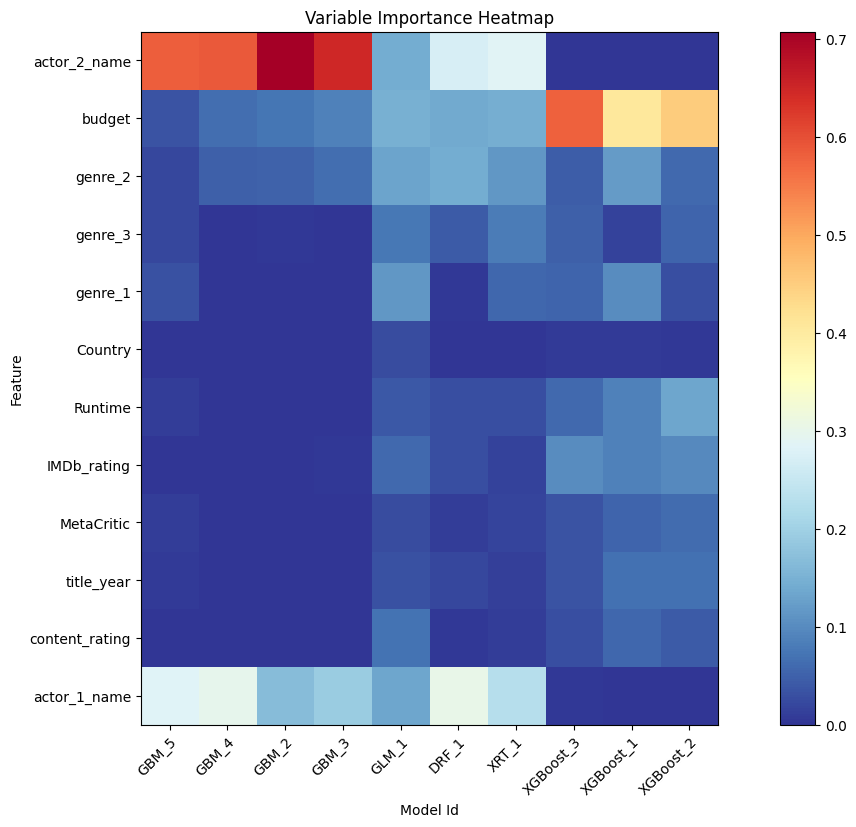

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

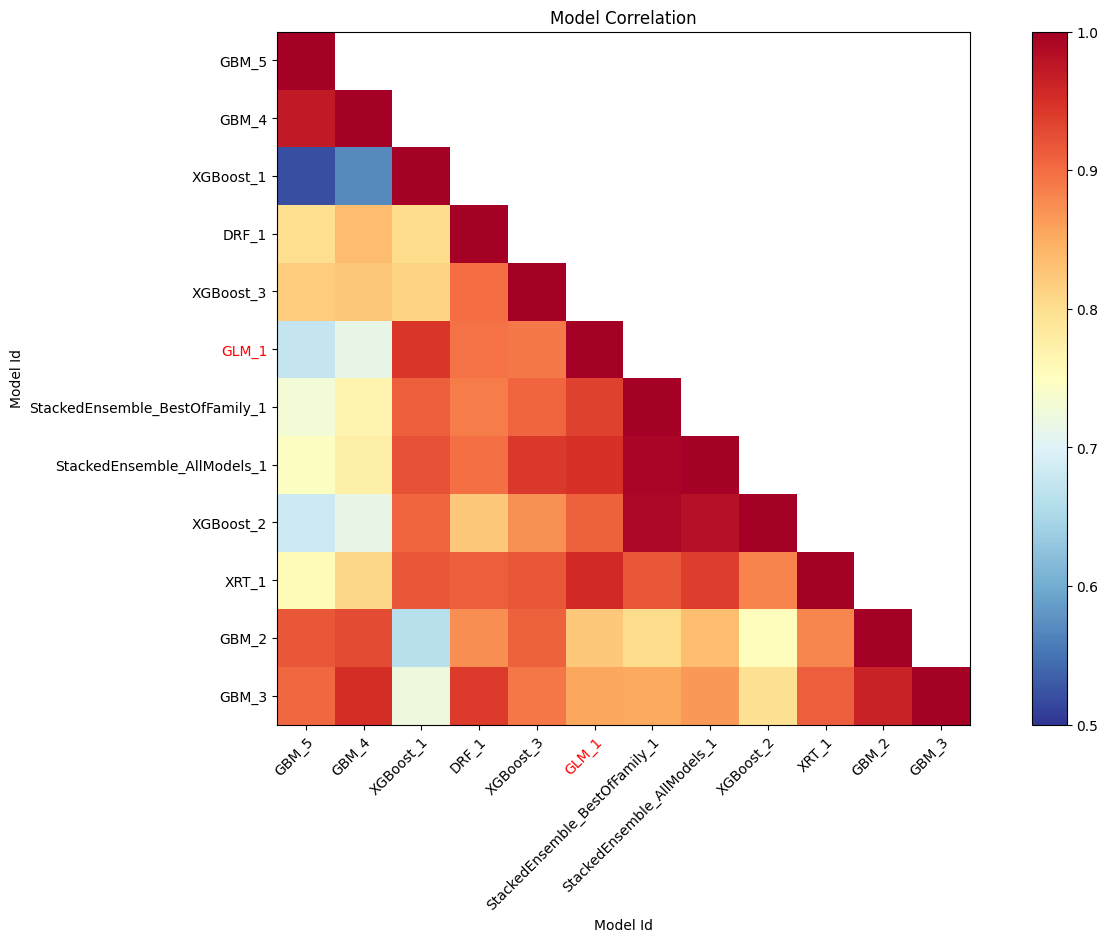

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

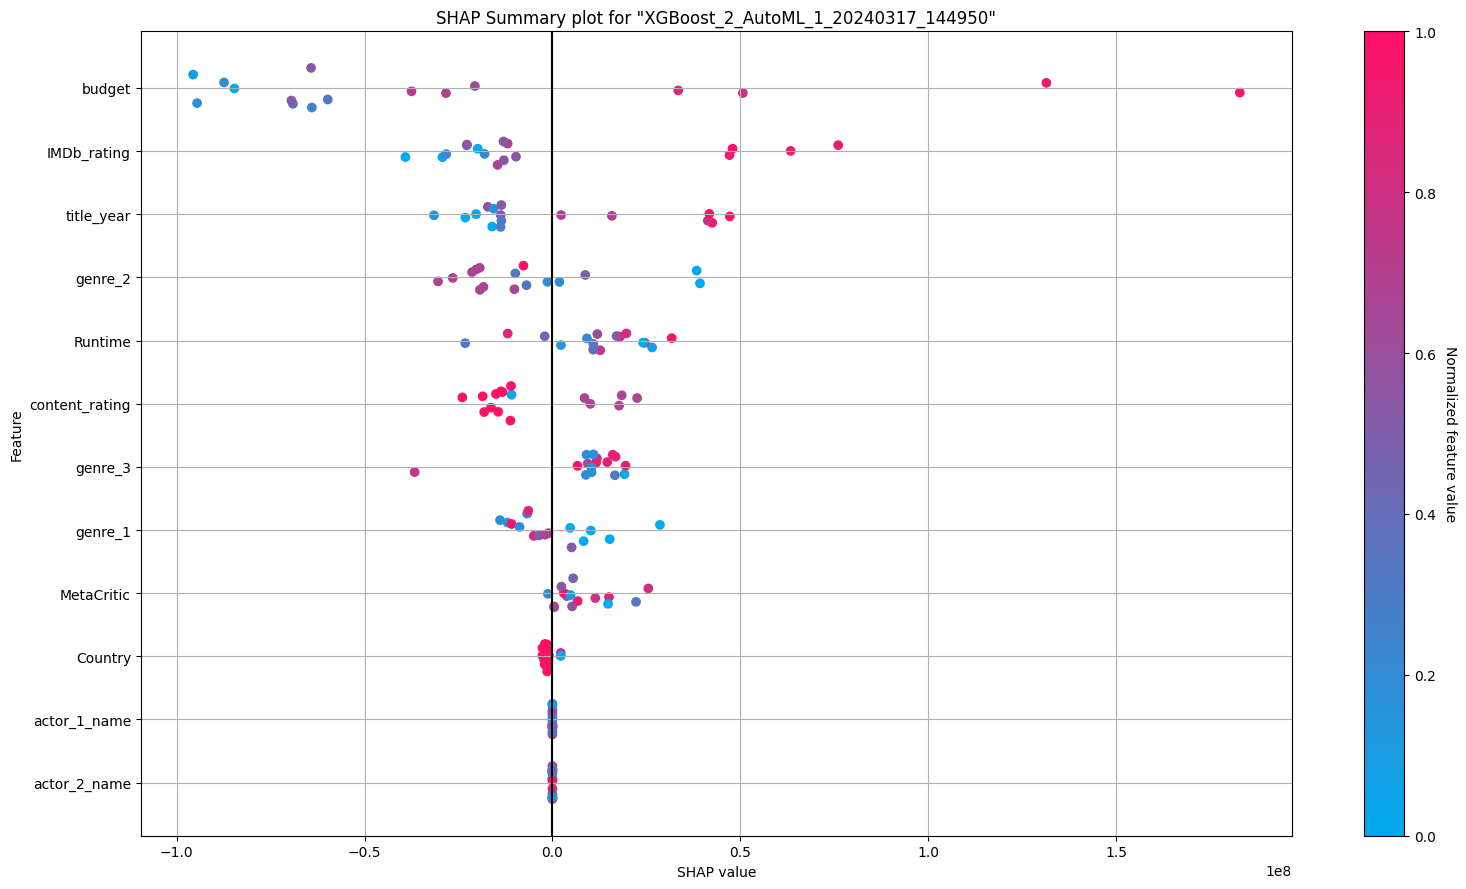

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

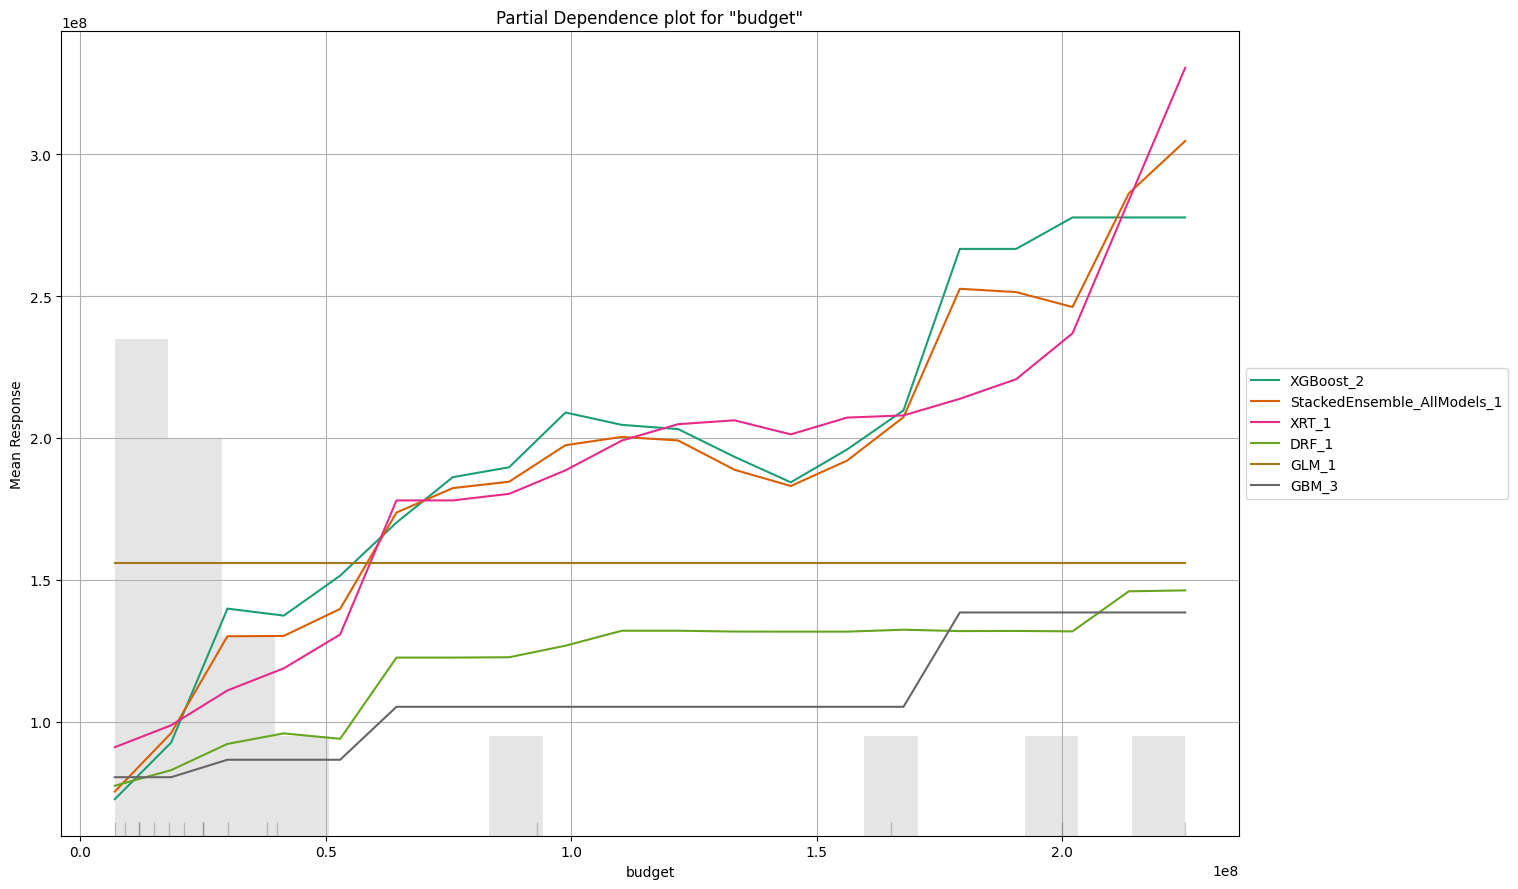

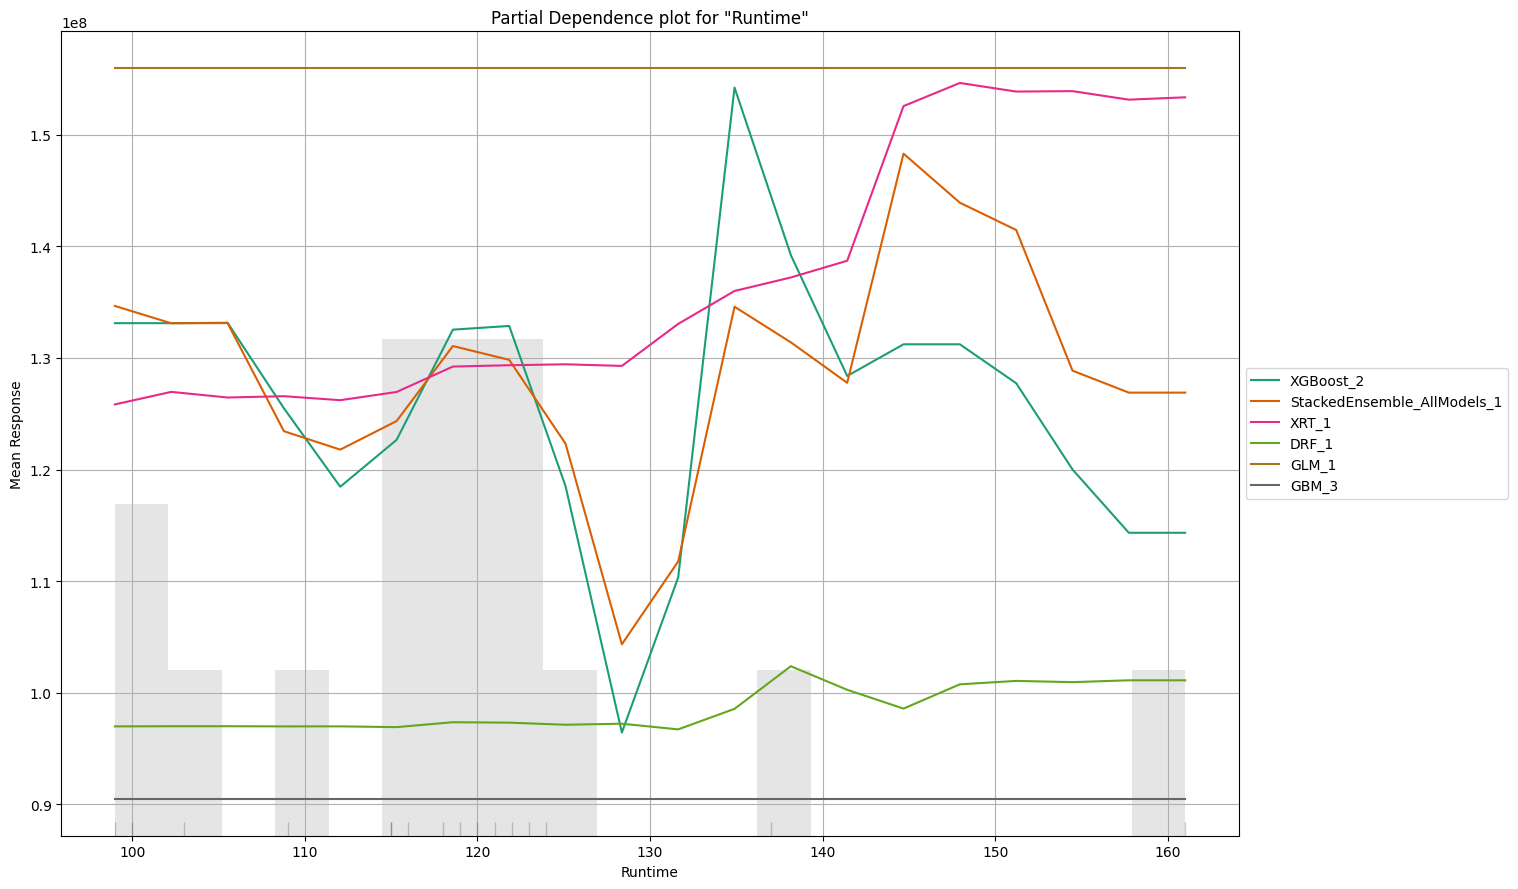

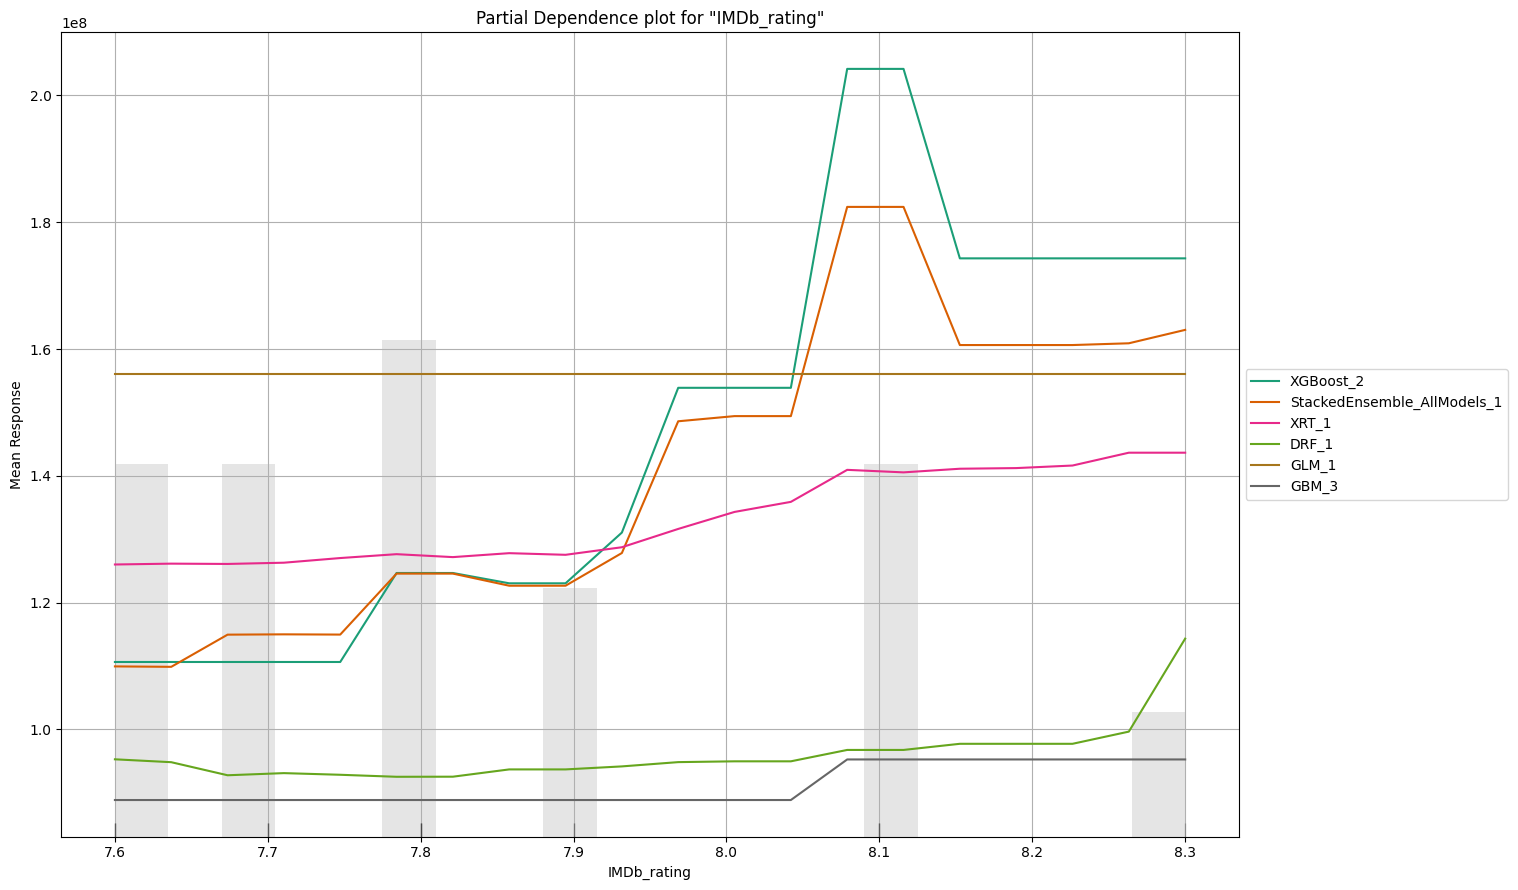

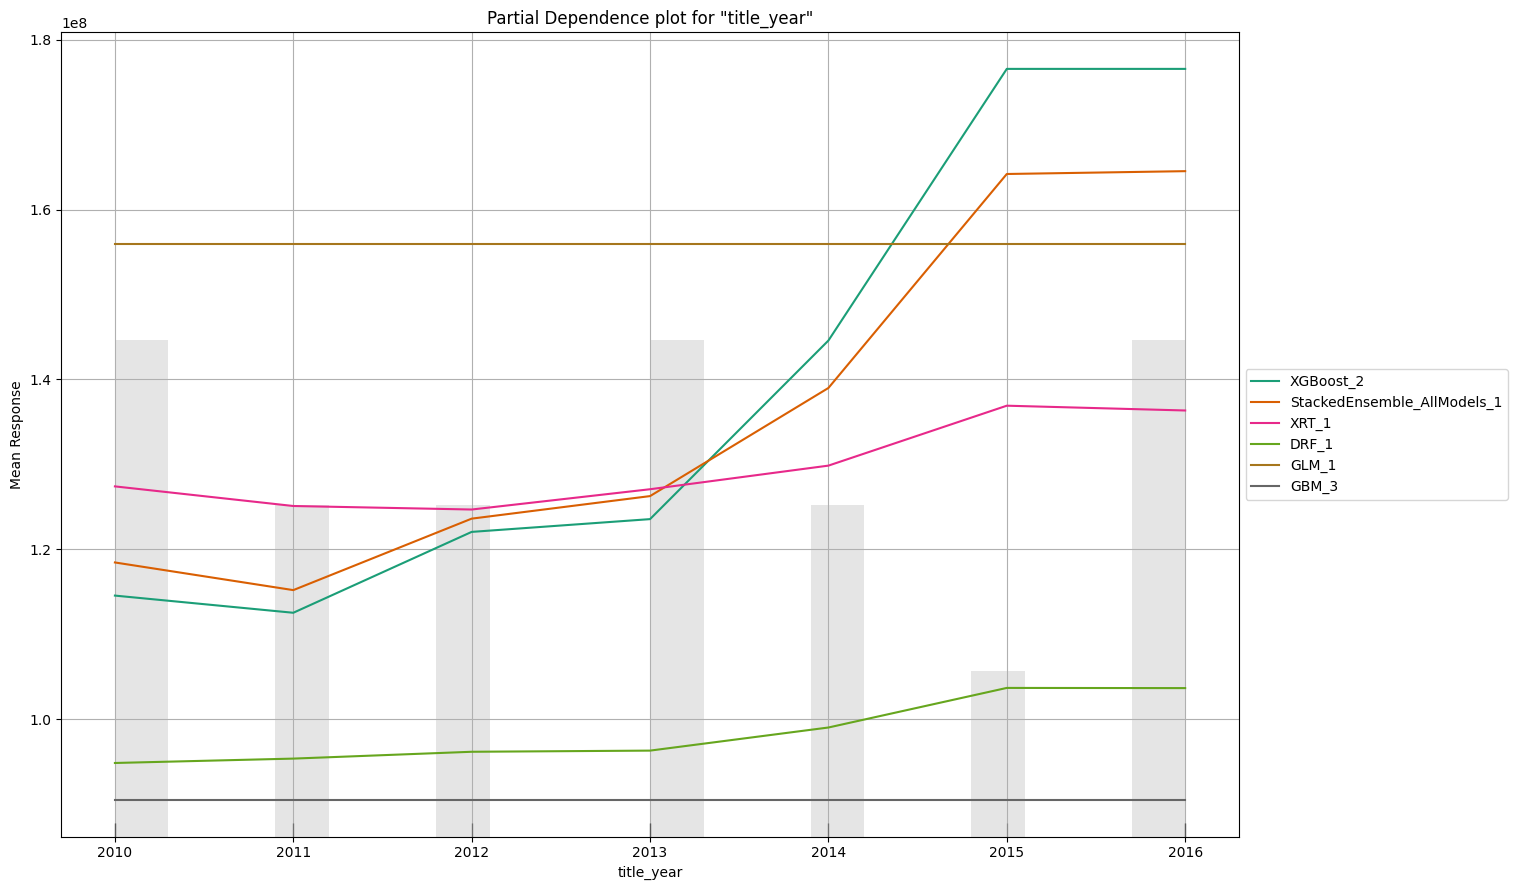

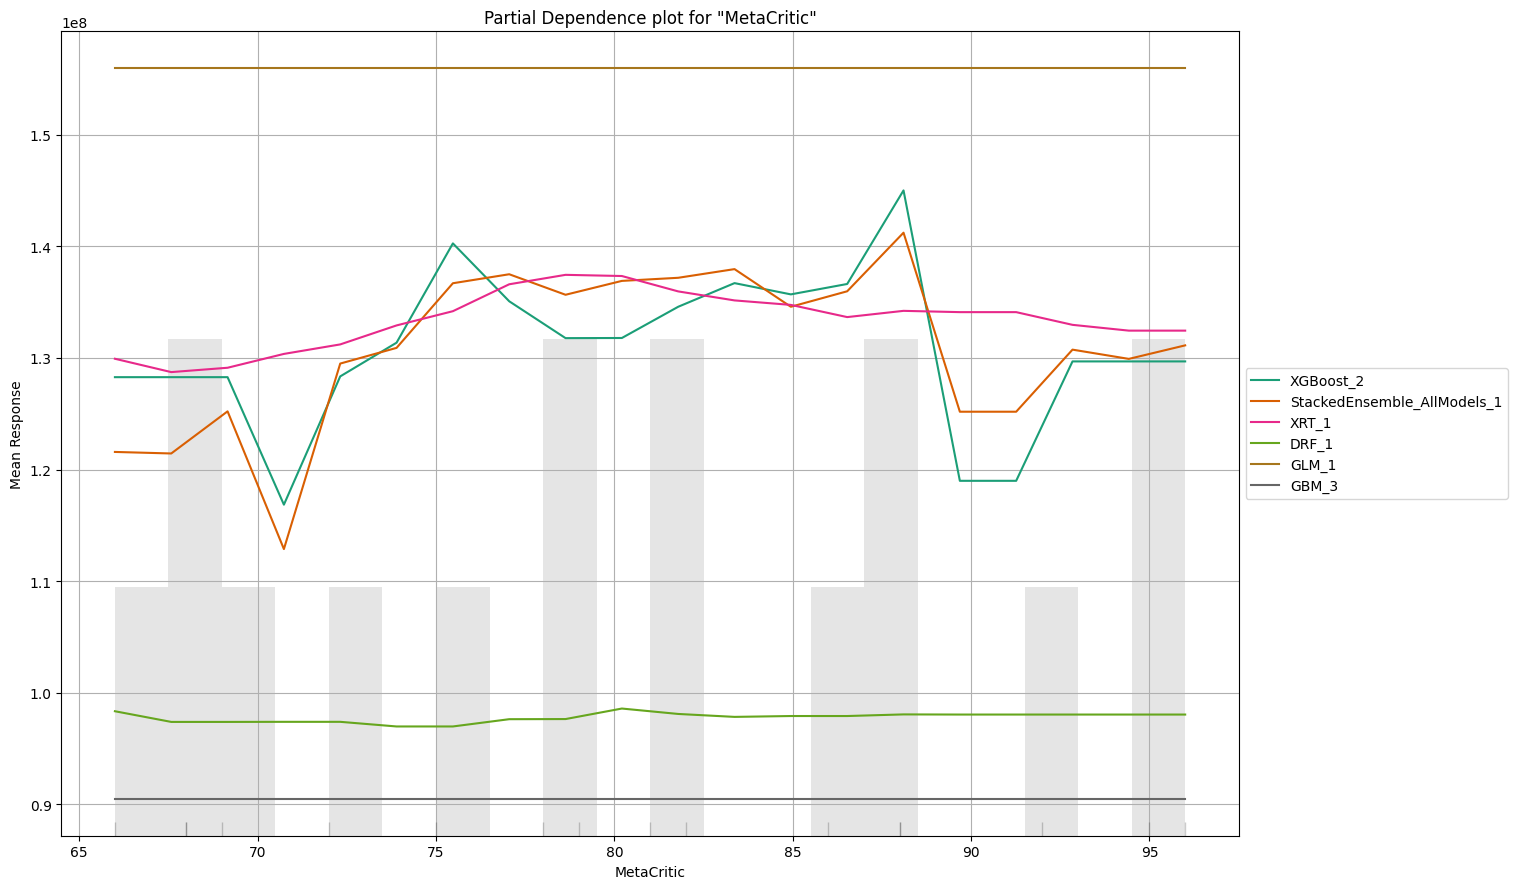

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

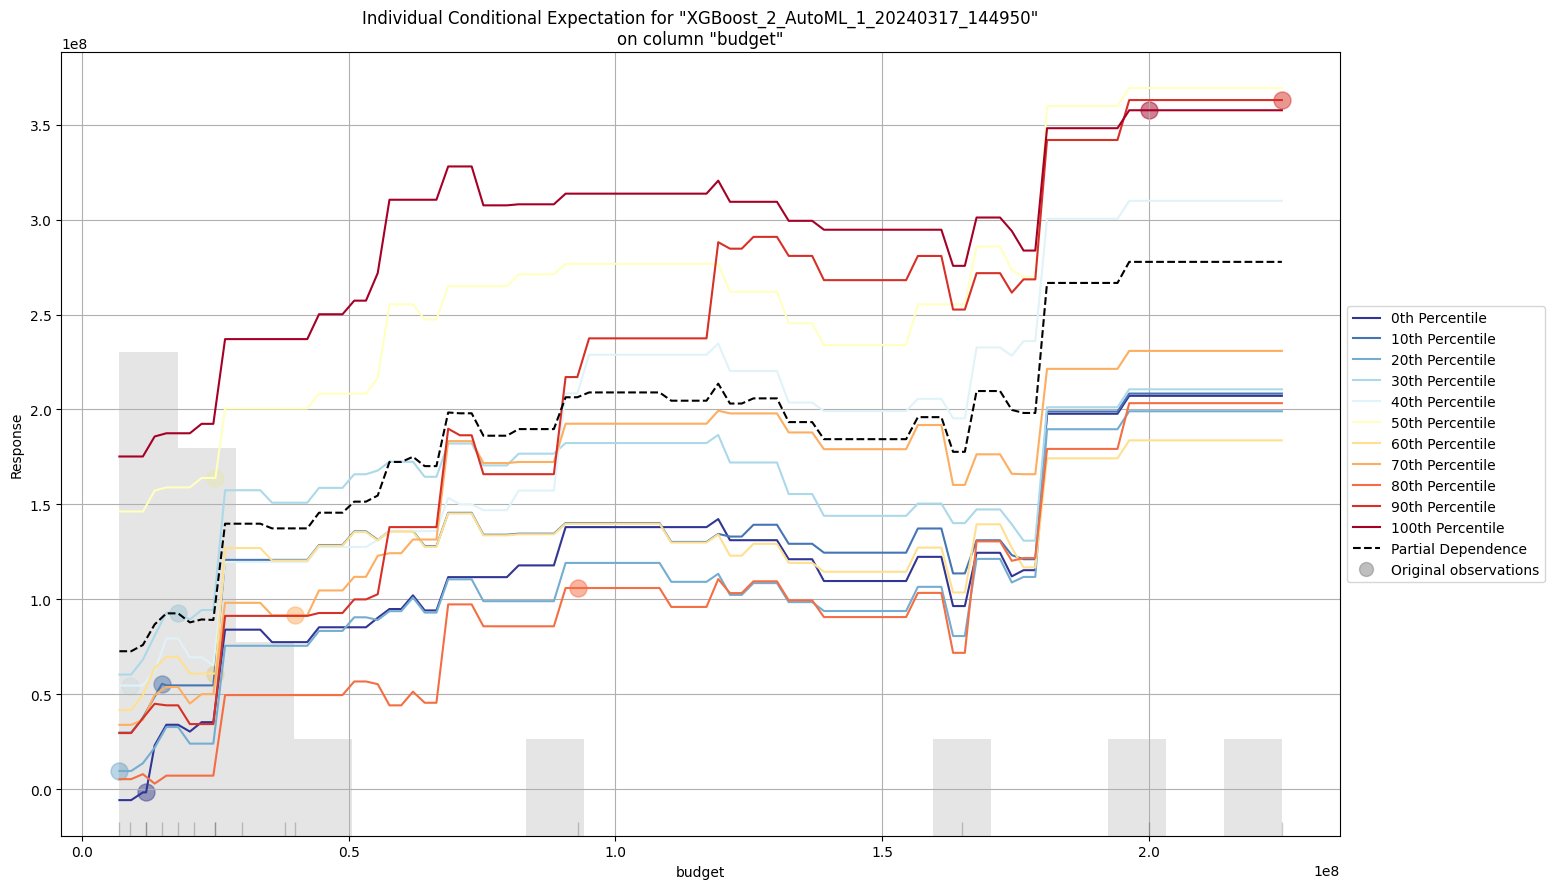

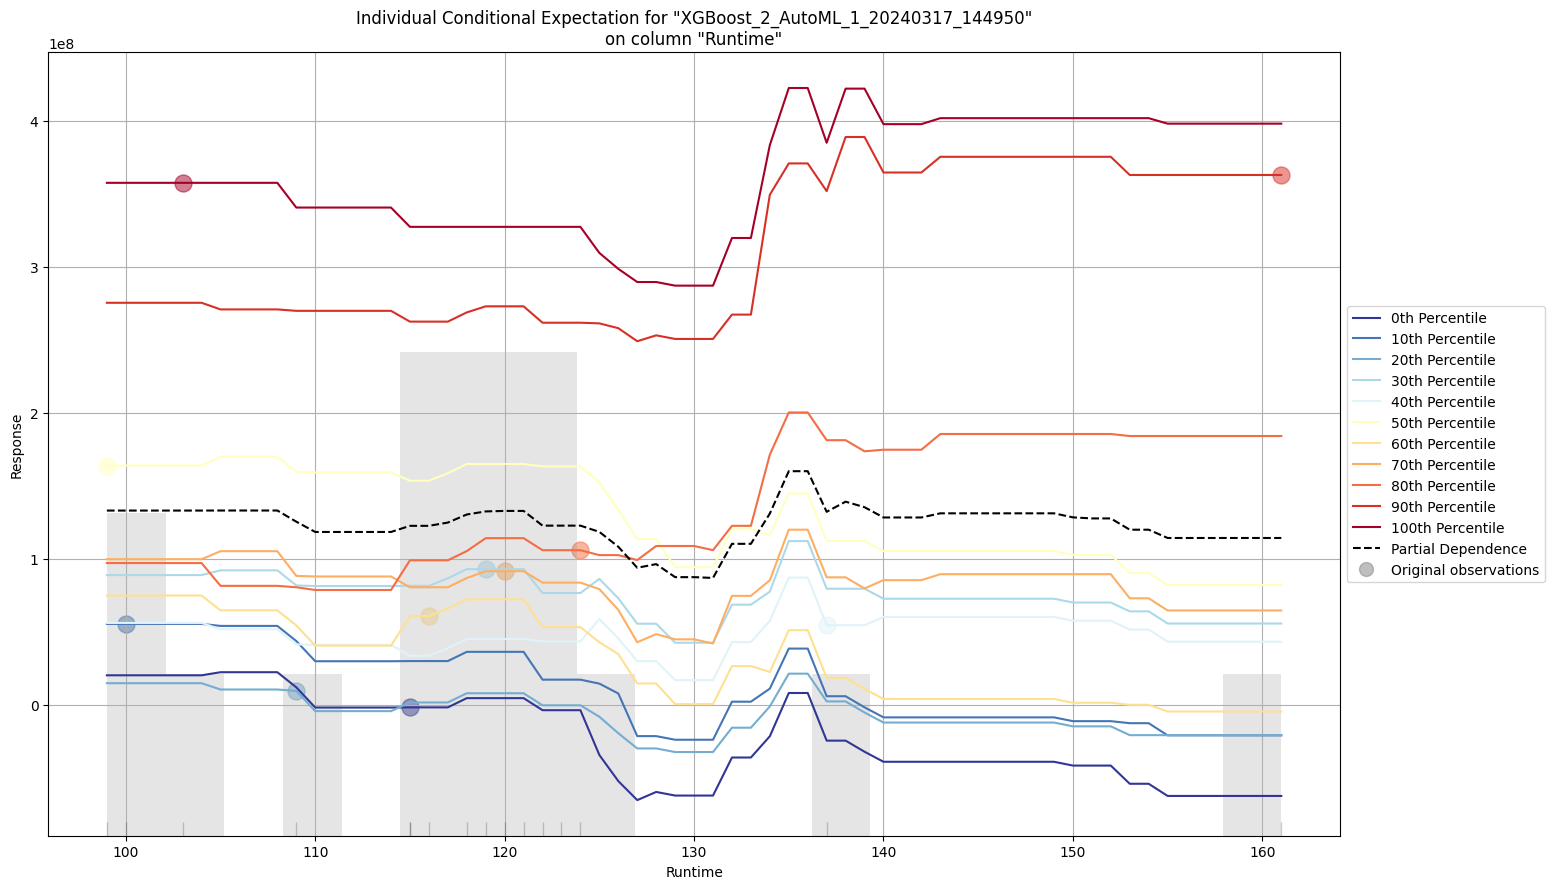

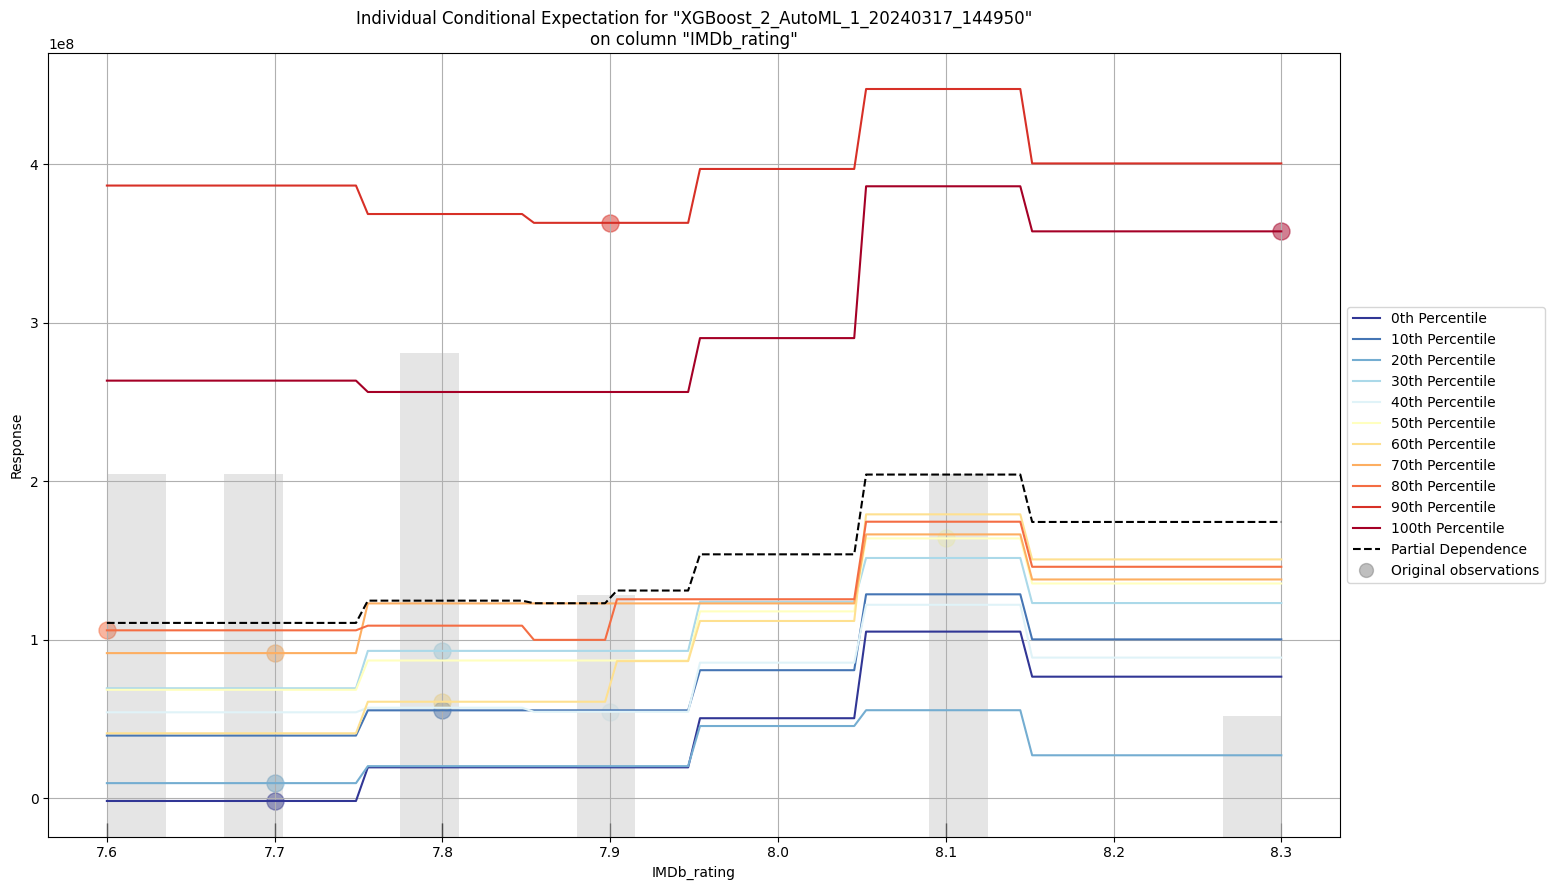

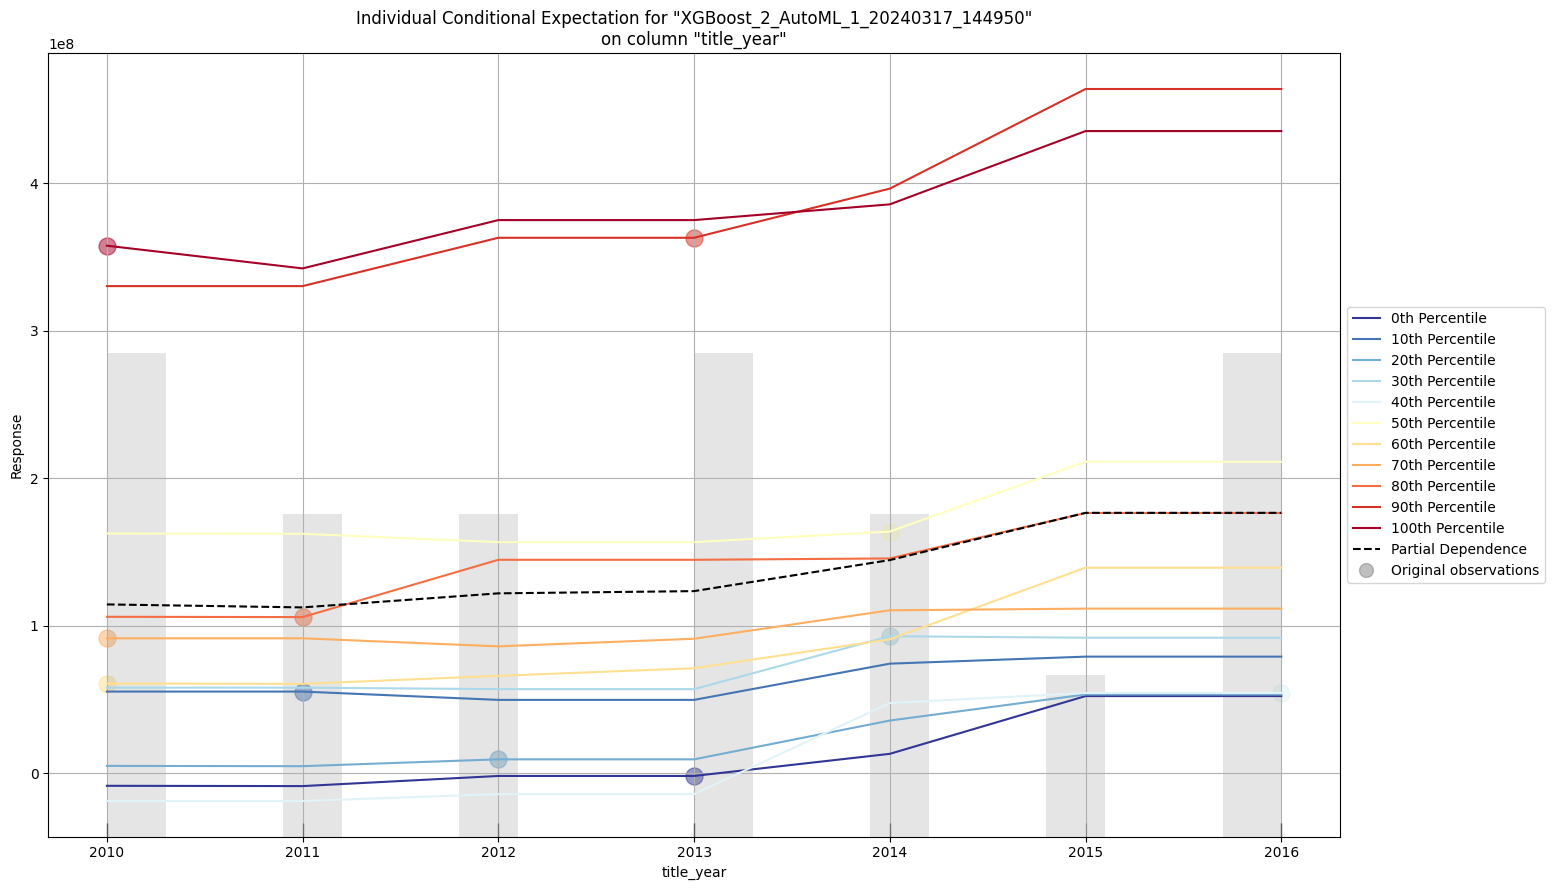

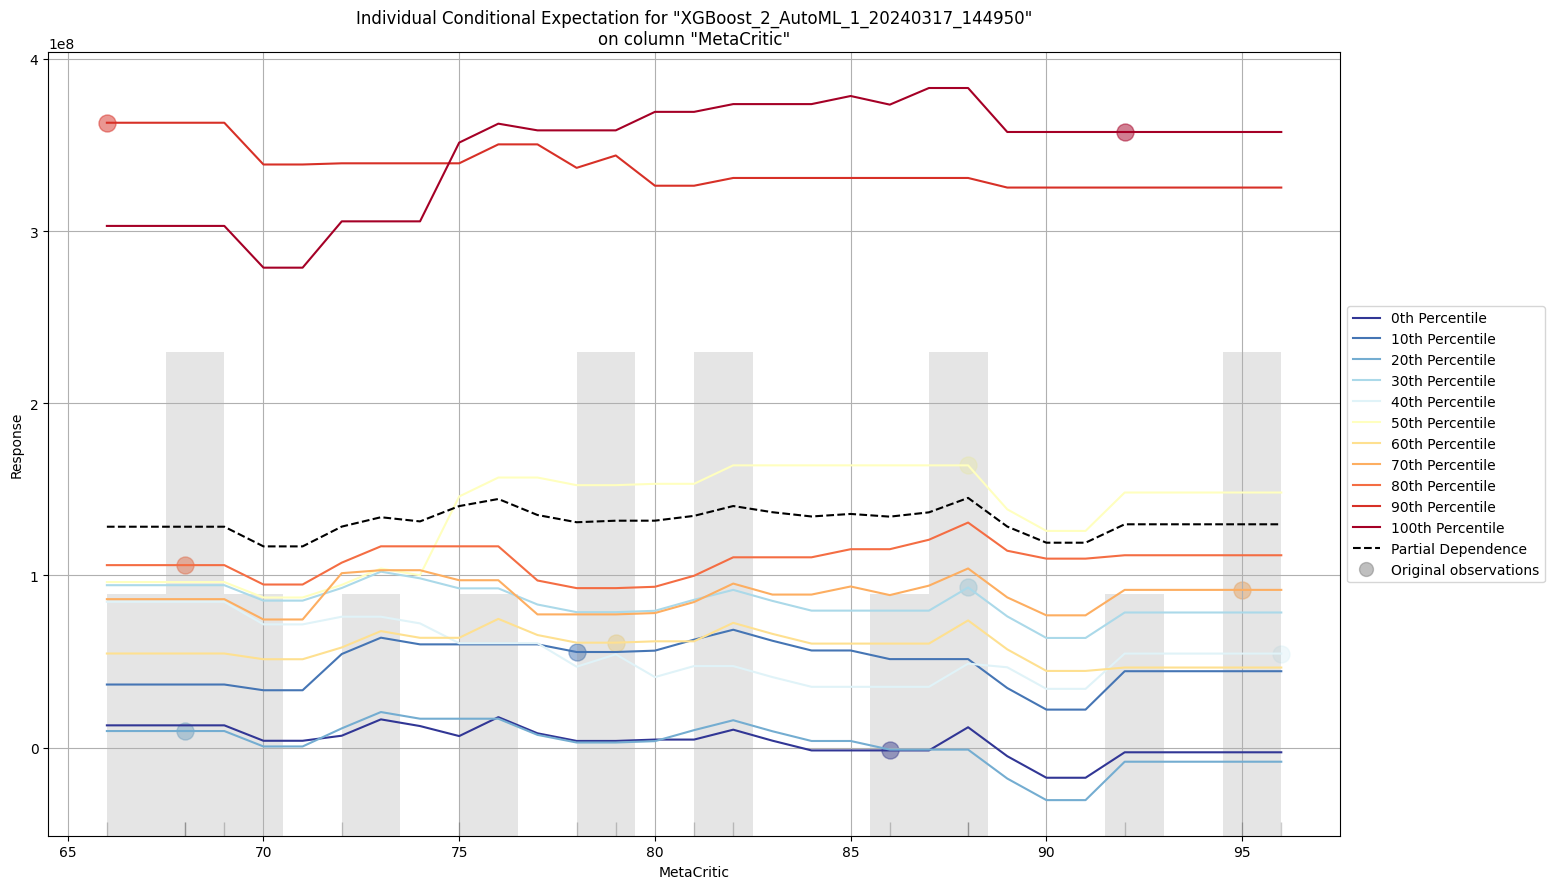

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                        rmse          mse          mae       rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  -----------  -----------  -----------  ----------  ------------------------  ------------------  -------------------------  ---------------
XGBoost_1_AutoML_1_20240317_144950                       6.48976e+07  4.2117e+15   5.30309e+07  nan                      4.2117e+15                 4012                   0.06809   XGBoost
XRT_1_AutoML_1_20240317_144950                           6.57609e+07  4.3245e+15   4.79567e+07    0.723026               4.3245e+15                  672                   0.203762  DRF
DRF_1_AutoML_1_20240317_144950                           7.36086e+07  5.41823e+15  4.40155e+07    0.634971               5.41823e+15                 336                   0.21438   DRF
GBM_3_AutoML_1_20240317_144950                           7.87194e+07  6.19674e+15  4.82003e+07    0.629282               6.19674e+15                 159                   0.208953  GBM
StackedEnsemble_AllModels_1_AutoML_1_20240317_144950     8.02974e+07  6.44767e+15  6.30468e+07    0.808187               6.44767e+15                2196                   1.90588   StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240317_144950  8.13981e+07  6.62565e+15  6.18576e+07    0.795344               6.62565e+15                2794                   0.534448  StackedEnsemble
XGBoost_2_AutoML_1_20240317_144950                       8.58677e+07  7.37325e+15  6.59718e+07  nan                      7.37325e+15                2146                   0.879094  XGBoost
GBM_2_AutoML_1_20240317_144950                           8.8344e+07   7.80466e+15  5.41946e+07    0.658353               7.80466e+15                 132                   0.050765  GBM
GBM_4_AutoML_1_20240317_144950                           9.48348e+07  8.99364e+15  5.82427e+07    0.747112               8.99364e+15                 111                   0.05641   GBM
XGBoost_3_AutoML_1_20240317_144950                       9.91535e+07  9.83141e+15  7.43361e+07    1.13799                9.83141e+15                1901                   0.368931  XGBoost
GBM_5_AutoML_1_20240317_144950                           1.01436e+08  1.02892e+16  6.79291e+07    0.85999                1.02892e+16                 173                   0.118632  GBM
GLM_1_AutoML_1_20240317_144950                           1.15188e+08  1.32682e+16  1.02485e+08    1.13123                1.32682e+16                 135                   0.648373  GLM
[12 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

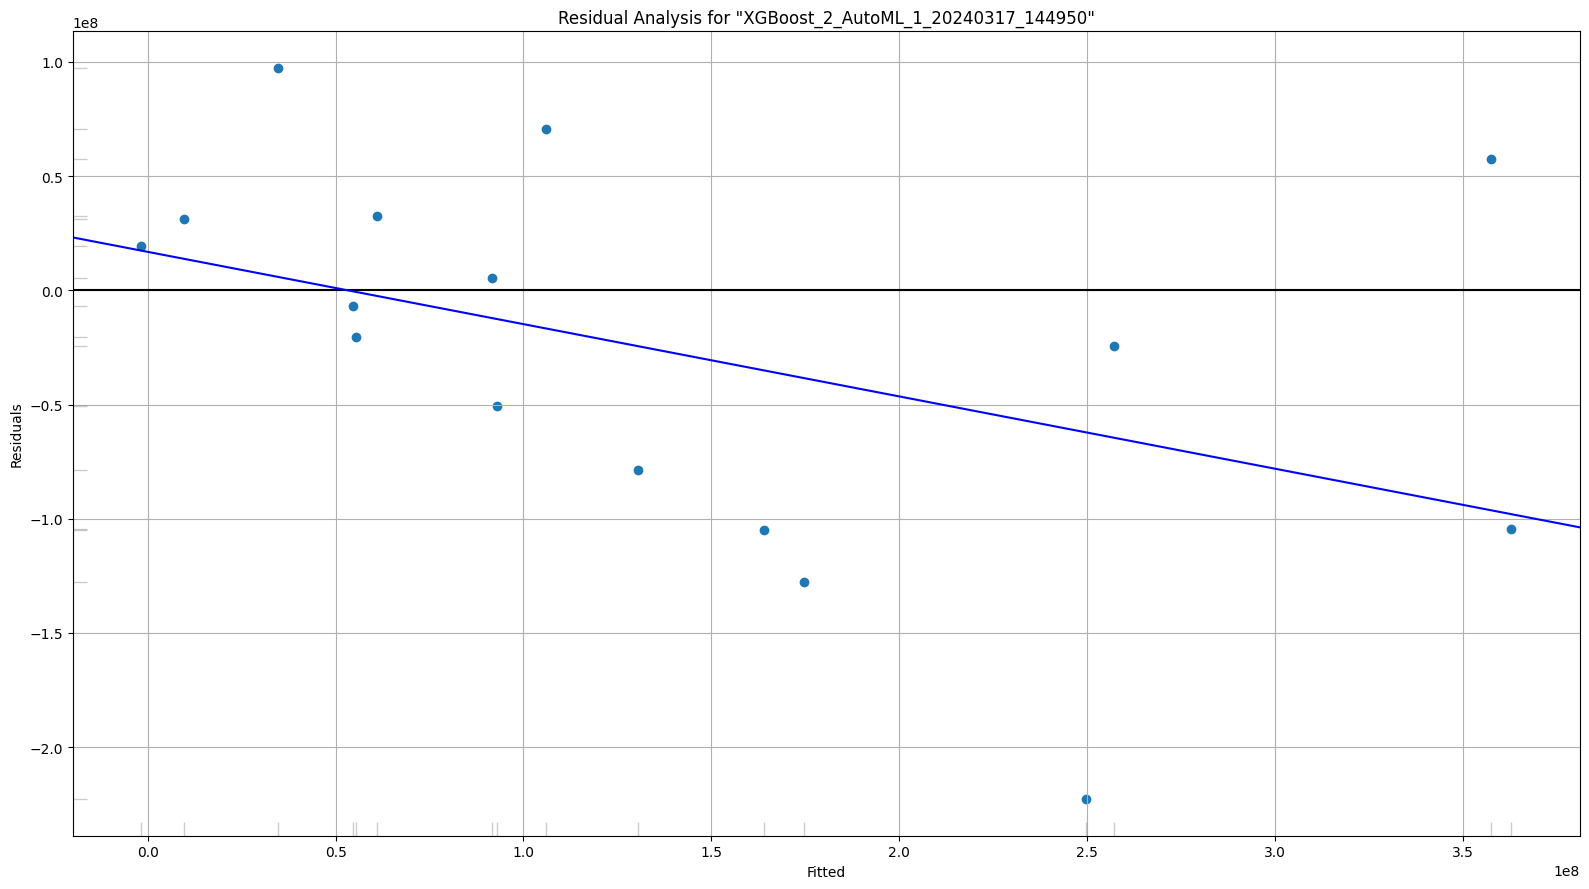

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

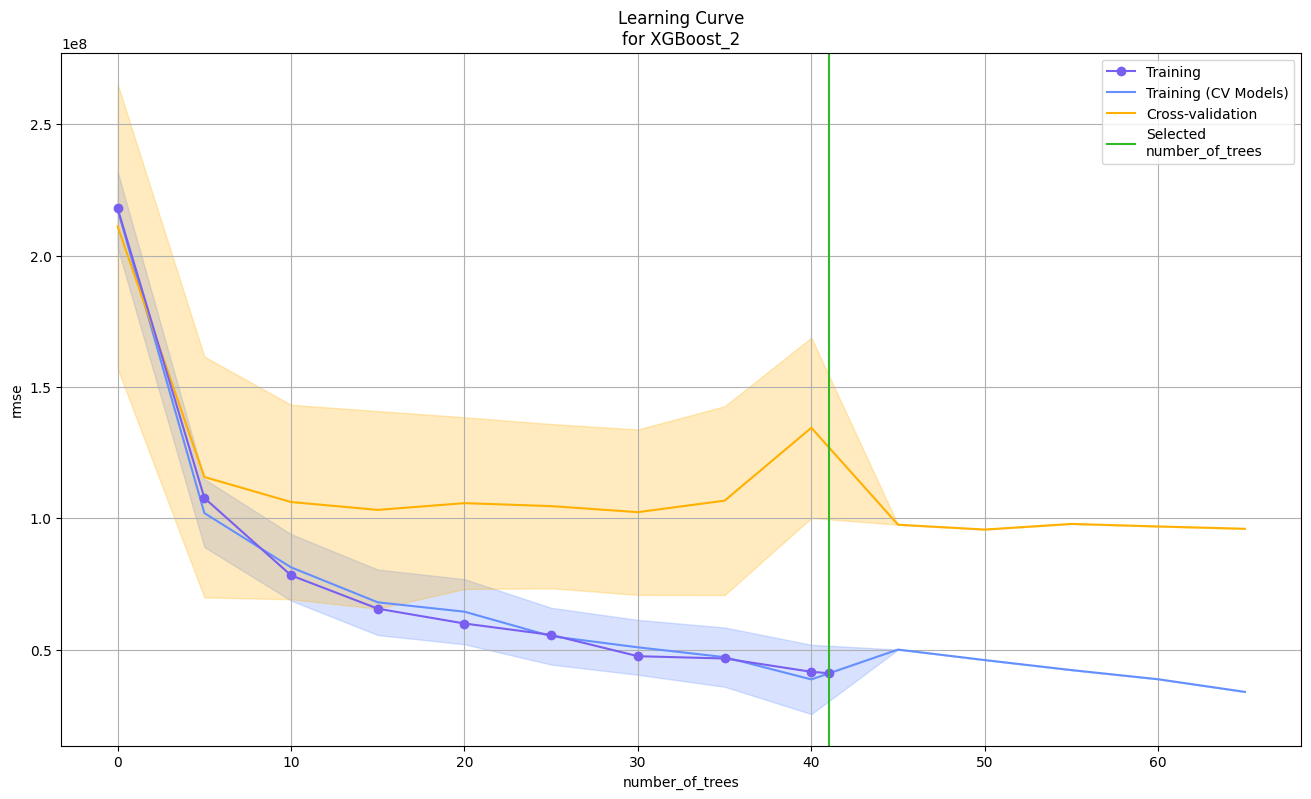

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

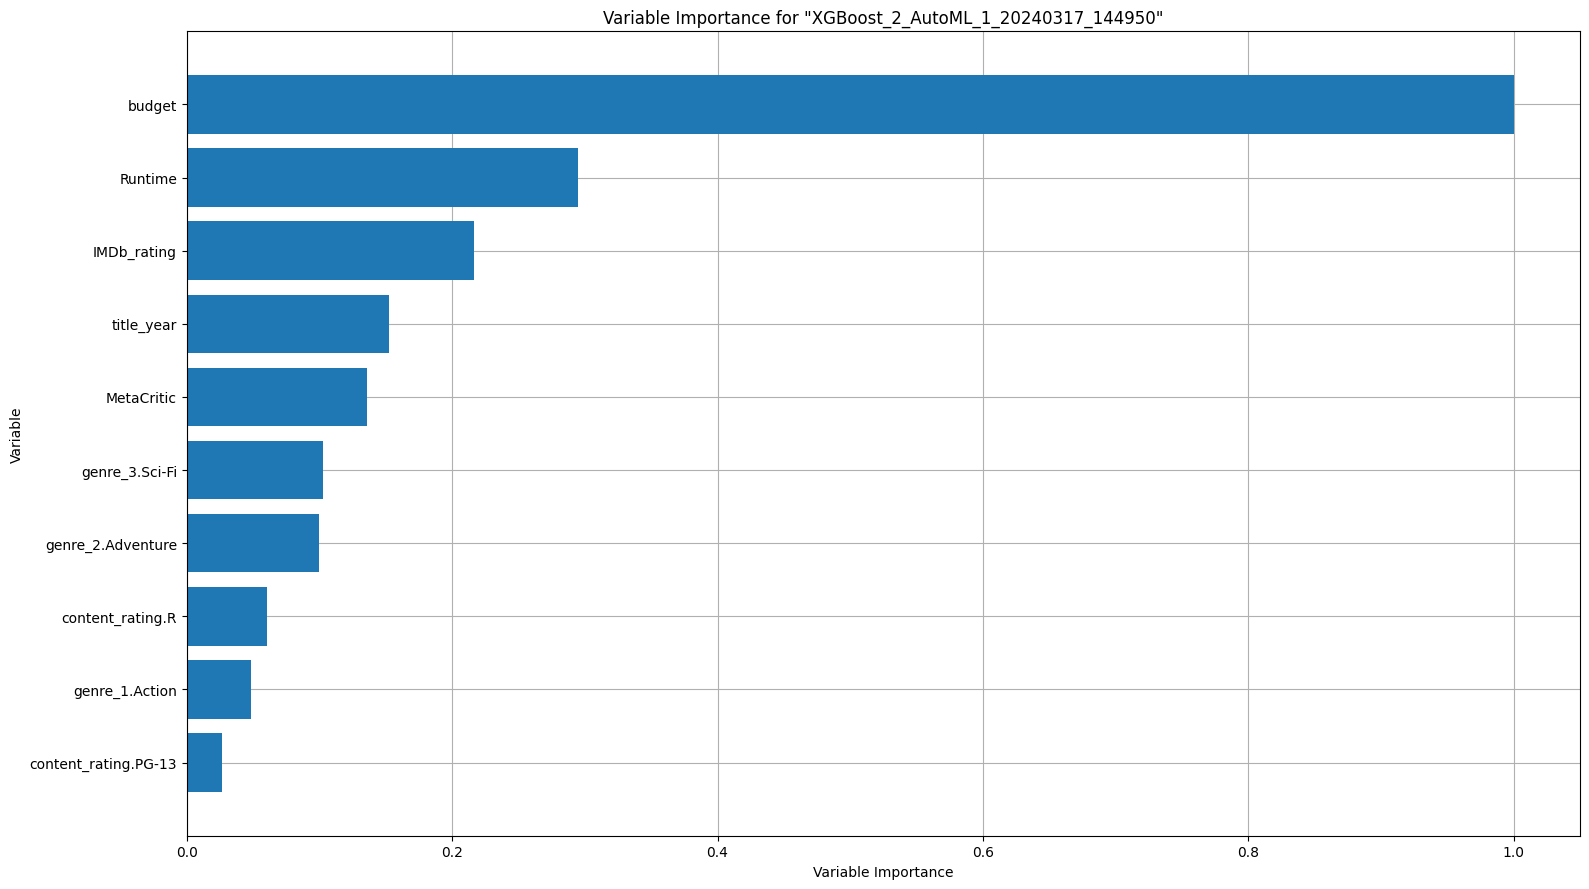

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

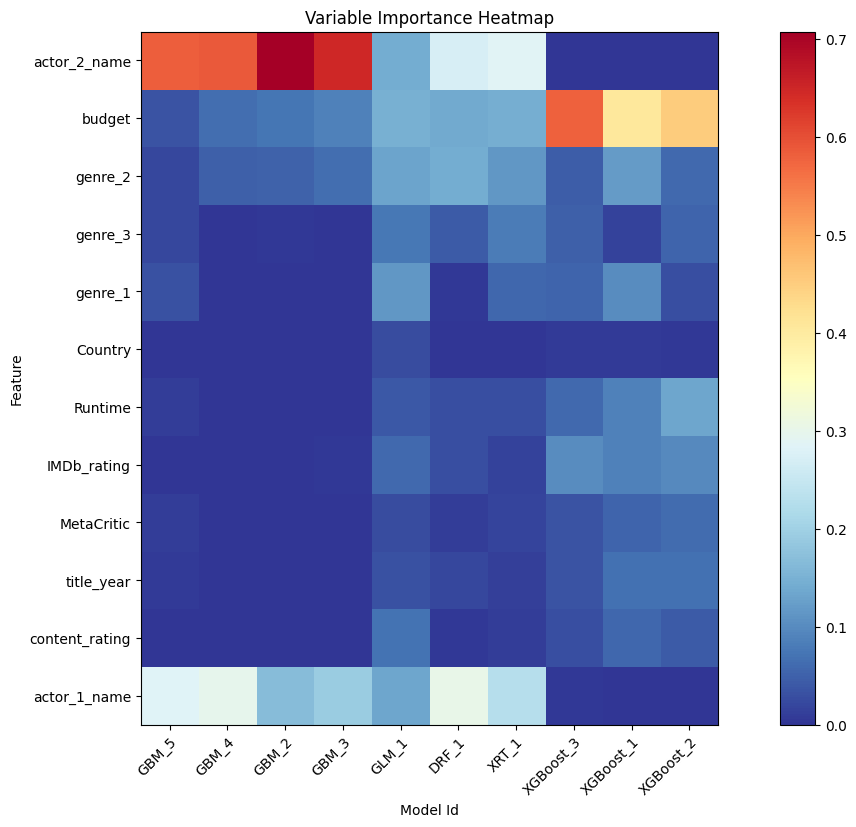

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

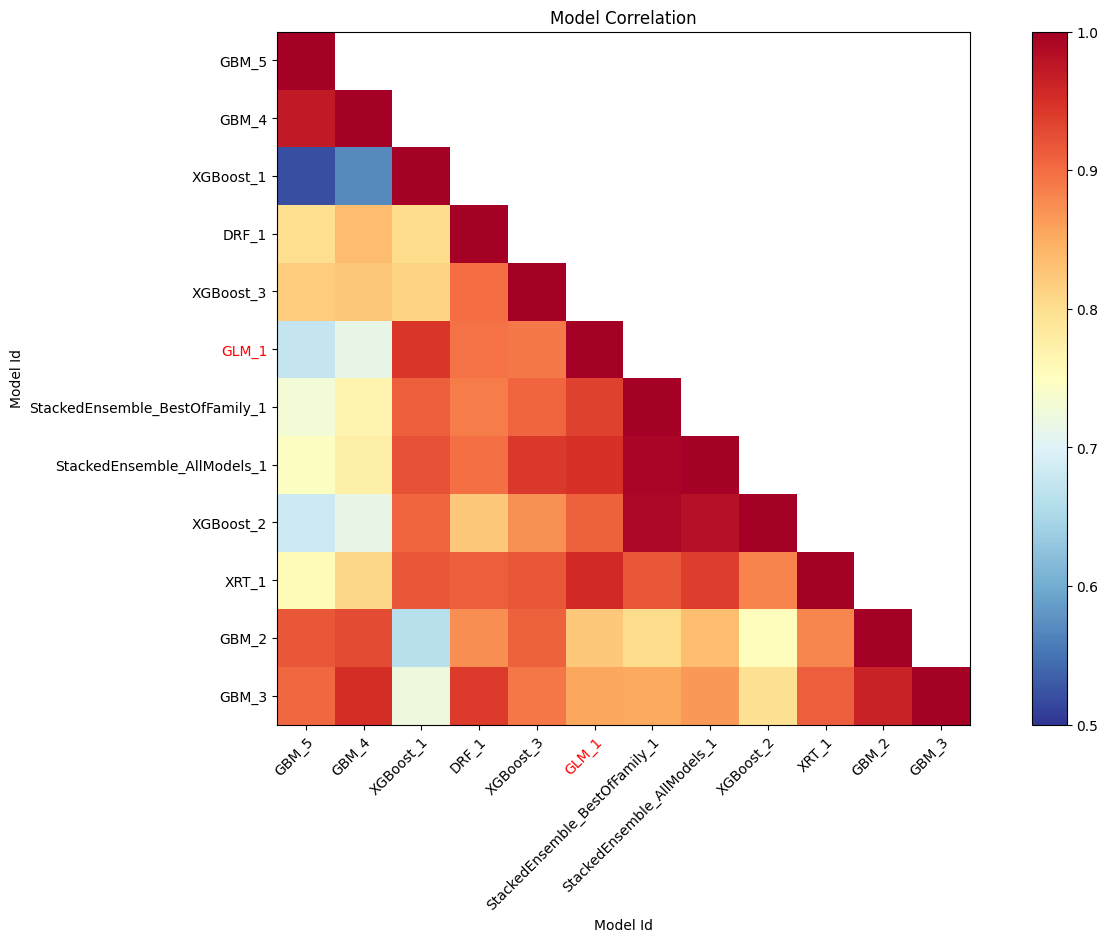

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

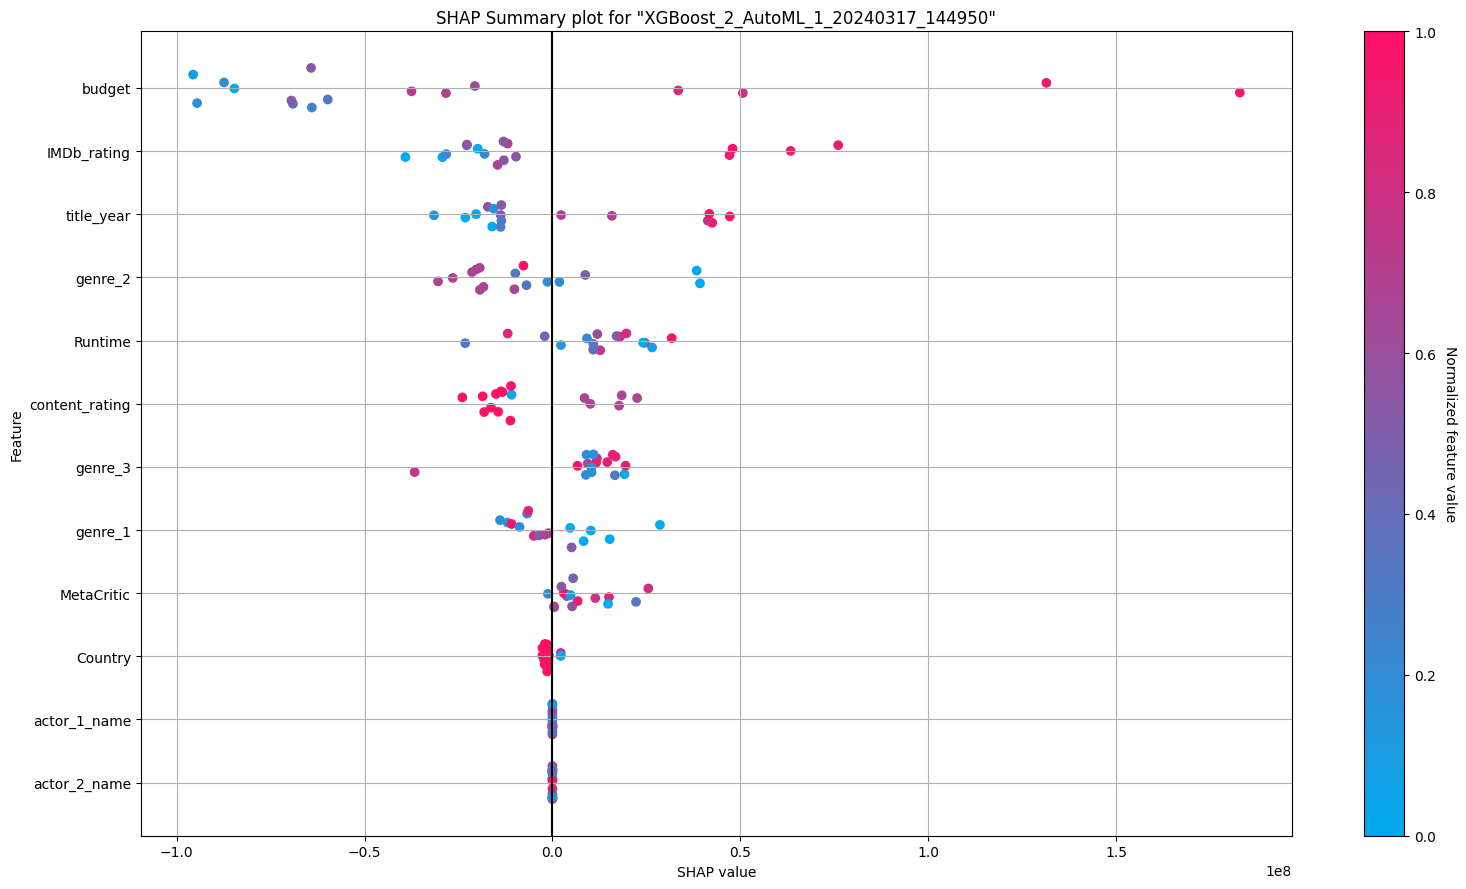

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

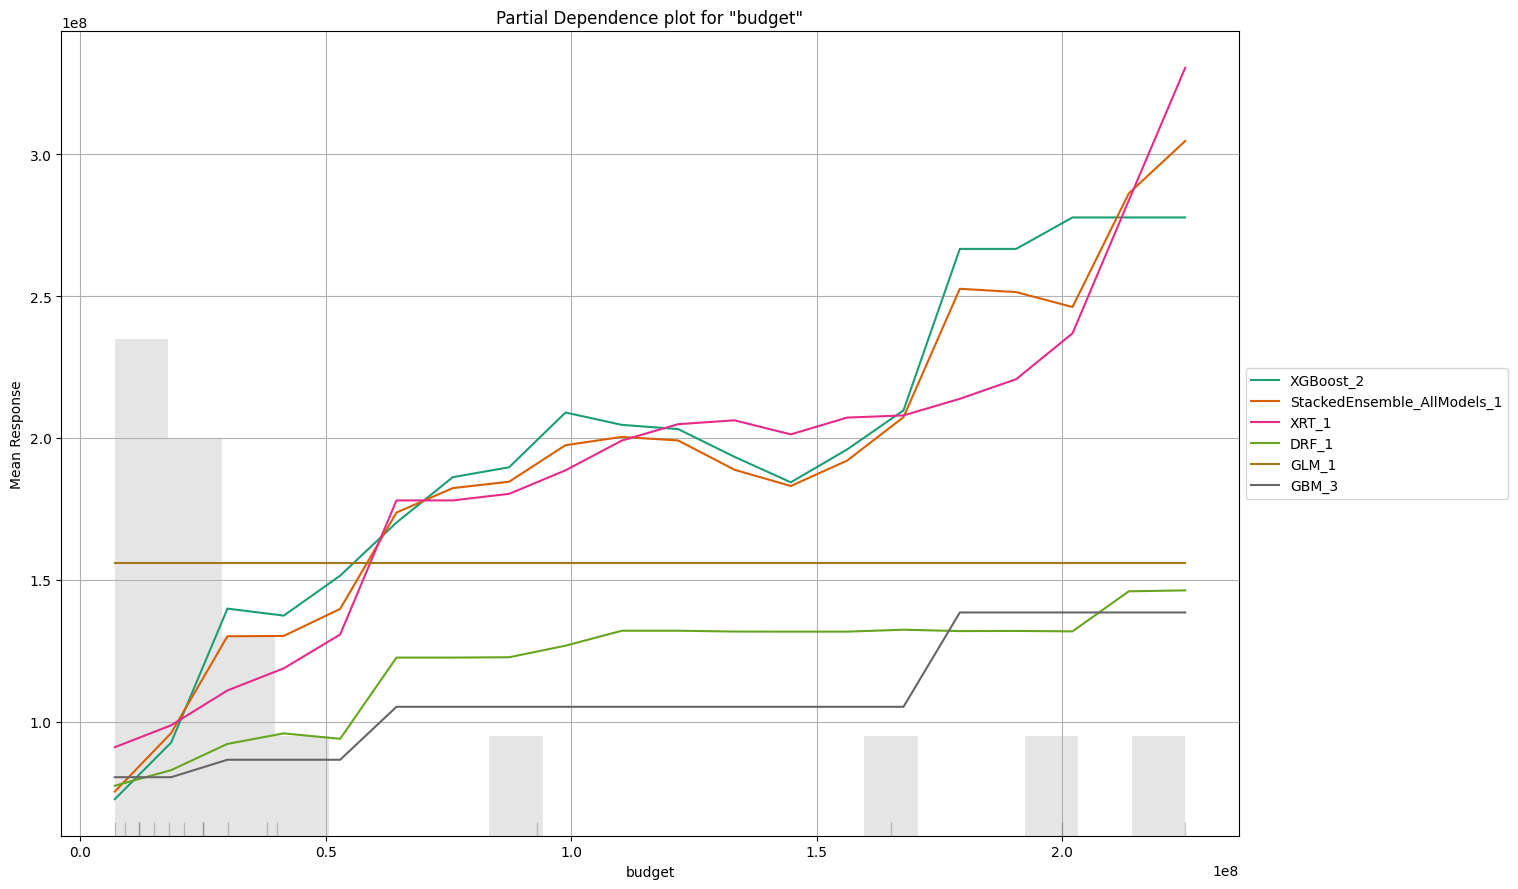

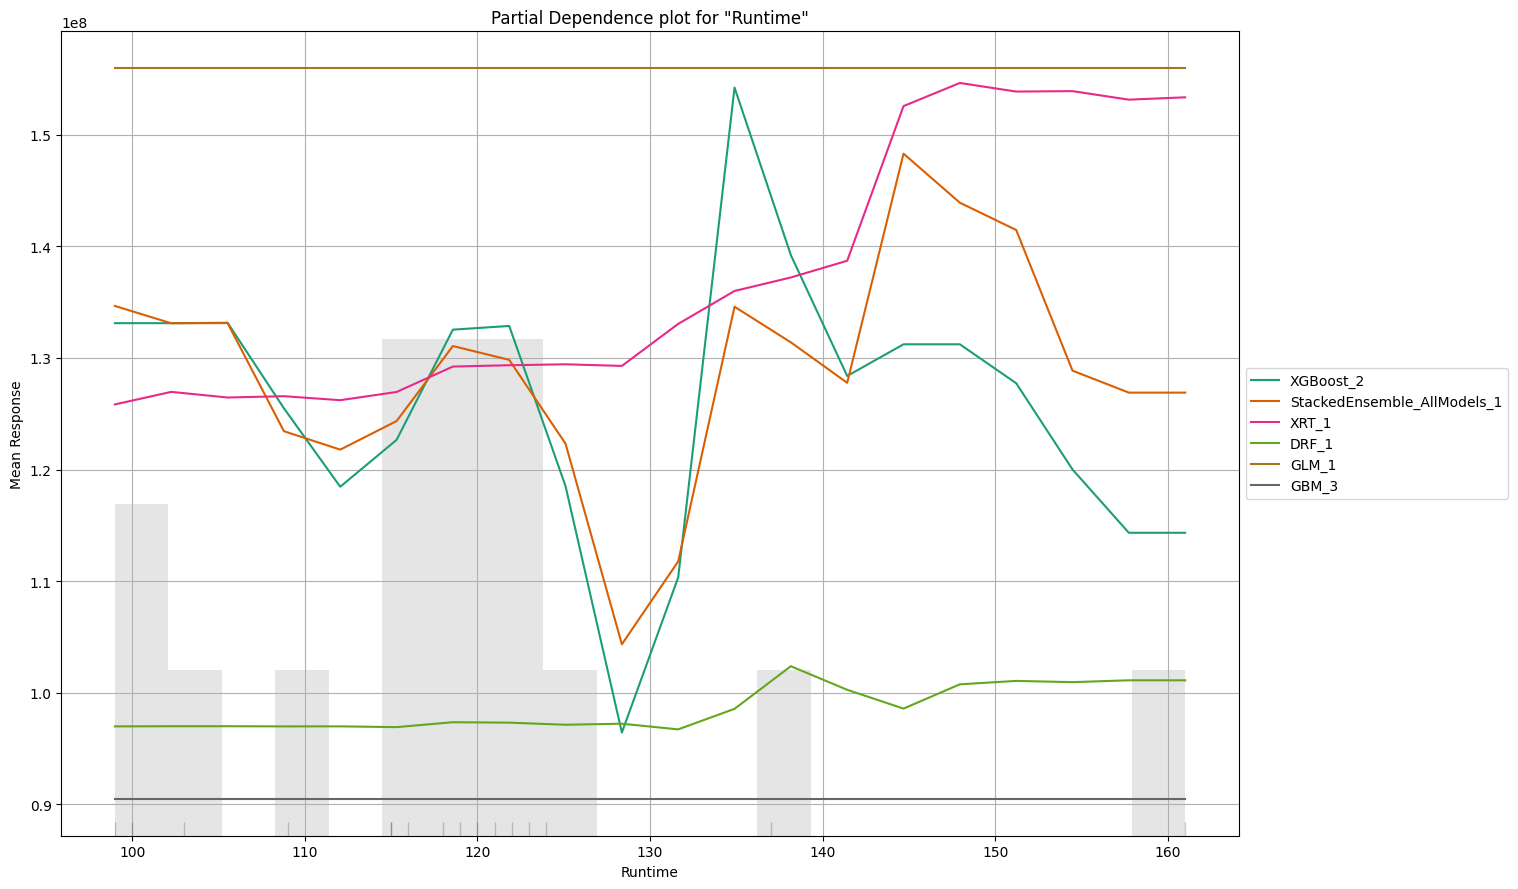

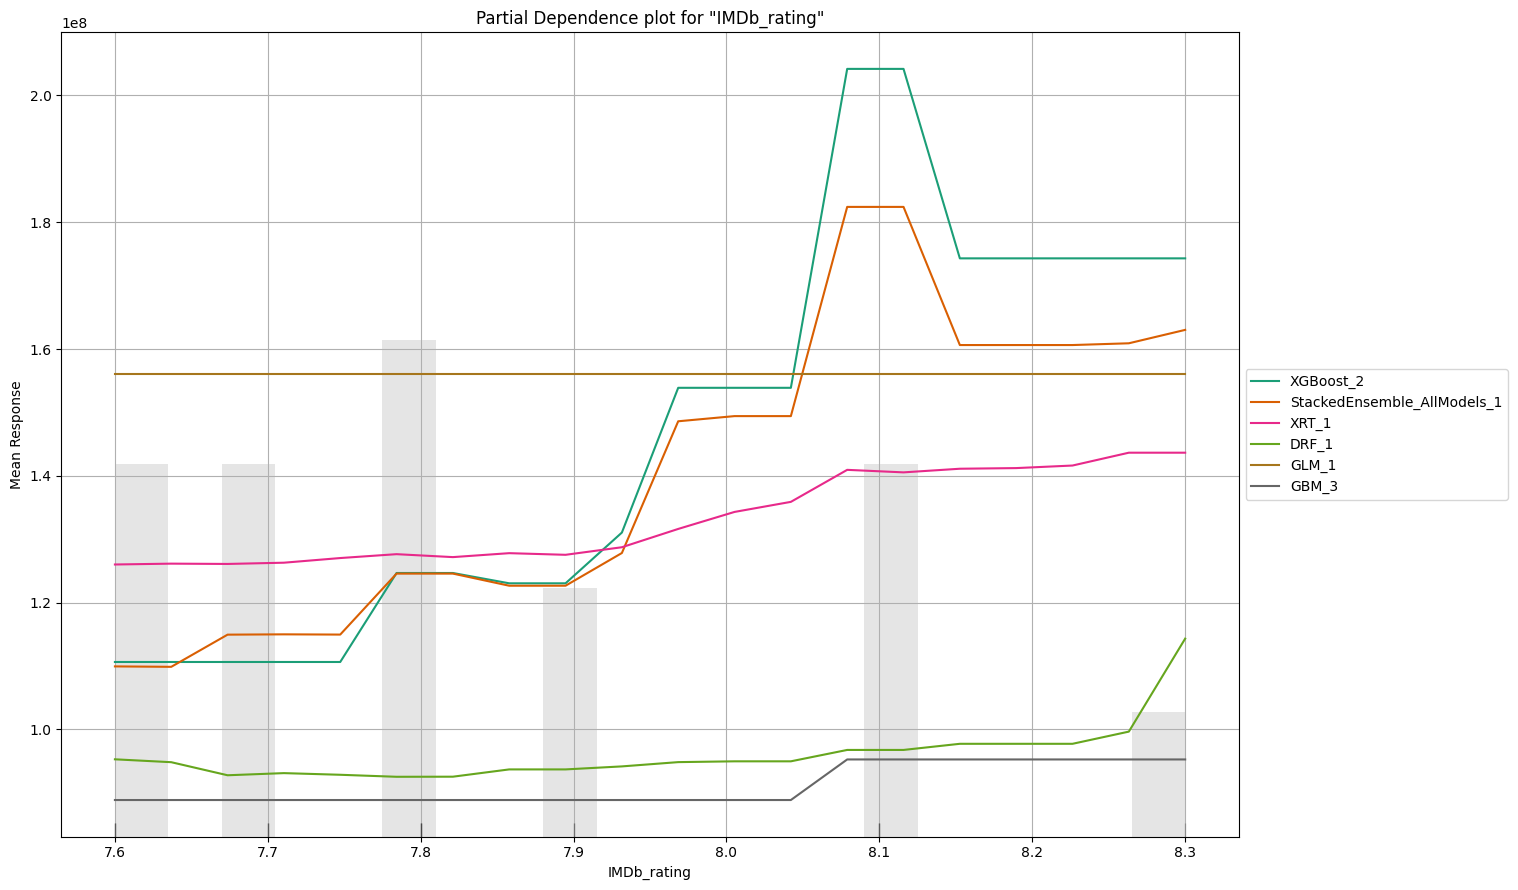

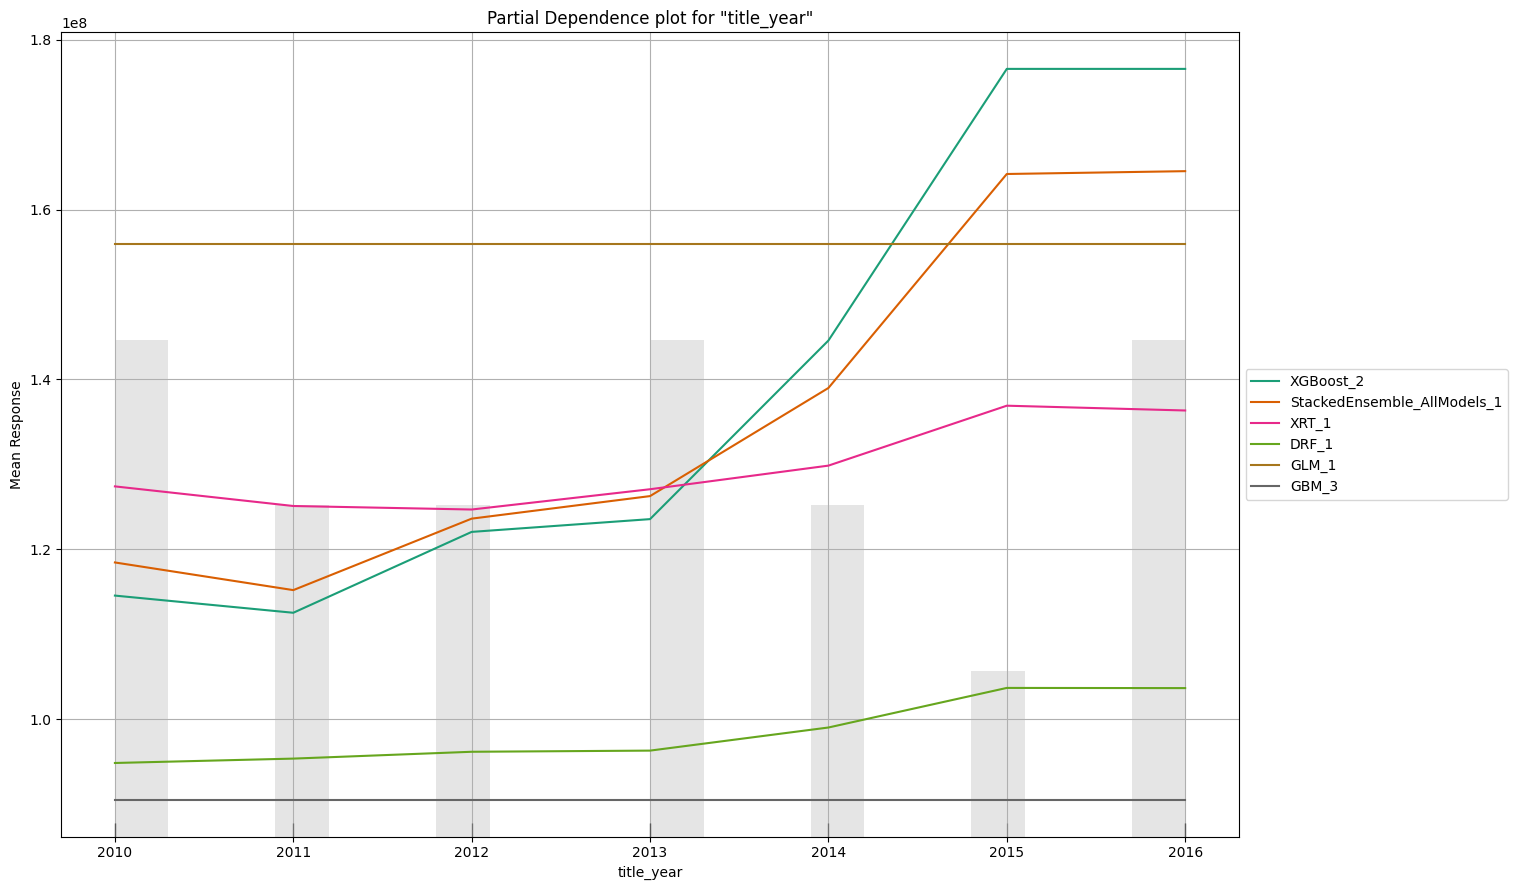

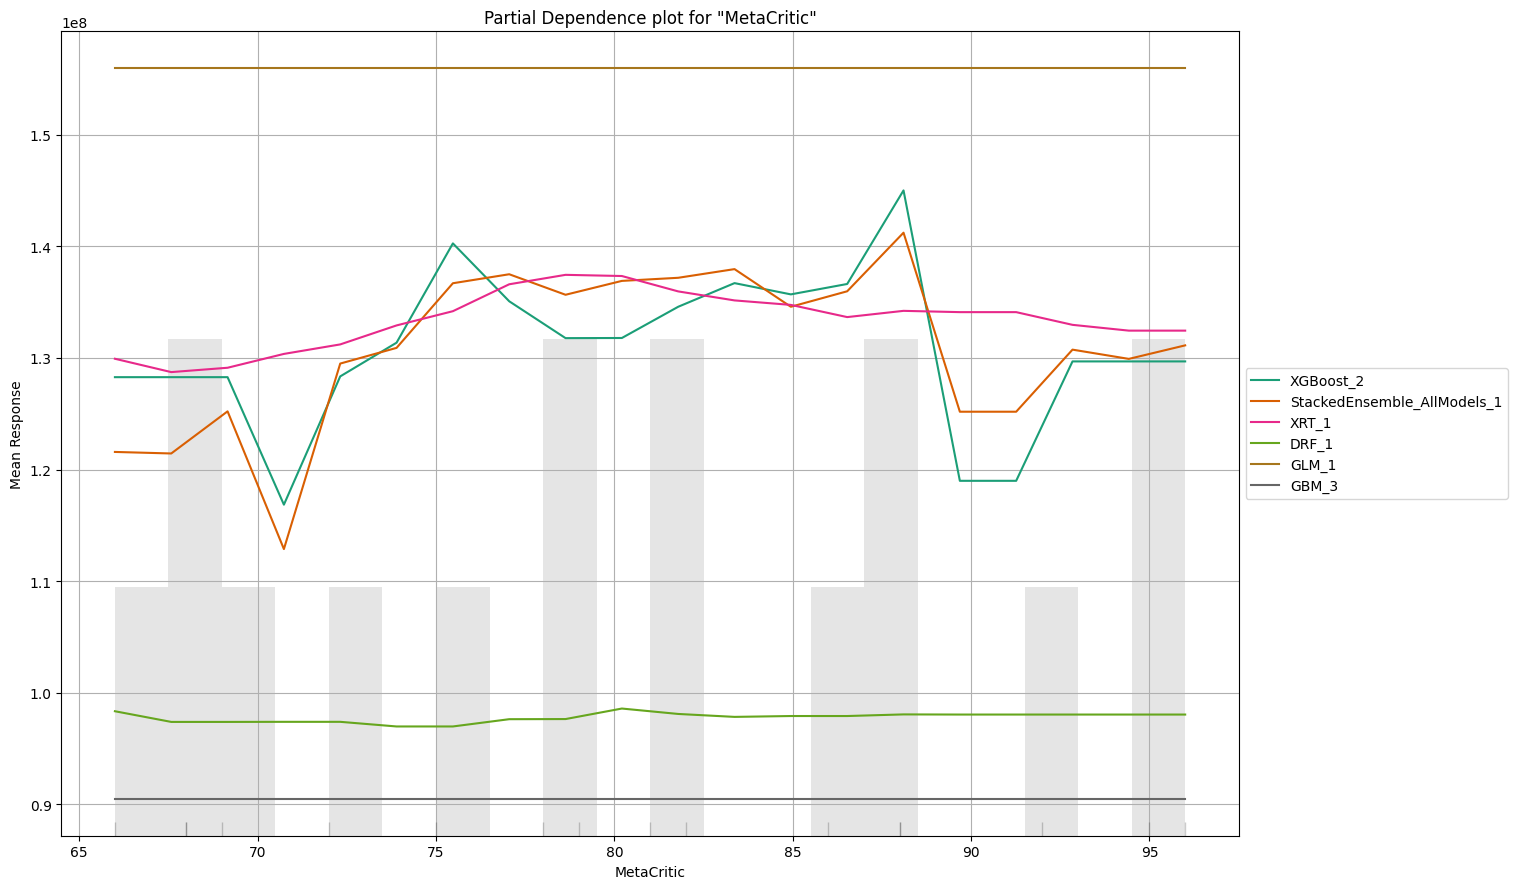

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

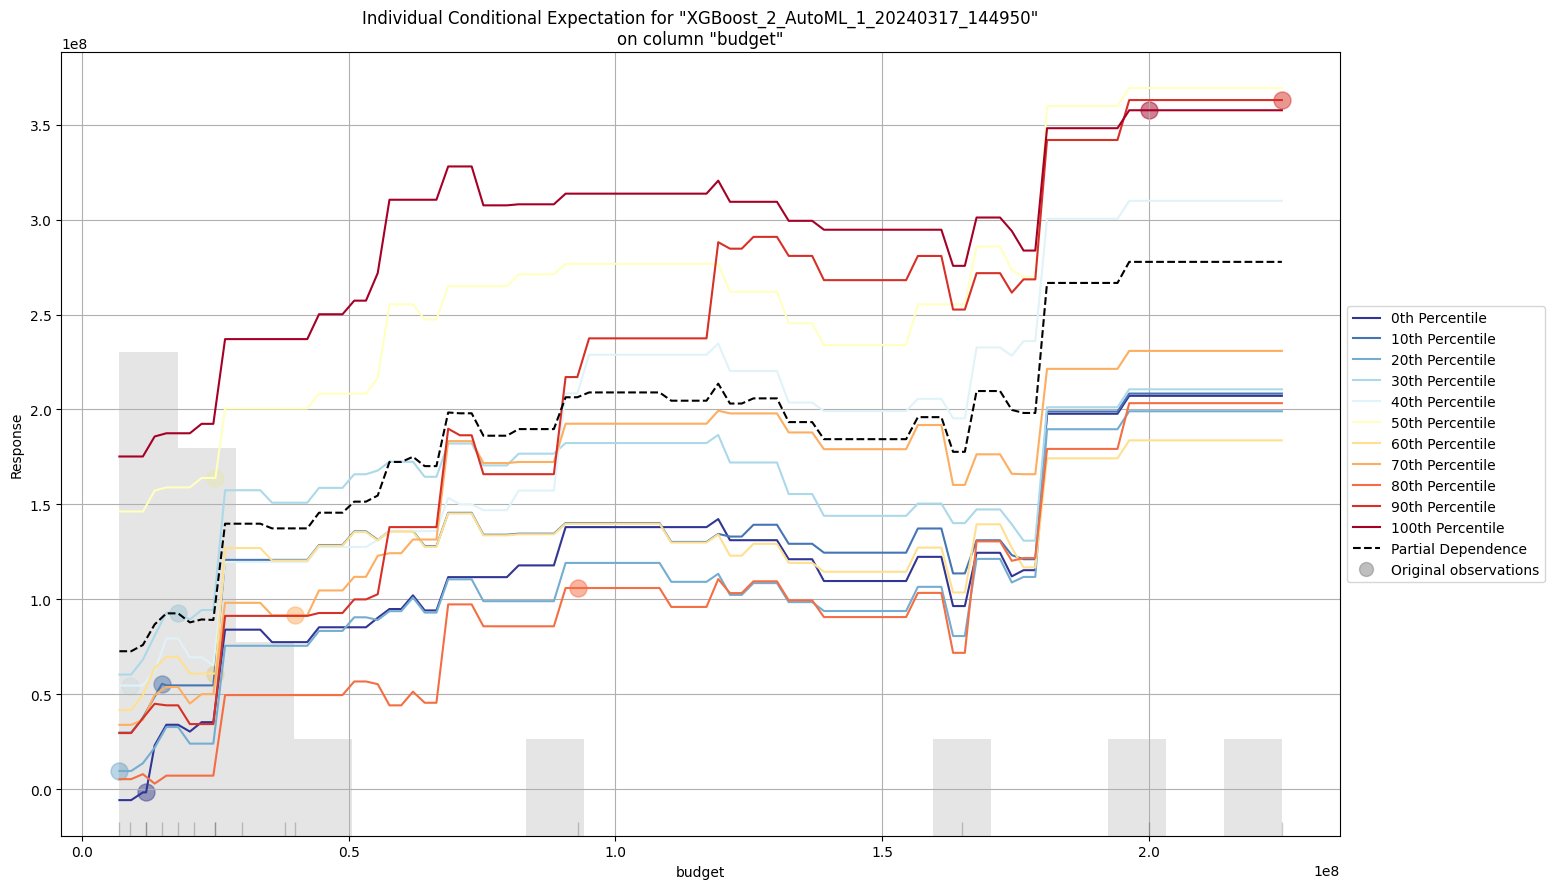

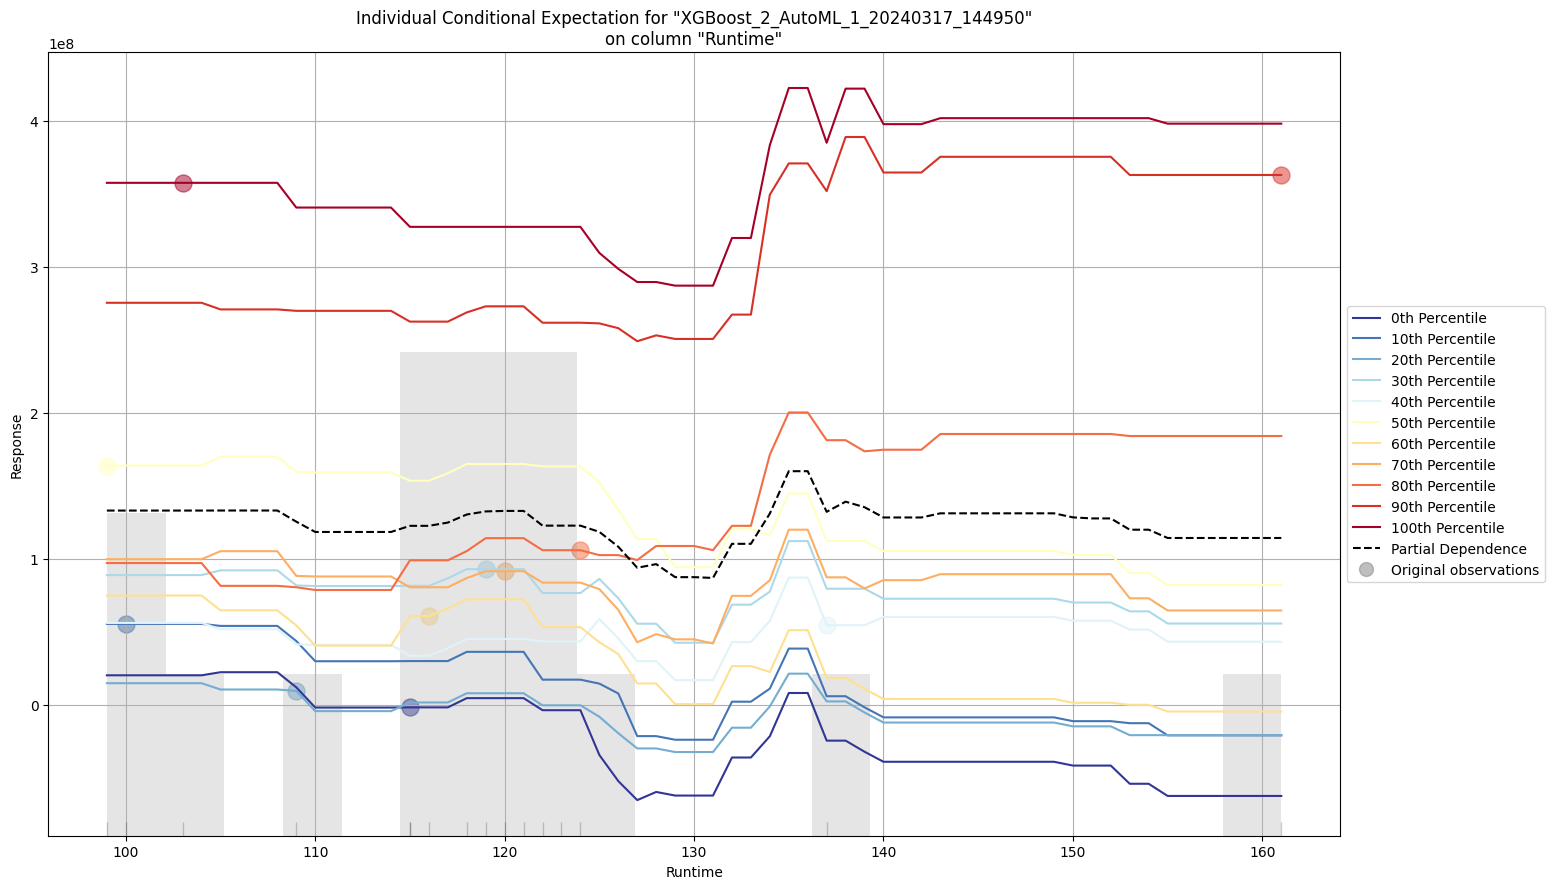

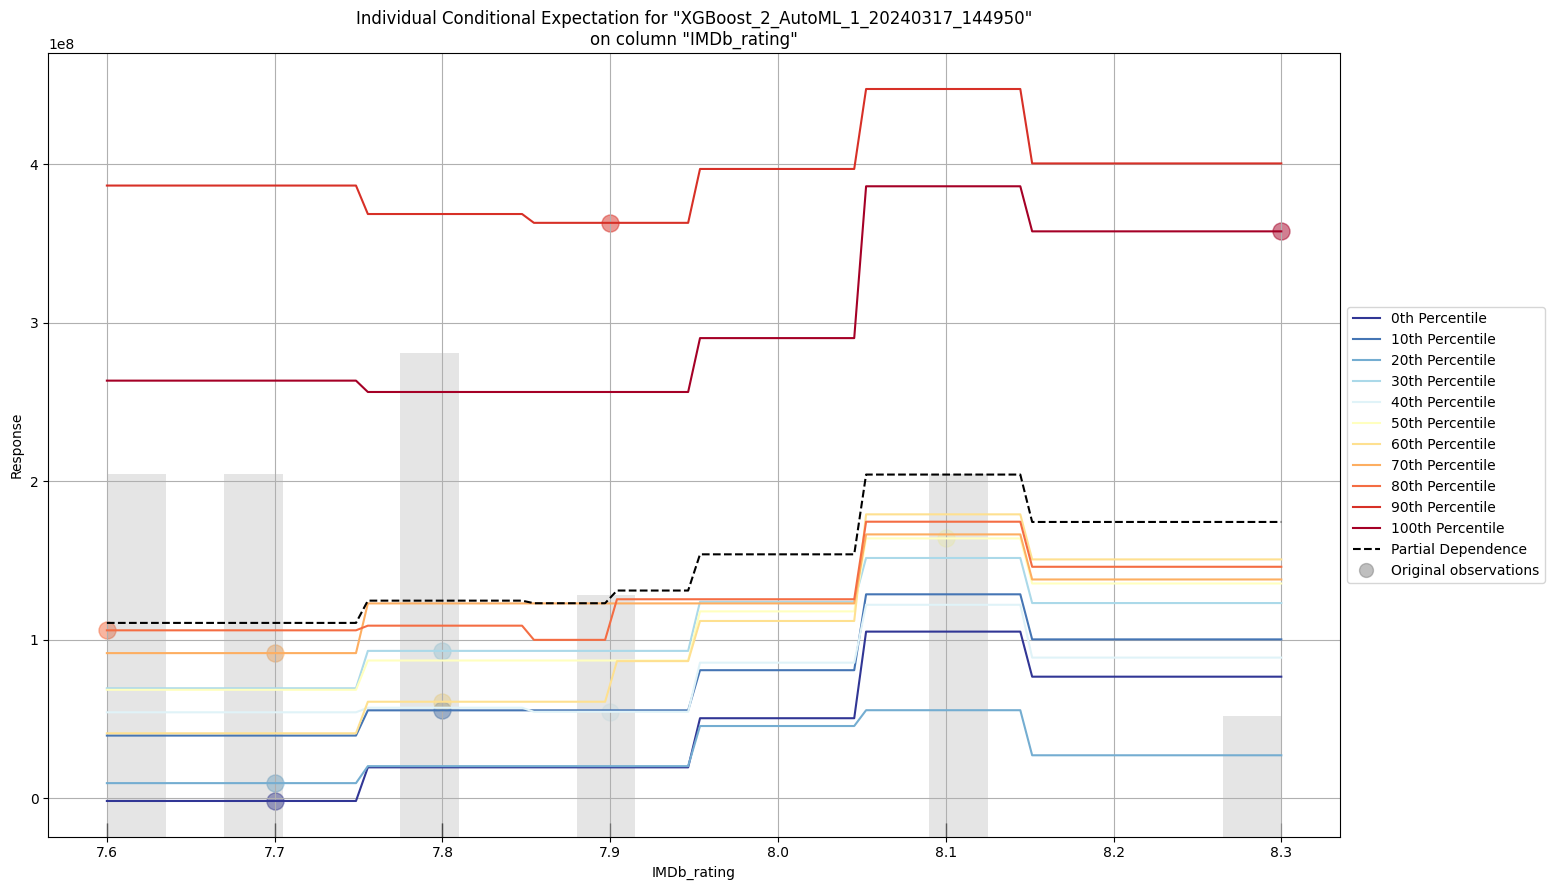

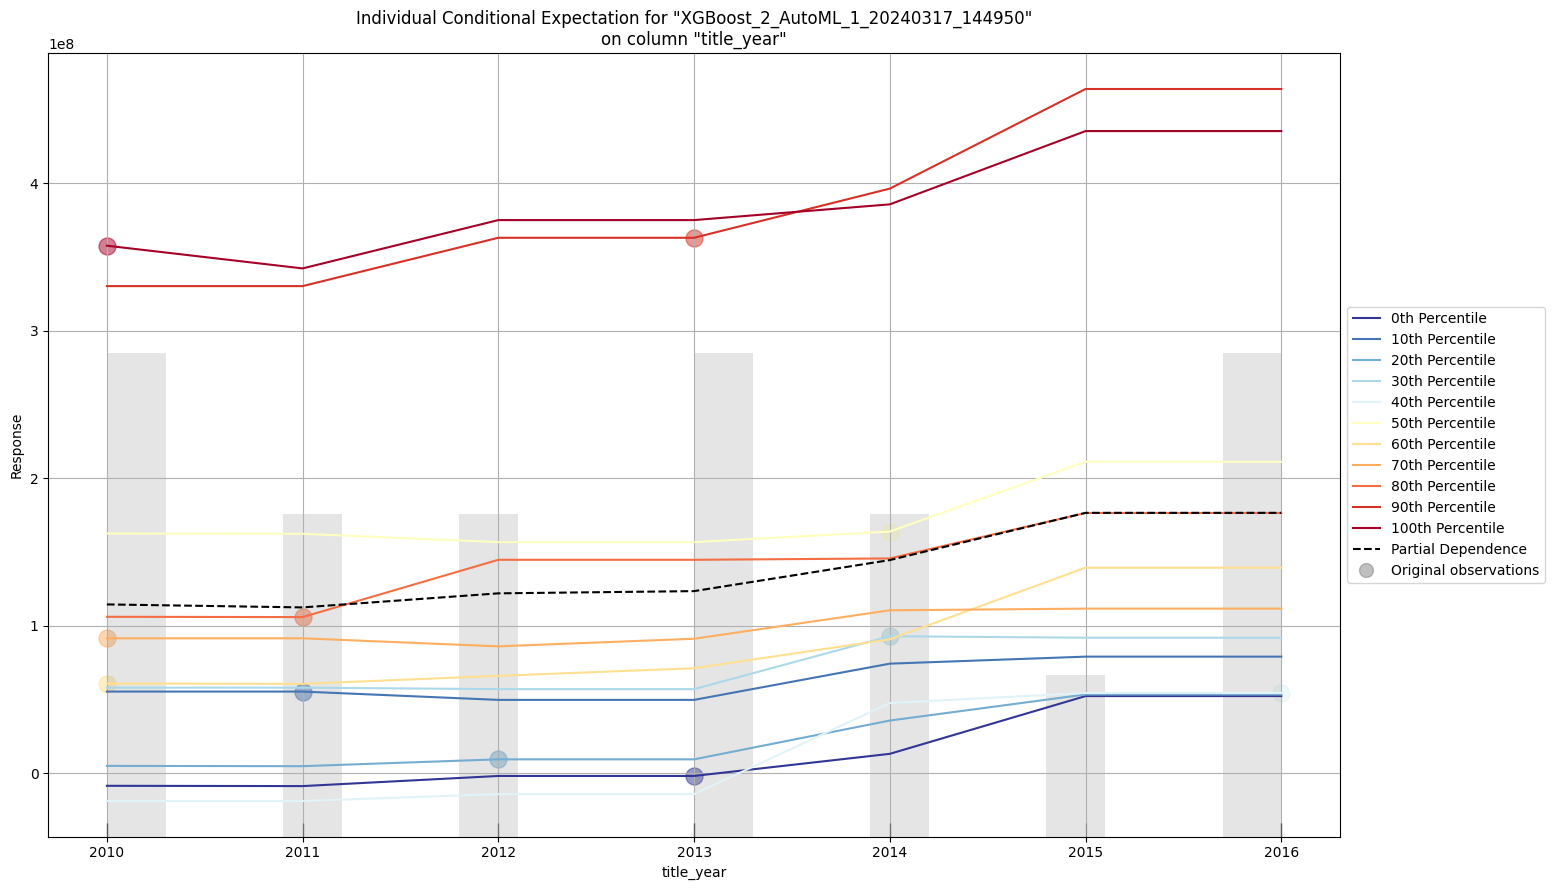

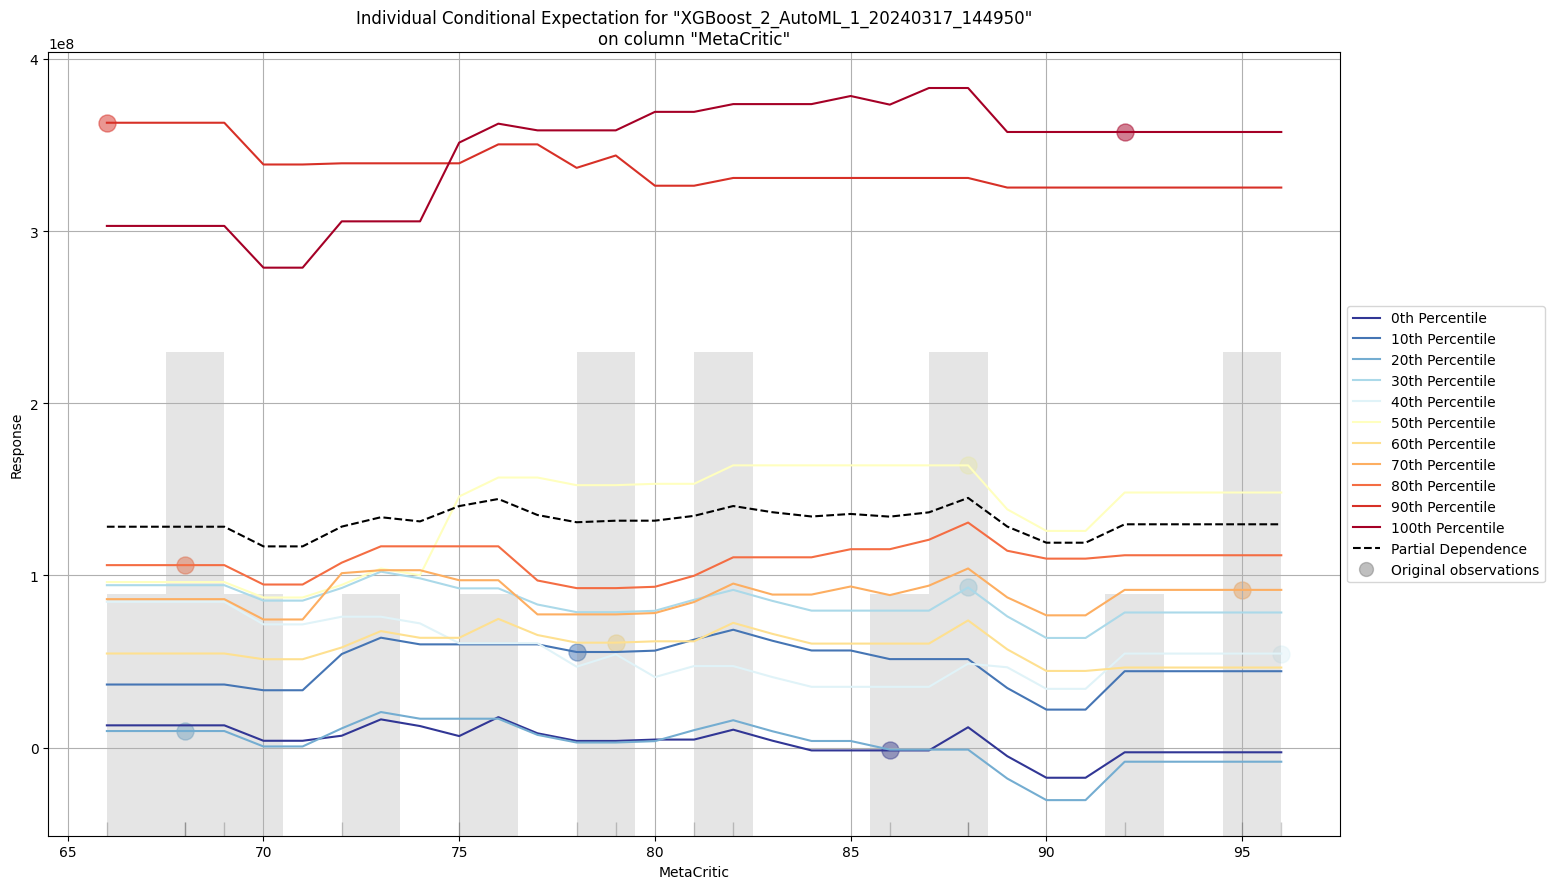

In [ ]:
aml.explain(test)

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

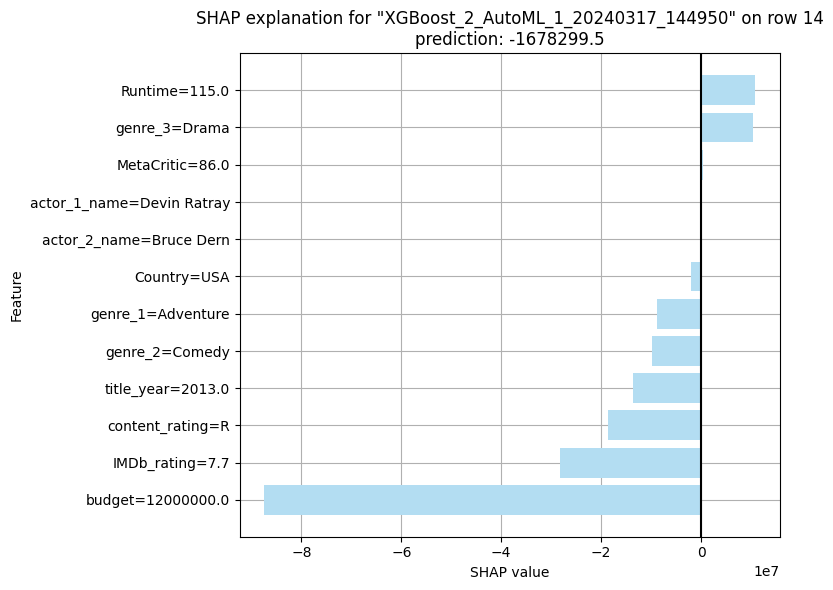

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

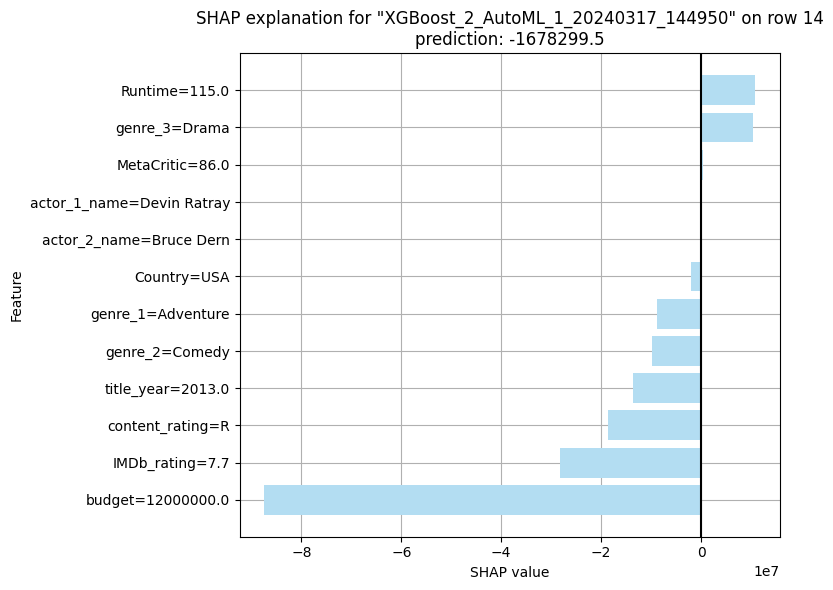

In [ ]:
aml.explain_row(frame = test, row_index = 14, figsize = (8,6), exclude_explanations = "leaderboard")


# SHAP Analysis for Linear Model


c:\Users\jaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


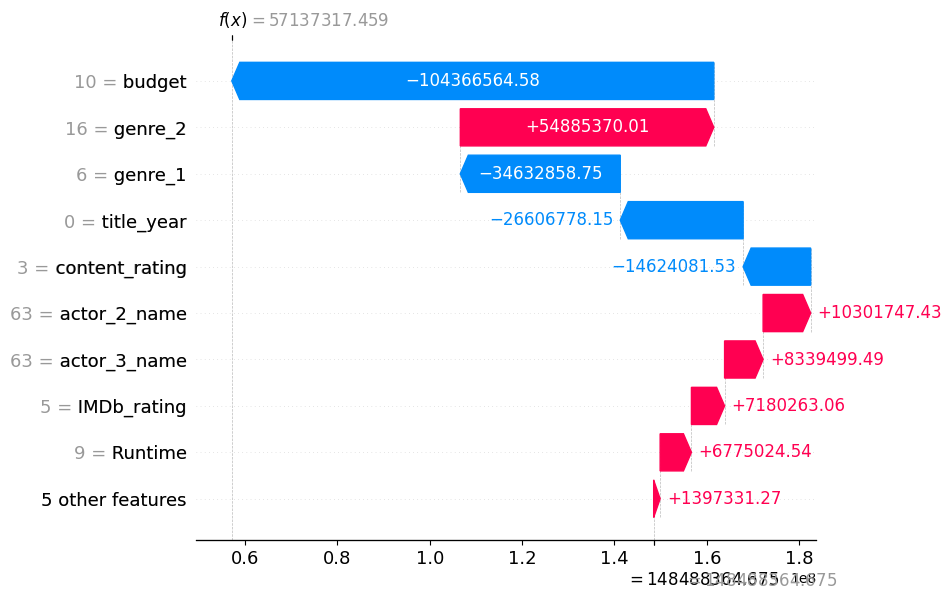

In [11]:

import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder

# Assuming X contains both numerical and categorical features
# Apply ordinal encoding to categorical variables
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Create a SHAP explainer for the trained model
explainer = shap.Explainer(linear_model, X_train)

# Compute SHAP values for a single sample (replace `sample_ind` with the index of the sample)
sample_ind = 0  # Example index, replace it with your desired sample index
shap_values = explainer.shap_values(X_test)

# Convert X_test to a pandas DataFrame if it's a NumPy array
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Create an Explanation object
explanation = shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test_df.iloc[sample_ind])

# Plot the waterfall plot for the sample
shap.waterfall_plot(explanation)


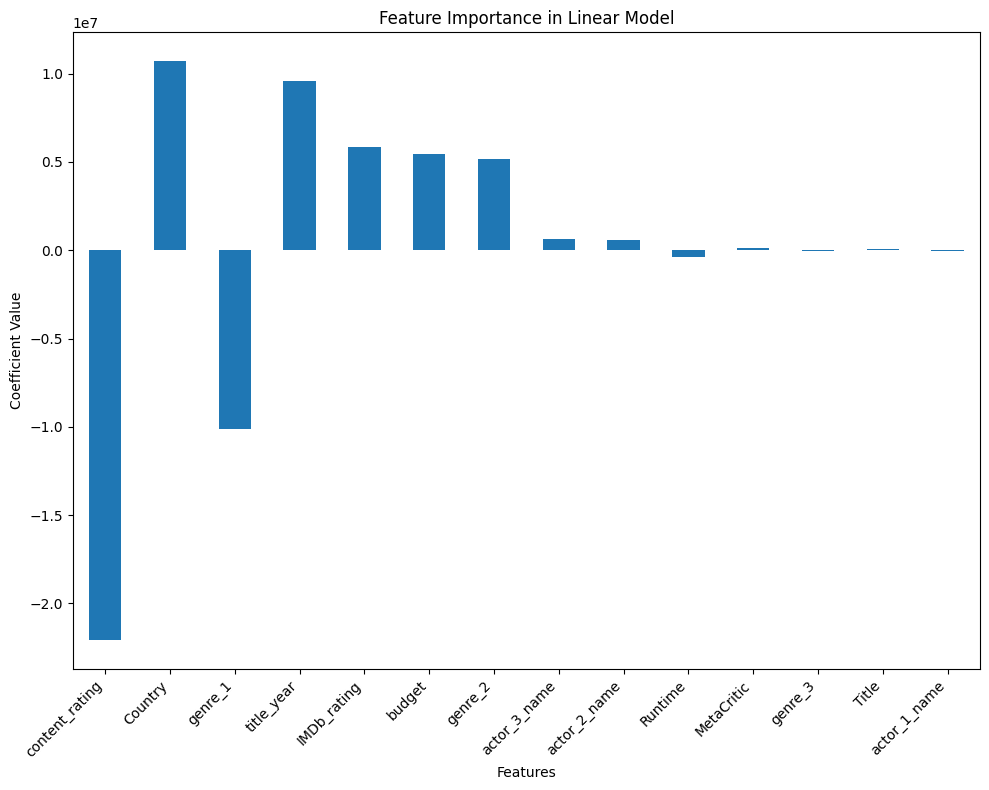

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder


encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Convert X_encoded to a DataFrame with column names
X_encoded_df = pd.DataFrame(X_encoded, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get the coefficients from the model
coefficients = linear_model.coef_

# Create a series to store coefficients along with feature names for easier plotting
feature_importance = pd.Series(data=coefficients[0], index=X_train.columns).sort_values(key=abs, ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance in Linear Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.show()


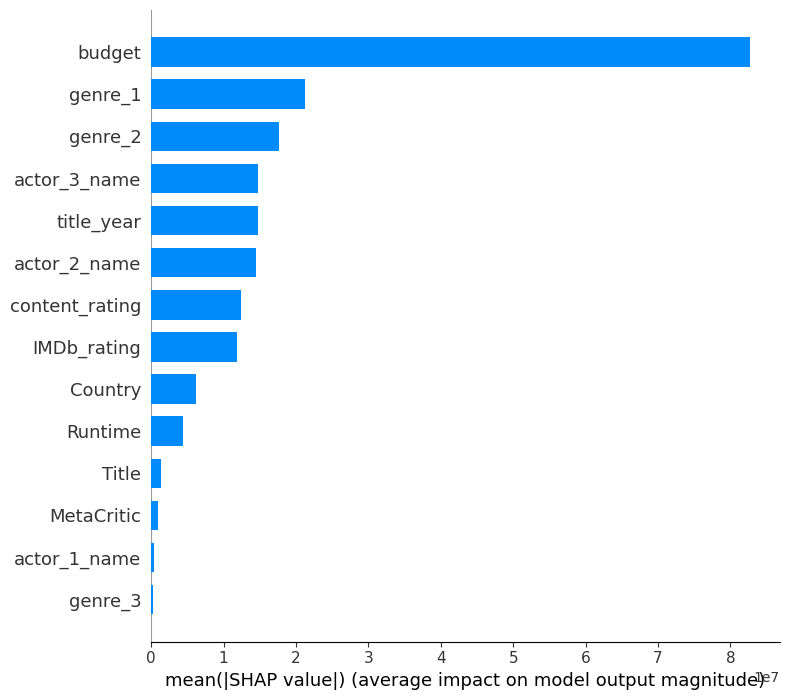

In [13]:
# SHAP variable importance for a Linear Model
X_train_df = pd.DataFrame(X_train, columns=X.columns)

explainer = shap.Explainer(linear_model.predict, X_train)

# Compute SHAP values for the linear model
linear_shap_values = explainer.shap_values(X_train)

shap.summary_plot(linear_shap_values, X_train_df, plot_type="bar")

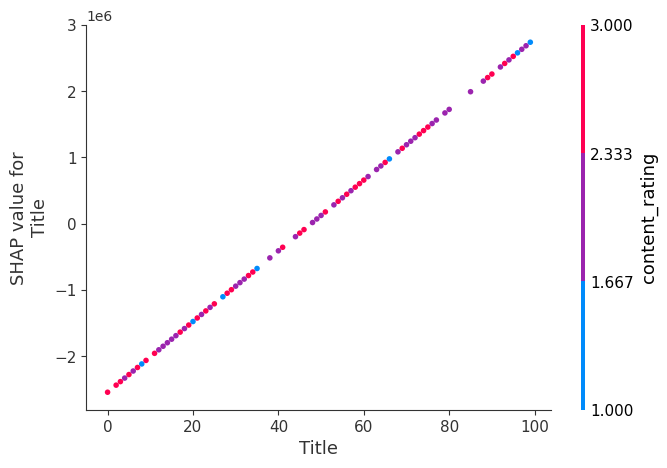

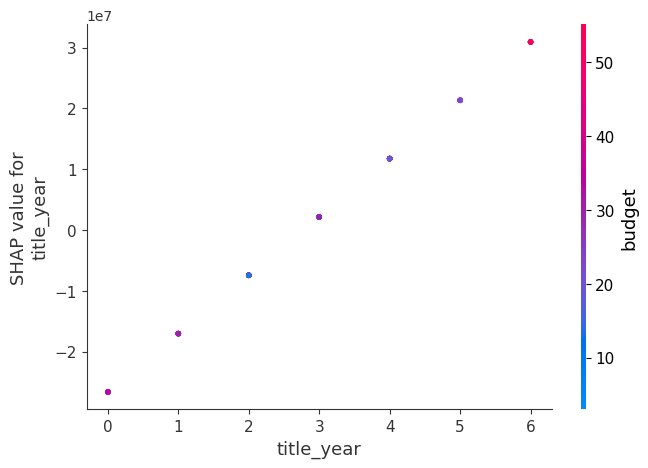

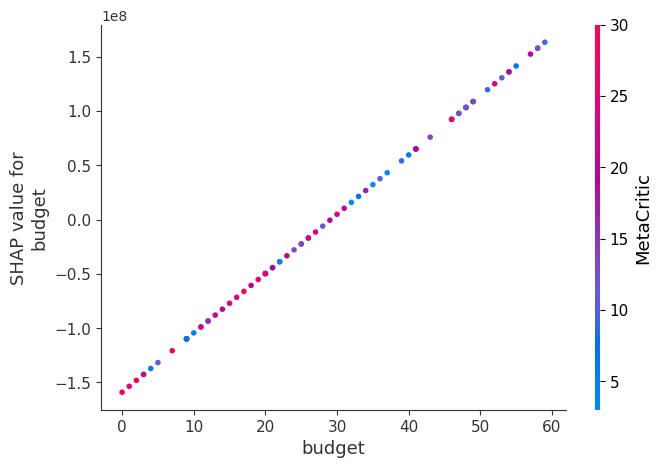

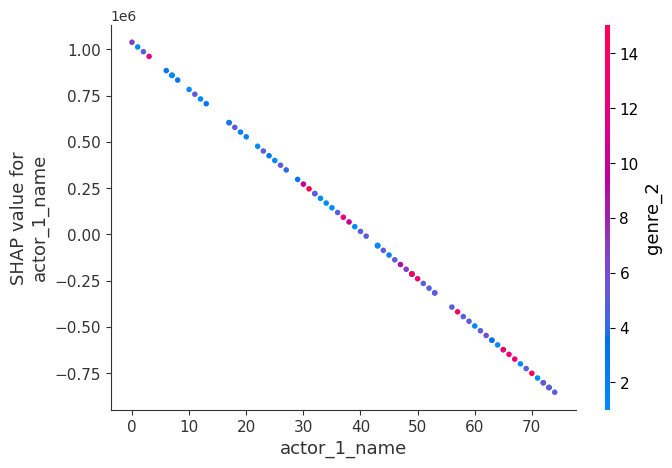

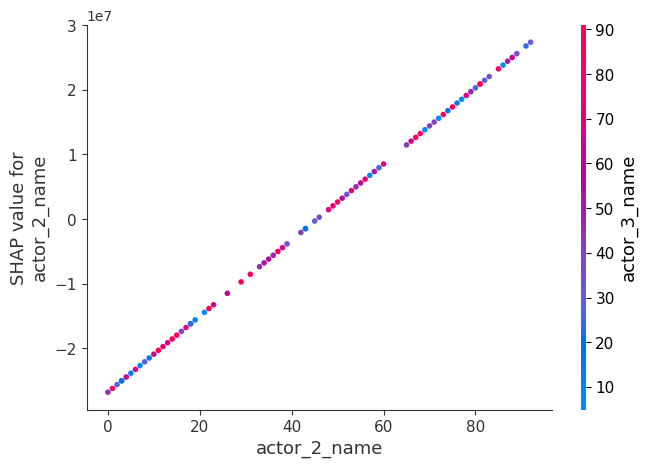

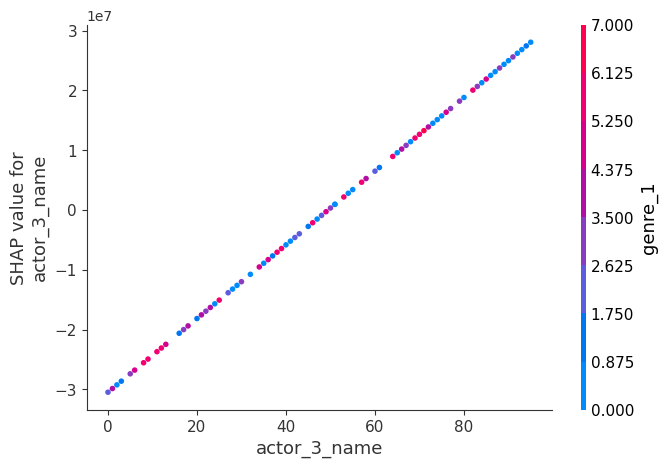

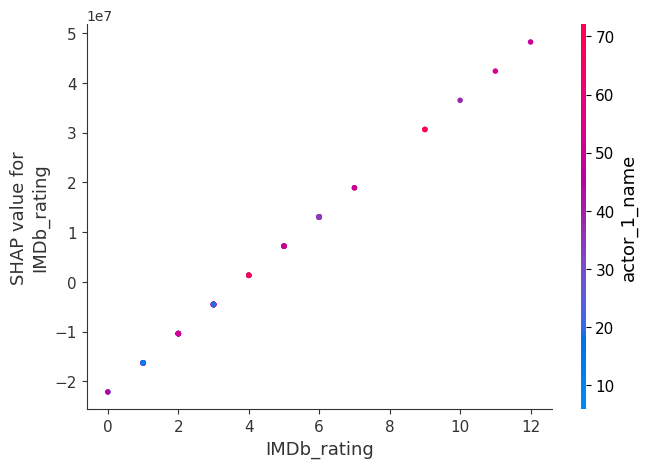

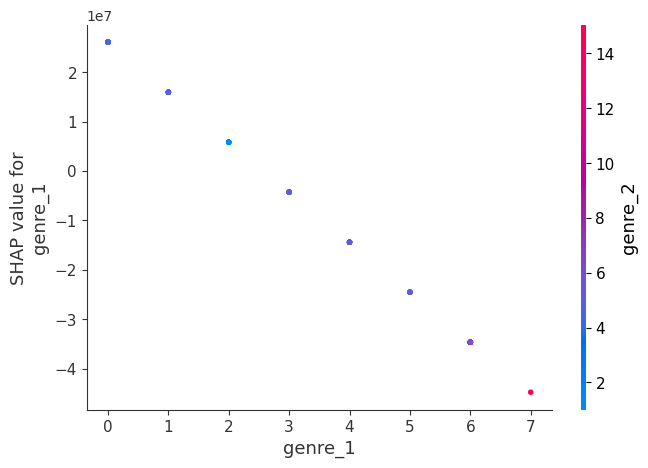

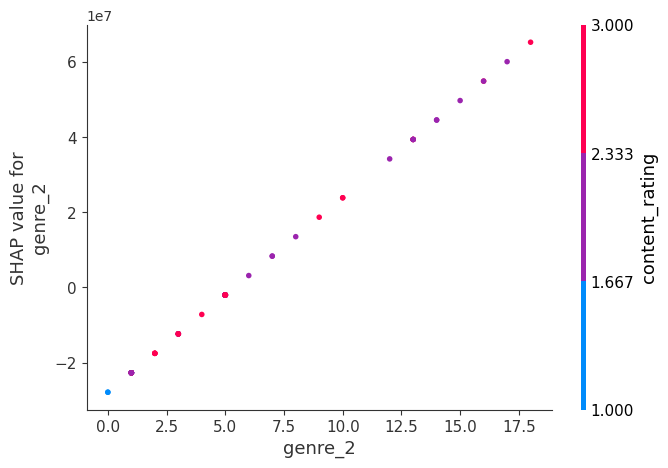

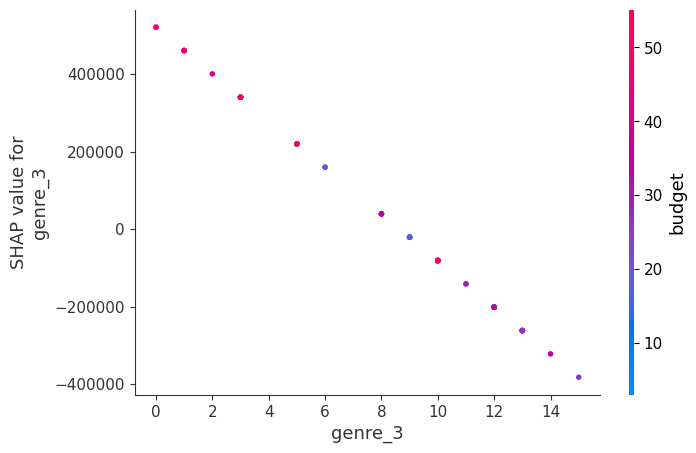

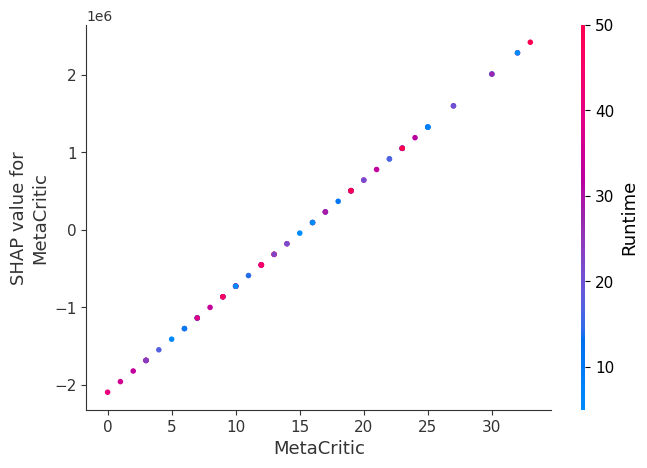

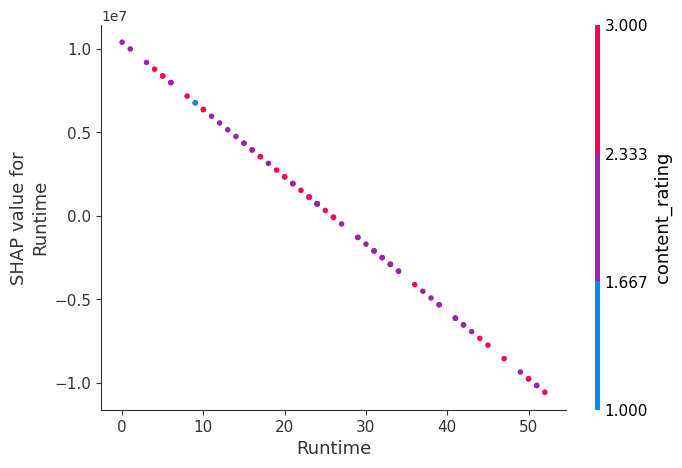

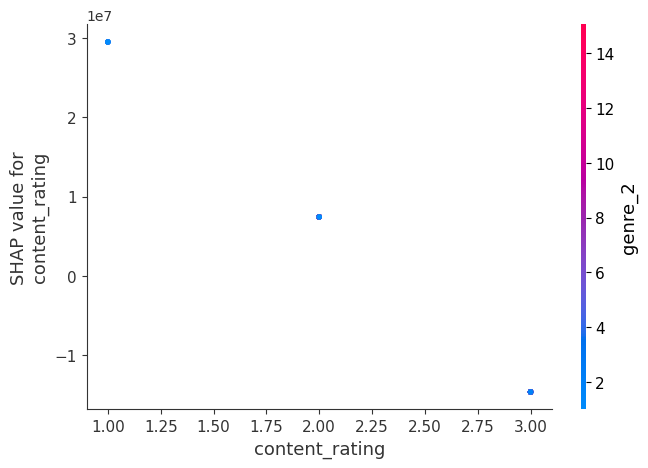

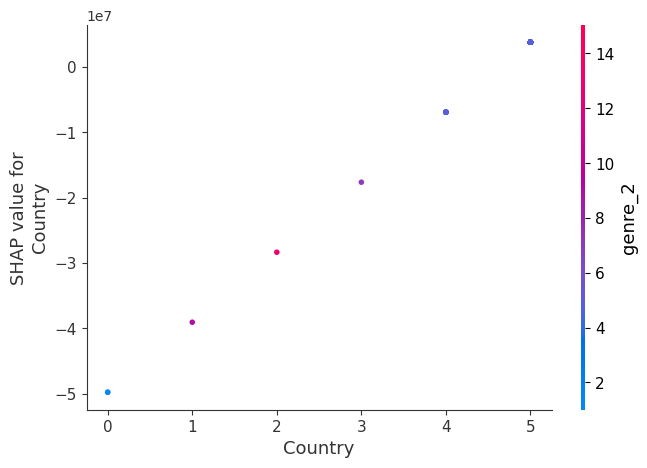

In [14]:
# SHAP partial dependence plot for linear model
for feature_name in X_train_df.columns:
    shap.dependence_plot(feature_name, linear_shap_values, X_train_df)


# Shap Analysis on Tree-based model

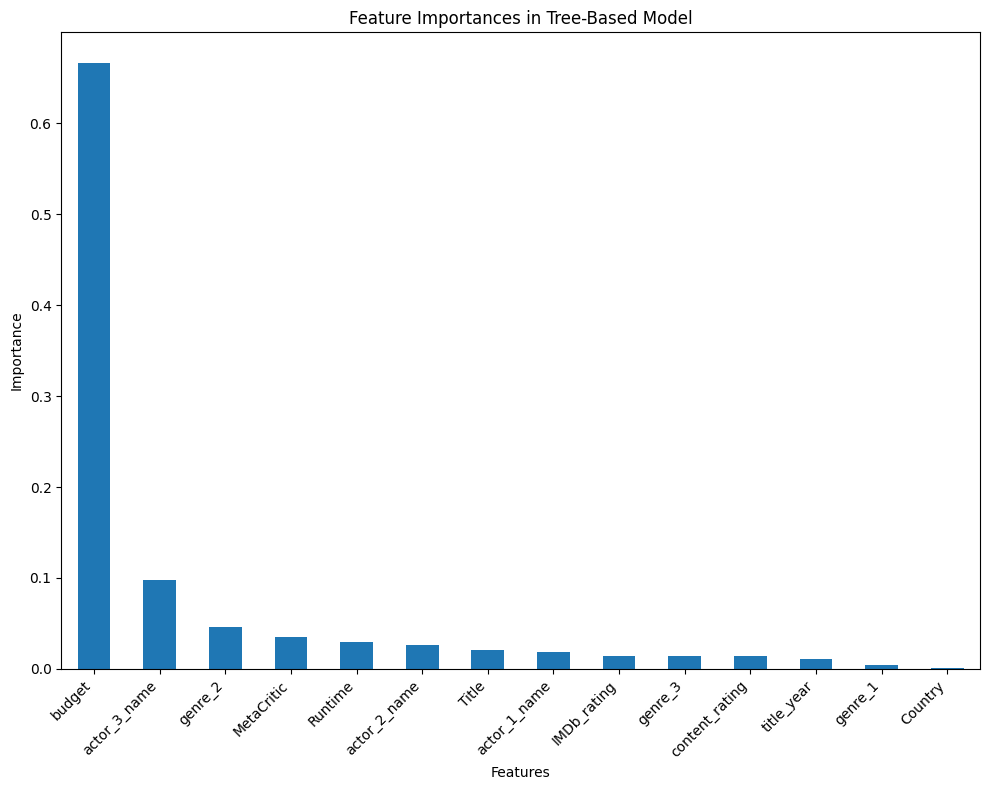

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Convert X_encoded to a DataFrame with column names
X_encoded_df = pd.DataFrame(X_encoded, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# Train a tree-based model (using Random Forest here as an example)
tree_model = RandomForestRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = tree_model.feature_importances_

# Create a series for easier plotting
features = pd.Series(feature_importances, index=X_encoded_df.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
features.plot(kind='bar')
plt.title('Feature Importances in Tree-Based Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.show()


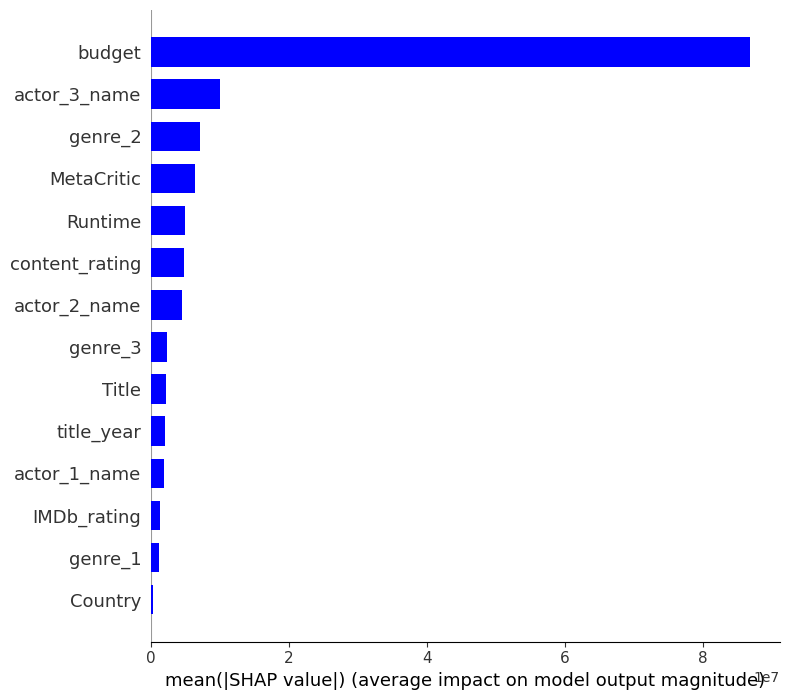

In [30]:
import shap

# and you have X_train as your training data

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(tree_model)

# Compute SHAP values for the training data
tree_shap_values = explainer.shap_values(X_train)

# Plot the summary plot for SHAP variable importance
shap.summary_plot(tree_shap_values, X_train, plot_type="bar", color="blue")


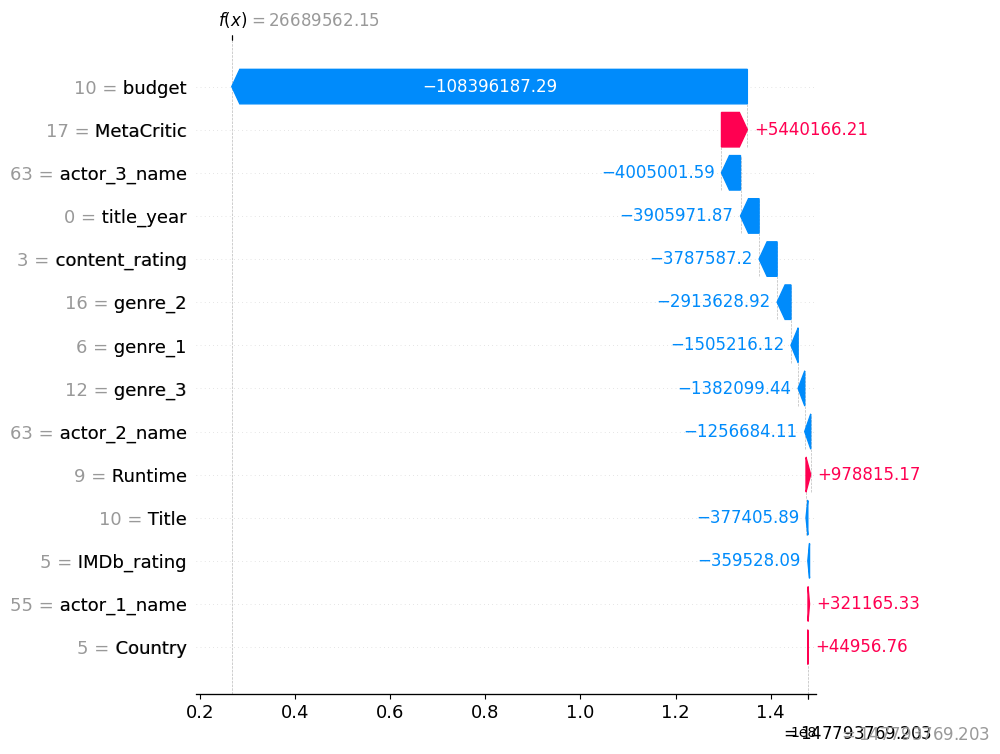

In [31]:
import shap

# Create a SHAP explainer for the trained model
explainer = shap.TreeExplainer(tree_model)

# Convert X_test to a pandas DataFrame if it's a NumPy array
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Compute SHAP values for a single sample (replace `sample_ind` with the index of the sample)
sample_ind = 0  # Example index, replace it with your desired sample index
shap_values = explainer.shap_values(X_test_df.iloc[sample_ind])

# Create an Explanation object
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test_df.iloc[sample_ind])

# Plot the waterfall plot for the sample
shap.plots.waterfall(explanation, max_display=14)


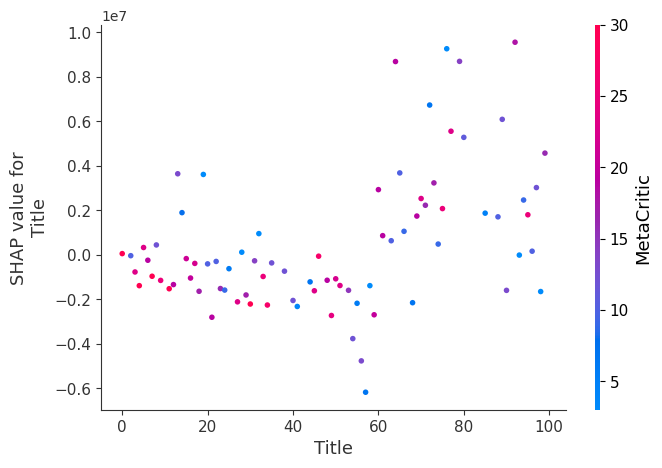

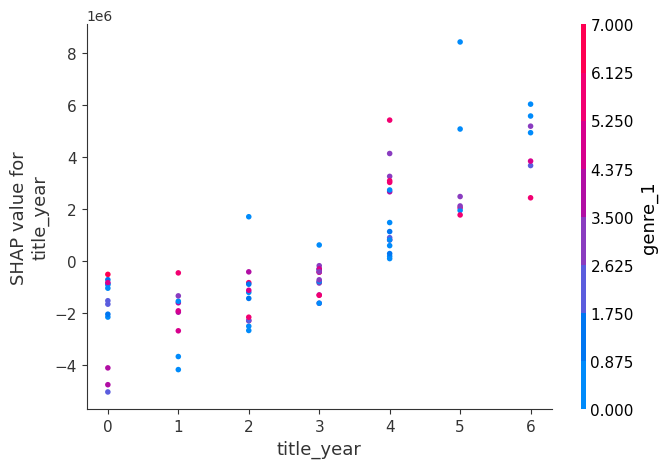

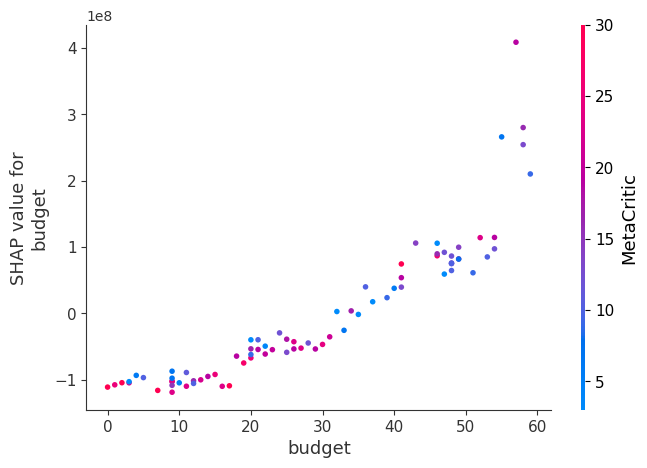

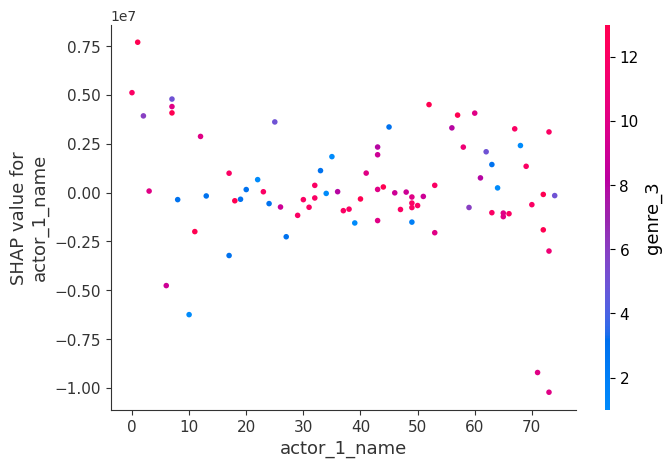

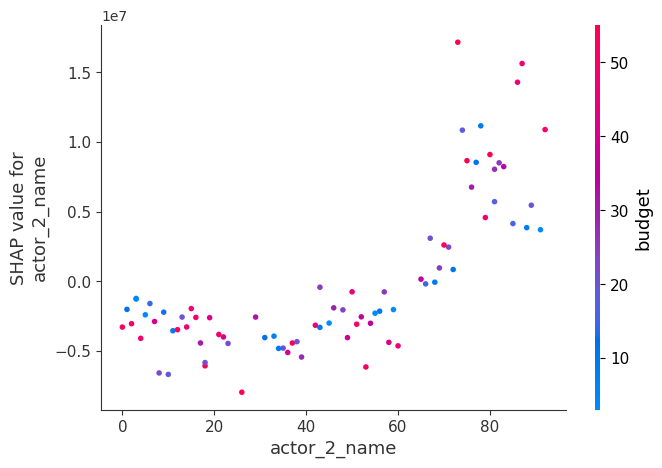

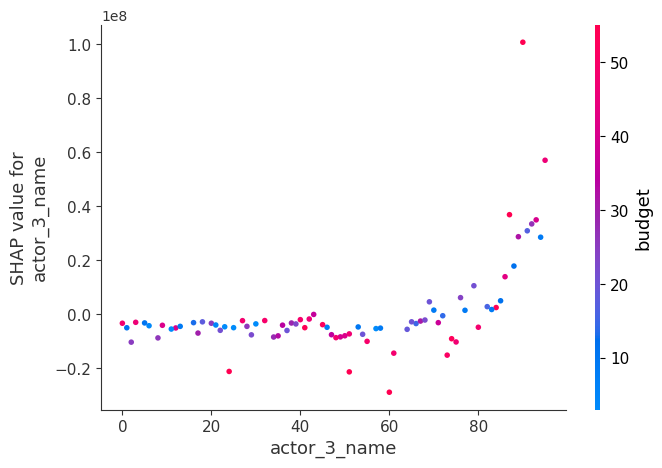

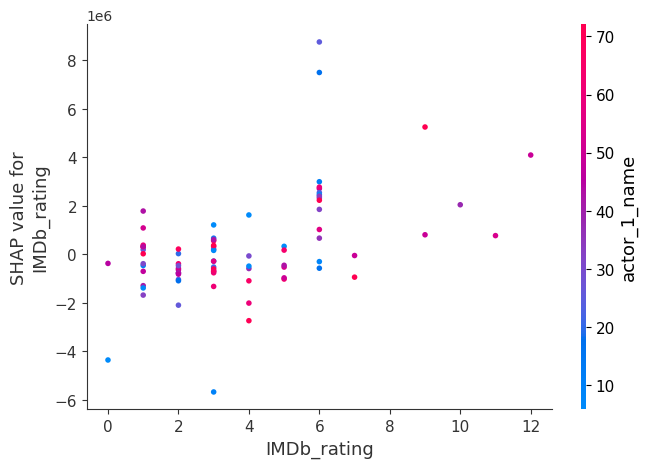

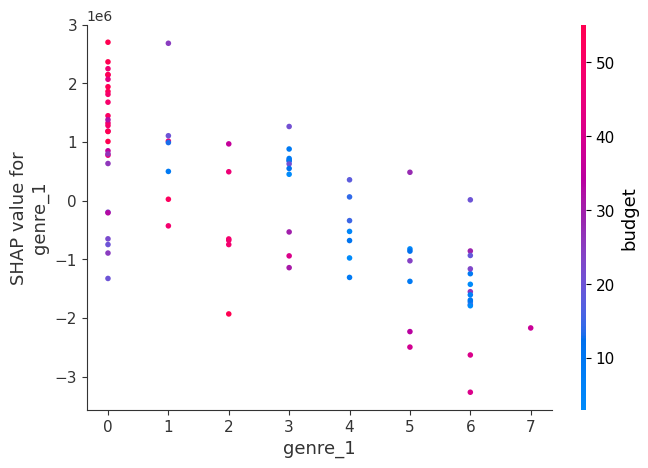

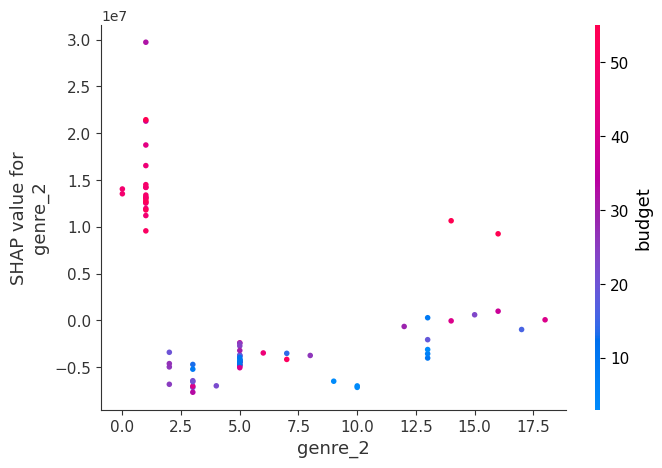

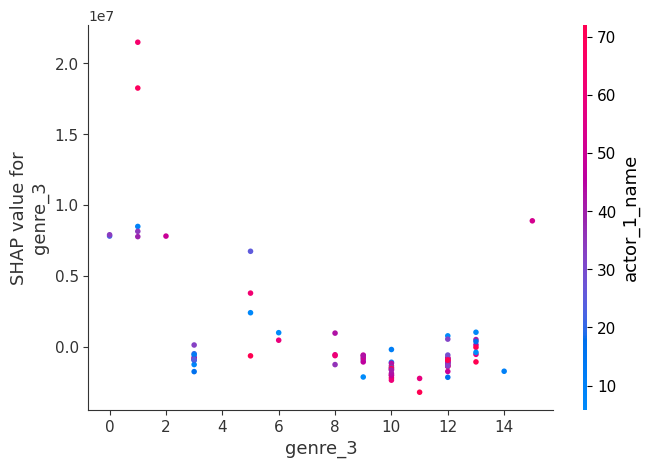

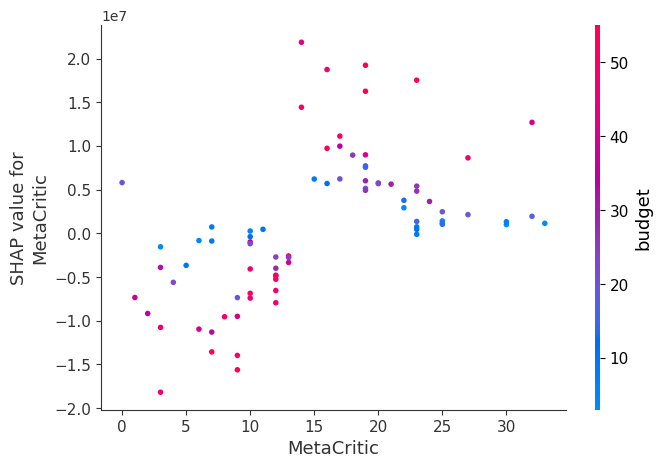

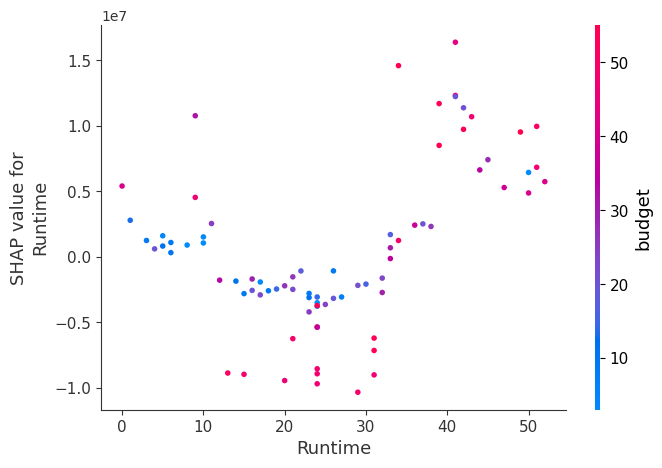

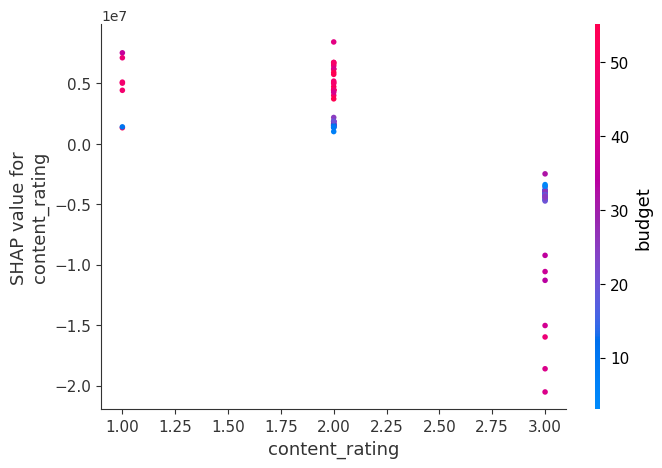

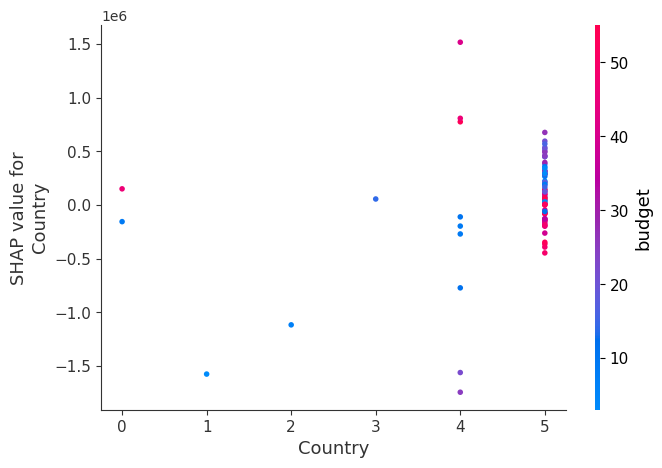

In [32]:
# SHAP partial dependence plot for a tree-based model
for feature_name in X_train.columns:
    shap.dependence_plot(feature_name, tree_shap_values, X_train)


# References
H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

ChatGPT - https://chat.openai.com/chat


All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

MIT License

Copyright (c) 2024 ADUSUMILLIJ

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.